In [2]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from category_encoders import CountEncoder


data = pd.read_csv('AB_NYC_2019.csv')

data.head()
drop = ['id', 'name', 'host_id', 'host_name', 'last_review']
data = data.drop(drop,axis=1)

data.head()

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

#number_of_reviews reviews_per_month 0.549868

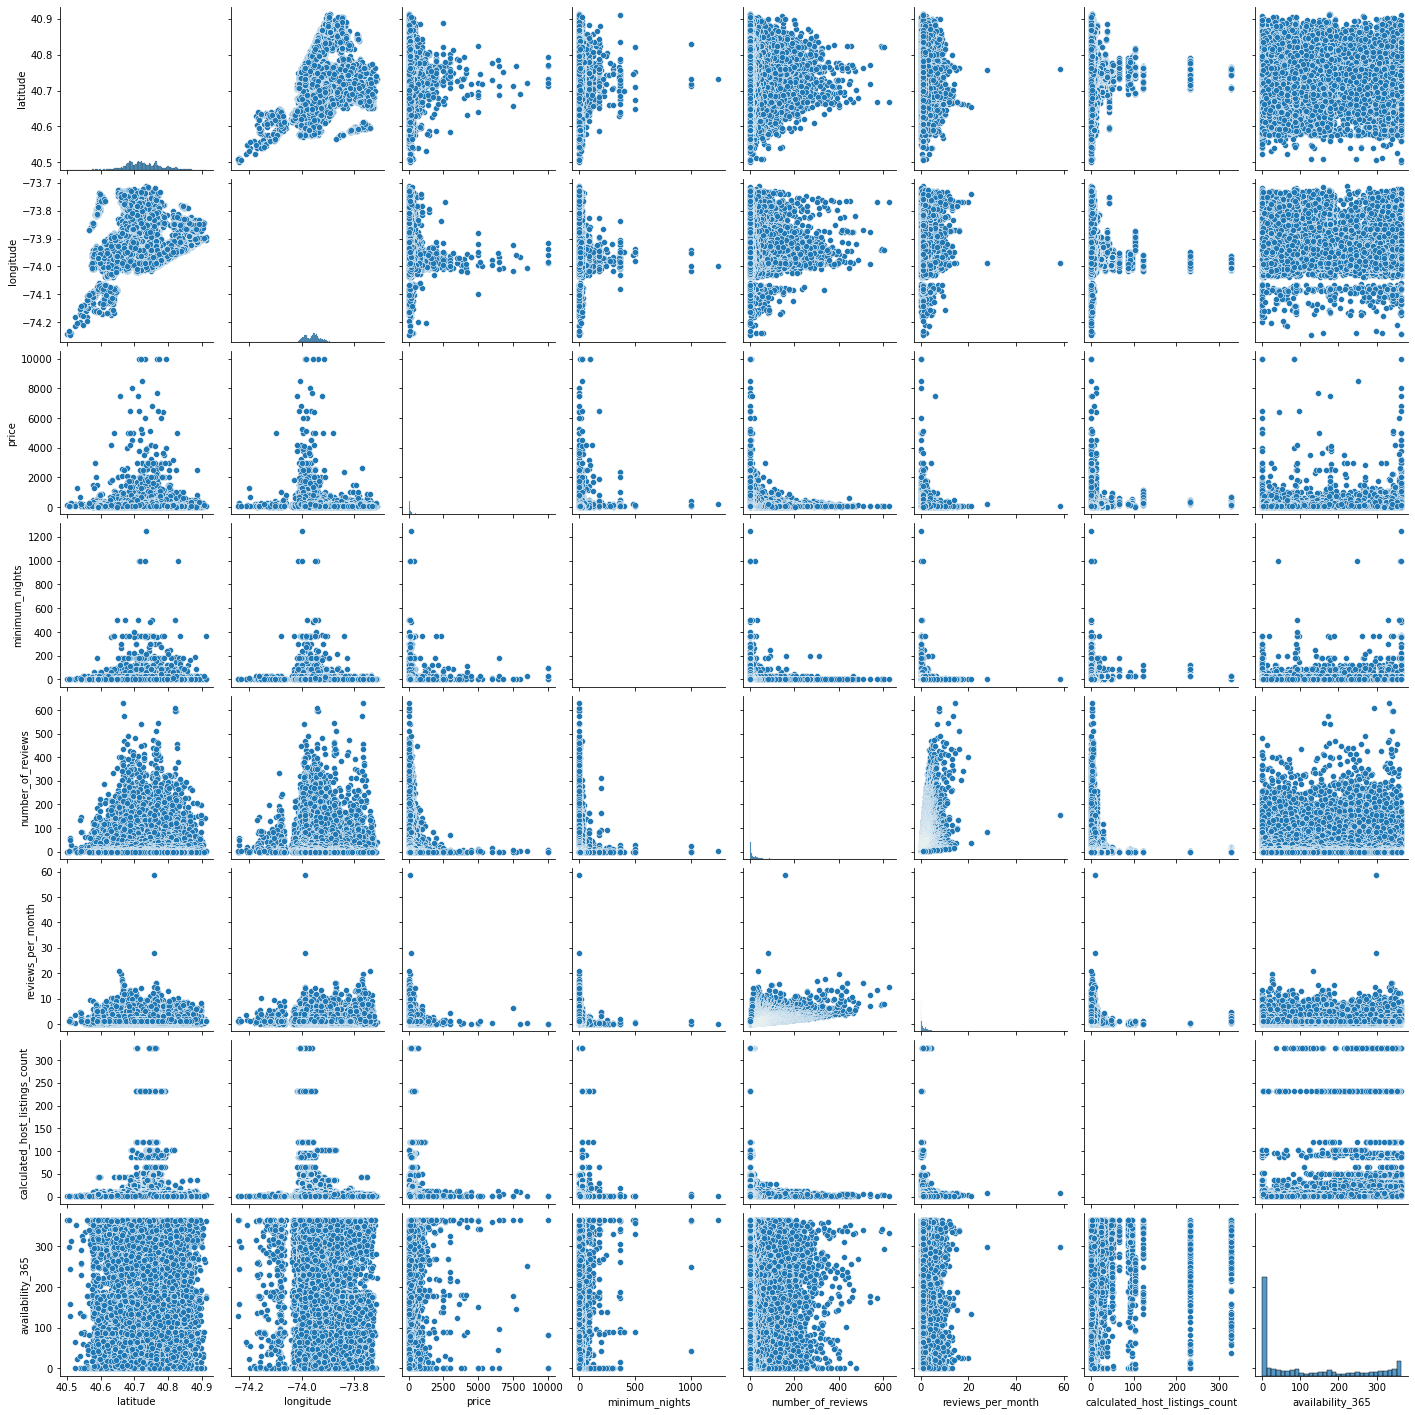

In [3]:
sns.pairplot(data)


In [4]:
data.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [5]:
from category_encoders import OrdinalEncoder, OneHotEncoder
enc = OneHotEncoder()

data_enc = data.drop(['neighbourhood_group','room_type'], axis = 1).join(enc.fit_transform(data[['neighbourhood_group','room_type']], axis = 0))
data_enc.head()

neighbourhood  latitude  longitude  price  minimum_nights  \
0    Kensington  40.64749  -73.97237    149               1   
1       Midtown  40.75362  -73.98377    225               1   
2        Harlem  40.80902  -73.94190    150               3   
3  Clinton Hill  40.68514  -73.95976     89               1   
4   East Harlem  40.79851  -73.94399     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  neighbourhood_group_1  neighbourhood_group_2  \
0               365                      1                      0   
1               355                      0                      1   
2               365                      0                      1   
3               194                      1                      0   
4                 0                      0                      1   

   neighbourhood_group_3  neighbourhood_group_4  neighbourhood_group_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   room_type_1  room_type_2  room_type_3  
0            1            0            0  
1            0            1            0  
2            1            0            0  
3            0            1            0  
4            0            1            0

In [ ]:
### Преобразование данных: 
# столбцы 'neighbourhood_group','room_type' заменил на числовые признаки с помощью OneHotEncoder
# столбец neighbourhood изменил на числовой признак с помощью CountEncoder

In [6]:
enc = CountEncoder()

cols = ['neighbourhood']

data_enc[cols]= enc.fit_transform(data_enc[cols])

data_enc.head()

neighbourhood  latitude  longitude  price  minimum_nights  \
0            175  40.64749  -73.97237    149               1   
1           1545  40.75362  -73.98377    225               1   
2           2658  40.80902  -73.94190    150               3   
3            572  40.68514  -73.95976     89               1   
4           1117  40.79851  -73.94399     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  neighbourhood_group_1  neighbourhood_group_2  \
0               365                      1                      0   
1               355                      0                      1   
2               365                      0                      1   
3               194                      1                      0   
4                 0                      0                      1   

   neighbourhood_group_3  neighbourhood_group_4  neighbourhood_group_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   room_type_1  room_type_2  room_type_3  
0            1            0            0  
1            0            1            0  
2            1            0            0  
3            0            1            0  
4            0            1            0

In [7]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   48895 non-null  int64  
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
 9   neighbourhood_group_1           48895 non-null  int64  
 10  neighbourhood_group_2           48895 non-null  int64  
 11  neighbourhood_group_3           48895 non-null  int64  
 12  neighbourhood_group_4           

In [8]:
data_enc.loc[:, 'reviews_per_month'] = data_enc.reviews_per_month.fillna(0)
data_enc.head()

neighbourhood  latitude  longitude  price  minimum_nights  \
0            175  40.64749  -73.97237    149               1   
1           1545  40.75362  -73.98377    225               1   
2           2658  40.80902  -73.94190    150               3   
3            572  40.68514  -73.95976     89               1   
4           1117  40.79851  -73.94399     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  neighbourhood_group_1  neighbourhood_group_2  \
0               365                      1                      0   
1               355                      0                      1   
2               365                      0                      1   
3               194                      1                      0   
4                 0                      0                      1   

   neighbourhood_group_3  neighbourhood_group_4  neighbourhood_group_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   room_type_1  room_type_2  room_type_3  
0            1            0            0  
1            0            1            0  
2            1            0            0  
3            0            1            0  
4            0            1            0

In [9]:
##Датасет метрополитена нью йорка
data_subway = pd.read_csv('nyc_subway_data.csv')[['Station Name','Station Latitude','Station Longitude']].drop_duplicates()
data_subway.head()
#data_subway.to_csv('data_subway.csv', index=False)
#data_subway.info()
#data_subway.describe()

Station Name  Station Latitude  Station Longitude
0   Far Rockaway-Mott Av         40.603995         -73.755405
1          Beach 25th St         40.600066         -73.761353
4          Beach 36th St         40.595398         -73.768175
8          Beach 44th St         40.592943         -73.776013
12      Jamaica-179th St         40.712646         -73.783817

In [ ]:
### Найду расстояние до ближайшей станции метро. Вероятно, чем ближе к метро, тем дороже аренда

In [10]:
def get_min_subway_distance(df,lat,long):
    rows = df.iloc
    dist_array = []
    for i in rows:
        dist =np.sqrt((i['Station Latitude'] - lat)**2 + (i['Station Longitude'] - long) **2)
        dist_array.append(dist)
        
    min_distance = np.min(dist_array)
    return min_distance
        
    

In [12]:
import numpy as np

In [18]:
data_enc["subway_distance"] = -1
for i in range(len(data_enc)):
    data_enc.loc[i, 'subway_distance'] =  get_min_subway_distance(df = data_subway,lat = data_enc.loc[i,'latitude'],long =data_enc.loc[i,'longitude'])
    print ('ready: ', i+1 ,'/', len(data_enc))
    

ready:  1 / 48895
ready:  2 / 48895
ready:  3 / 48895
ready:  4 / 48895
ready:  5 / 48895
ready:  6 / 48895
ready:  7 / 48895
ready:  8 / 48895
ready:  9 / 48895
ready:  10 / 48895
ready:  11 / 48895
ready:  12 / 48895
ready:  13 / 48895
ready:  14 / 48895
ready:  15 / 48895
ready:  16 / 48895
ready:  17 / 48895
ready:  18 / 48895
ready:  19 / 48895
ready:  20 / 48895
ready:  21 / 48895
ready:  22 / 48895
ready:  23 / 48895
ready:  24 / 48895
ready:  25 / 48895
ready:  26 / 48895
ready:  27 / 48895
ready:  28 / 48895
ready:  29 / 48895
ready:  30 / 48895
ready:  31 / 48895
ready:  32 / 48895
ready:  33 / 48895
ready:  34 / 48895
ready:  35 / 48895
ready:  36 / 48895
ready:  37 / 48895
ready:  38 / 48895
ready:  39 / 48895
ready:  40 / 48895
ready:  41 / 48895
ready:  42 / 48895
ready:  43 / 48895
ready:  44 / 48895
ready:  45 / 48895
ready:  46 / 48895
ready:  47 / 48895
ready:  48 / 48895
ready:  49 / 48895
ready:  50 / 48895
ready:  51 / 48895
ready:  52 / 48895
ready:  53 / 48895
re

ready:  418 / 48895
ready:  419 / 48895
ready:  420 / 48895
ready:  421 / 48895
ready:  422 / 48895
ready:  423 / 48895
ready:  424 / 48895
ready:  425 / 48895
ready:  426 / 48895
ready:  427 / 48895
ready:  428 / 48895
ready:  429 / 48895
ready:  430 / 48895
ready:  431 / 48895
ready:  432 / 48895
ready:  433 / 48895
ready:  434 / 48895
ready:  435 / 48895
ready:  436 / 48895
ready:  437 / 48895
ready:  438 / 48895
ready:  439 / 48895
ready:  440 / 48895
ready:  441 / 48895
ready:  442 / 48895
ready:  443 / 48895
ready:  444 / 48895
ready:  445 / 48895
ready:  446 / 48895
ready:  447 / 48895
ready:  448 / 48895
ready:  449 / 48895
ready:  450 / 48895
ready:  451 / 48895
ready:  452 / 48895
ready:  453 / 48895
ready:  454 / 48895
ready:  455 / 48895
ready:  456 / 48895
ready:  457 / 48895
ready:  458 / 48895
ready:  459 / 48895
ready:  460 / 48895
ready:  461 / 48895
ready:  462 / 48895
ready:  463 / 48895
ready:  464 / 48895
ready:  465 / 48895
ready:  466 / 48895
ready:  467 / 48895


ready:  829 / 48895
ready:  830 / 48895
ready:  831 / 48895
ready:  832 / 48895
ready:  833 / 48895
ready:  834 / 48895
ready:  835 / 48895
ready:  836 / 48895
ready:  837 / 48895
ready:  838 / 48895
ready:  839 / 48895
ready:  840 / 48895
ready:  841 / 48895
ready:  842 / 48895
ready:  843 / 48895
ready:  844 / 48895
ready:  845 / 48895
ready:  846 / 48895
ready:  847 / 48895
ready:  848 / 48895
ready:  849 / 48895
ready:  850 / 48895
ready:  851 / 48895
ready:  852 / 48895
ready:  853 / 48895
ready:  854 / 48895
ready:  855 / 48895
ready:  856 / 48895
ready:  857 / 48895
ready:  858 / 48895
ready:  859 / 48895
ready:  860 / 48895
ready:  861 / 48895
ready:  862 / 48895
ready:  863 / 48895
ready:  864 / 48895
ready:  865 / 48895
ready:  866 / 48895
ready:  867 / 48895
ready:  868 / 48895
ready:  869 / 48895
ready:  870 / 48895
ready:  871 / 48895
ready:  872 / 48895
ready:  873 / 48895
ready:  874 / 48895
ready:  875 / 48895
ready:  876 / 48895
ready:  877 / 48895
ready:  878 / 48895


ready:  1231 / 48895
ready:  1232 / 48895
ready:  1233 / 48895
ready:  1234 / 48895
ready:  1235 / 48895
ready:  1236 / 48895
ready:  1237 / 48895
ready:  1238 / 48895
ready:  1239 / 48895
ready:  1240 / 48895
ready:  1241 / 48895
ready:  1242 / 48895
ready:  1243 / 48895
ready:  1244 / 48895
ready:  1245 / 48895
ready:  1246 / 48895
ready:  1247 / 48895
ready:  1248 / 48895
ready:  1249 / 48895
ready:  1250 / 48895
ready:  1251 / 48895
ready:  1252 / 48895
ready:  1253 / 48895
ready:  1254 / 48895
ready:  1255 / 48895
ready:  1256 / 48895
ready:  1257 / 48895
ready:  1258 / 48895
ready:  1259 / 48895
ready:  1260 / 48895
ready:  1261 / 48895
ready:  1262 / 48895
ready:  1263 / 48895
ready:  1264 / 48895
ready:  1265 / 48895
ready:  1266 / 48895
ready:  1267 / 48895
ready:  1268 / 48895
ready:  1269 / 48895
ready:  1270 / 48895
ready:  1271 / 48895
ready:  1272 / 48895
ready:  1273 / 48895
ready:  1274 / 48895
ready:  1275 / 48895
ready:  1276 / 48895
ready:  1277 / 48895
ready:  1278 

ready:  1624 / 48895
ready:  1625 / 48895
ready:  1626 / 48895
ready:  1627 / 48895
ready:  1628 / 48895
ready:  1629 / 48895
ready:  1630 / 48895
ready:  1631 / 48895
ready:  1632 / 48895
ready:  1633 / 48895
ready:  1634 / 48895
ready:  1635 / 48895
ready:  1636 / 48895
ready:  1637 / 48895
ready:  1638 / 48895
ready:  1639 / 48895
ready:  1640 / 48895
ready:  1641 / 48895
ready:  1642 / 48895
ready:  1643 / 48895
ready:  1644 / 48895
ready:  1645 / 48895
ready:  1646 / 48895
ready:  1647 / 48895
ready:  1648 / 48895
ready:  1649 / 48895
ready:  1650 / 48895
ready:  1651 / 48895
ready:  1652 / 48895
ready:  1653 / 48895
ready:  1654 / 48895
ready:  1655 / 48895
ready:  1656 / 48895
ready:  1657 / 48895
ready:  1658 / 48895
ready:  1659 / 48895
ready:  1660 / 48895
ready:  1661 / 48895
ready:  1662 / 48895
ready:  1663 / 48895
ready:  1664 / 48895
ready:  1665 / 48895
ready:  1666 / 48895
ready:  1667 / 48895
ready:  1668 / 48895
ready:  1669 / 48895
ready:  1670 / 48895
ready:  1671 

ready:  2016 / 48895
ready:  2017 / 48895
ready:  2018 / 48895
ready:  2019 / 48895
ready:  2020 / 48895
ready:  2021 / 48895
ready:  2022 / 48895
ready:  2023 / 48895
ready:  2024 / 48895
ready:  2025 / 48895
ready:  2026 / 48895
ready:  2027 / 48895
ready:  2028 / 48895
ready:  2029 / 48895
ready:  2030 / 48895
ready:  2031 / 48895
ready:  2032 / 48895
ready:  2033 / 48895
ready:  2034 / 48895
ready:  2035 / 48895
ready:  2036 / 48895
ready:  2037 / 48895
ready:  2038 / 48895
ready:  2039 / 48895
ready:  2040 / 48895
ready:  2041 / 48895
ready:  2042 / 48895
ready:  2043 / 48895
ready:  2044 / 48895
ready:  2045 / 48895
ready:  2046 / 48895
ready:  2047 / 48895
ready:  2048 / 48895
ready:  2049 / 48895
ready:  2050 / 48895
ready:  2051 / 48895
ready:  2052 / 48895
ready:  2053 / 48895
ready:  2054 / 48895
ready:  2055 / 48895
ready:  2056 / 48895
ready:  2057 / 48895
ready:  2058 / 48895
ready:  2059 / 48895
ready:  2060 / 48895
ready:  2061 / 48895
ready:  2062 / 48895
ready:  2063 

ready:  2407 / 48895
ready:  2408 / 48895
ready:  2409 / 48895
ready:  2410 / 48895
ready:  2411 / 48895
ready:  2412 / 48895
ready:  2413 / 48895
ready:  2414 / 48895
ready:  2415 / 48895
ready:  2416 / 48895
ready:  2417 / 48895
ready:  2418 / 48895
ready:  2419 / 48895
ready:  2420 / 48895
ready:  2421 / 48895
ready:  2422 / 48895
ready:  2423 / 48895
ready:  2424 / 48895
ready:  2425 / 48895
ready:  2426 / 48895
ready:  2427 / 48895
ready:  2428 / 48895
ready:  2429 / 48895
ready:  2430 / 48895
ready:  2431 / 48895
ready:  2432 / 48895
ready:  2433 / 48895
ready:  2434 / 48895
ready:  2435 / 48895
ready:  2436 / 48895
ready:  2437 / 48895
ready:  2438 / 48895
ready:  2439 / 48895
ready:  2440 / 48895
ready:  2441 / 48895
ready:  2442 / 48895
ready:  2443 / 48895
ready:  2444 / 48895
ready:  2445 / 48895
ready:  2446 / 48895
ready:  2447 / 48895
ready:  2448 / 48895
ready:  2449 / 48895
ready:  2450 / 48895
ready:  2451 / 48895
ready:  2452 / 48895
ready:  2453 / 48895
ready:  2454 

ready:  2802 / 48895
ready:  2803 / 48895
ready:  2804 / 48895
ready:  2805 / 48895
ready:  2806 / 48895
ready:  2807 / 48895
ready:  2808 / 48895
ready:  2809 / 48895
ready:  2810 / 48895
ready:  2811 / 48895
ready:  2812 / 48895
ready:  2813 / 48895
ready:  2814 / 48895
ready:  2815 / 48895
ready:  2816 / 48895
ready:  2817 / 48895
ready:  2818 / 48895
ready:  2819 / 48895
ready:  2820 / 48895
ready:  2821 / 48895
ready:  2822 / 48895
ready:  2823 / 48895
ready:  2824 / 48895
ready:  2825 / 48895
ready:  2826 / 48895
ready:  2827 / 48895
ready:  2828 / 48895
ready:  2829 / 48895
ready:  2830 / 48895
ready:  2831 / 48895
ready:  2832 / 48895
ready:  2833 / 48895
ready:  2834 / 48895
ready:  2835 / 48895
ready:  2836 / 48895
ready:  2837 / 48895
ready:  2838 / 48895
ready:  2839 / 48895
ready:  2840 / 48895
ready:  2841 / 48895
ready:  2842 / 48895
ready:  2843 / 48895
ready:  2844 / 48895
ready:  2845 / 48895
ready:  2846 / 48895
ready:  2847 / 48895
ready:  2848 / 48895
ready:  2849 

ready:  3195 / 48895
ready:  3196 / 48895
ready:  3197 / 48895
ready:  3198 / 48895
ready:  3199 / 48895
ready:  3200 / 48895
ready:  3201 / 48895
ready:  3202 / 48895
ready:  3203 / 48895
ready:  3204 / 48895
ready:  3205 / 48895
ready:  3206 / 48895
ready:  3207 / 48895
ready:  3208 / 48895
ready:  3209 / 48895
ready:  3210 / 48895
ready:  3211 / 48895
ready:  3212 / 48895
ready:  3213 / 48895
ready:  3214 / 48895
ready:  3215 / 48895
ready:  3216 / 48895
ready:  3217 / 48895
ready:  3218 / 48895
ready:  3219 / 48895
ready:  3220 / 48895
ready:  3221 / 48895
ready:  3222 / 48895
ready:  3223 / 48895
ready:  3224 / 48895
ready:  3225 / 48895
ready:  3226 / 48895
ready:  3227 / 48895
ready:  3228 / 48895
ready:  3229 / 48895
ready:  3230 / 48895
ready:  3231 / 48895
ready:  3232 / 48895
ready:  3233 / 48895
ready:  3234 / 48895
ready:  3235 / 48895
ready:  3236 / 48895
ready:  3237 / 48895
ready:  3238 / 48895
ready:  3239 / 48895
ready:  3240 / 48895
ready:  3241 / 48895
ready:  3242 

ready:  3587 / 48895
ready:  3588 / 48895
ready:  3589 / 48895
ready:  3590 / 48895
ready:  3591 / 48895
ready:  3592 / 48895
ready:  3593 / 48895
ready:  3594 / 48895
ready:  3595 / 48895
ready:  3596 / 48895
ready:  3597 / 48895
ready:  3598 / 48895
ready:  3599 / 48895
ready:  3600 / 48895
ready:  3601 / 48895
ready:  3602 / 48895
ready:  3603 / 48895
ready:  3604 / 48895
ready:  3605 / 48895
ready:  3606 / 48895
ready:  3607 / 48895
ready:  3608 / 48895
ready:  3609 / 48895
ready:  3610 / 48895
ready:  3611 / 48895
ready:  3612 / 48895
ready:  3613 / 48895
ready:  3614 / 48895
ready:  3615 / 48895
ready:  3616 / 48895
ready:  3617 / 48895
ready:  3618 / 48895
ready:  3619 / 48895
ready:  3620 / 48895
ready:  3621 / 48895
ready:  3622 / 48895
ready:  3623 / 48895
ready:  3624 / 48895
ready:  3625 / 48895
ready:  3626 / 48895
ready:  3627 / 48895
ready:  3628 / 48895
ready:  3629 / 48895
ready:  3630 / 48895
ready:  3631 / 48895
ready:  3632 / 48895
ready:  3633 / 48895
ready:  3634 

ready:  3981 / 48895
ready:  3982 / 48895
ready:  3983 / 48895
ready:  3984 / 48895
ready:  3985 / 48895
ready:  3986 / 48895
ready:  3987 / 48895
ready:  3988 / 48895
ready:  3989 / 48895
ready:  3990 / 48895
ready:  3991 / 48895
ready:  3992 / 48895
ready:  3993 / 48895
ready:  3994 / 48895
ready:  3995 / 48895
ready:  3996 / 48895
ready:  3997 / 48895
ready:  3998 / 48895
ready:  3999 / 48895
ready:  4000 / 48895
ready:  4001 / 48895
ready:  4002 / 48895
ready:  4003 / 48895
ready:  4004 / 48895
ready:  4005 / 48895
ready:  4006 / 48895
ready:  4007 / 48895
ready:  4008 / 48895
ready:  4009 / 48895
ready:  4010 / 48895
ready:  4011 / 48895
ready:  4012 / 48895
ready:  4013 / 48895
ready:  4014 / 48895
ready:  4015 / 48895
ready:  4016 / 48895
ready:  4017 / 48895
ready:  4018 / 48895
ready:  4019 / 48895
ready:  4020 / 48895
ready:  4021 / 48895
ready:  4022 / 48895
ready:  4023 / 48895
ready:  4024 / 48895
ready:  4025 / 48895
ready:  4026 / 48895
ready:  4027 / 48895
ready:  4028 

ready:  4375 / 48895
ready:  4376 / 48895
ready:  4377 / 48895
ready:  4378 / 48895
ready:  4379 / 48895
ready:  4380 / 48895
ready:  4381 / 48895
ready:  4382 / 48895
ready:  4383 / 48895
ready:  4384 / 48895
ready:  4385 / 48895
ready:  4386 / 48895
ready:  4387 / 48895
ready:  4388 / 48895
ready:  4389 / 48895
ready:  4390 / 48895
ready:  4391 / 48895
ready:  4392 / 48895
ready:  4393 / 48895
ready:  4394 / 48895
ready:  4395 / 48895
ready:  4396 / 48895
ready:  4397 / 48895
ready:  4398 / 48895
ready:  4399 / 48895
ready:  4400 / 48895
ready:  4401 / 48895
ready:  4402 / 48895
ready:  4403 / 48895
ready:  4404 / 48895
ready:  4405 / 48895
ready:  4406 / 48895
ready:  4407 / 48895
ready:  4408 / 48895
ready:  4409 / 48895
ready:  4410 / 48895
ready:  4411 / 48895
ready:  4412 / 48895
ready:  4413 / 48895
ready:  4414 / 48895
ready:  4415 / 48895
ready:  4416 / 48895
ready:  4417 / 48895
ready:  4418 / 48895
ready:  4419 / 48895
ready:  4420 / 48895
ready:  4421 / 48895
ready:  4422 

ready:  4766 / 48895
ready:  4767 / 48895
ready:  4768 / 48895
ready:  4769 / 48895
ready:  4770 / 48895
ready:  4771 / 48895
ready:  4772 / 48895
ready:  4773 / 48895
ready:  4774 / 48895
ready:  4775 / 48895
ready:  4776 / 48895
ready:  4777 / 48895
ready:  4778 / 48895
ready:  4779 / 48895
ready:  4780 / 48895
ready:  4781 / 48895
ready:  4782 / 48895
ready:  4783 / 48895
ready:  4784 / 48895
ready:  4785 / 48895
ready:  4786 / 48895
ready:  4787 / 48895
ready:  4788 / 48895
ready:  4789 / 48895
ready:  4790 / 48895
ready:  4791 / 48895
ready:  4792 / 48895
ready:  4793 / 48895
ready:  4794 / 48895
ready:  4795 / 48895
ready:  4796 / 48895
ready:  4797 / 48895
ready:  4798 / 48895
ready:  4799 / 48895
ready:  4800 / 48895
ready:  4801 / 48895
ready:  4802 / 48895
ready:  4803 / 48895
ready:  4804 / 48895
ready:  4805 / 48895
ready:  4806 / 48895
ready:  4807 / 48895
ready:  4808 / 48895
ready:  4809 / 48895
ready:  4810 / 48895
ready:  4811 / 48895
ready:  4812 / 48895
ready:  4813 

ready:  5159 / 48895
ready:  5160 / 48895
ready:  5161 / 48895
ready:  5162 / 48895
ready:  5163 / 48895
ready:  5164 / 48895
ready:  5165 / 48895
ready:  5166 / 48895
ready:  5167 / 48895
ready:  5168 / 48895
ready:  5169 / 48895
ready:  5170 / 48895
ready:  5171 / 48895
ready:  5172 / 48895
ready:  5173 / 48895
ready:  5174 / 48895
ready:  5175 / 48895
ready:  5176 / 48895
ready:  5177 / 48895
ready:  5178 / 48895
ready:  5179 / 48895
ready:  5180 / 48895
ready:  5181 / 48895
ready:  5182 / 48895
ready:  5183 / 48895
ready:  5184 / 48895
ready:  5185 / 48895
ready:  5186 / 48895
ready:  5187 / 48895
ready:  5188 / 48895
ready:  5189 / 48895
ready:  5190 / 48895
ready:  5191 / 48895
ready:  5192 / 48895
ready:  5193 / 48895
ready:  5194 / 48895
ready:  5195 / 48895
ready:  5196 / 48895
ready:  5197 / 48895
ready:  5198 / 48895
ready:  5199 / 48895
ready:  5200 / 48895
ready:  5201 / 48895
ready:  5202 / 48895
ready:  5203 / 48895
ready:  5204 / 48895
ready:  5205 / 48895
ready:  5206 

ready:  5554 / 48895
ready:  5555 / 48895
ready:  5556 / 48895
ready:  5557 / 48895
ready:  5558 / 48895
ready:  5559 / 48895
ready:  5560 / 48895
ready:  5561 / 48895
ready:  5562 / 48895
ready:  5563 / 48895
ready:  5564 / 48895
ready:  5565 / 48895
ready:  5566 / 48895
ready:  5567 / 48895
ready:  5568 / 48895
ready:  5569 / 48895
ready:  5570 / 48895
ready:  5571 / 48895
ready:  5572 / 48895
ready:  5573 / 48895
ready:  5574 / 48895
ready:  5575 / 48895
ready:  5576 / 48895
ready:  5577 / 48895
ready:  5578 / 48895
ready:  5579 / 48895
ready:  5580 / 48895
ready:  5581 / 48895
ready:  5582 / 48895
ready:  5583 / 48895
ready:  5584 / 48895
ready:  5585 / 48895
ready:  5586 / 48895
ready:  5587 / 48895
ready:  5588 / 48895
ready:  5589 / 48895
ready:  5590 / 48895
ready:  5591 / 48895
ready:  5592 / 48895
ready:  5593 / 48895
ready:  5594 / 48895
ready:  5595 / 48895
ready:  5596 / 48895
ready:  5597 / 48895
ready:  5598 / 48895
ready:  5599 / 48895
ready:  5600 / 48895
ready:  5601 

ready:  5949 / 48895
ready:  5950 / 48895
ready:  5951 / 48895
ready:  5952 / 48895
ready:  5953 / 48895
ready:  5954 / 48895
ready:  5955 / 48895
ready:  5956 / 48895
ready:  5957 / 48895
ready:  5958 / 48895
ready:  5959 / 48895
ready:  5960 / 48895
ready:  5961 / 48895
ready:  5962 / 48895
ready:  5963 / 48895
ready:  5964 / 48895
ready:  5965 / 48895
ready:  5966 / 48895
ready:  5967 / 48895
ready:  5968 / 48895
ready:  5969 / 48895
ready:  5970 / 48895
ready:  5971 / 48895
ready:  5972 / 48895
ready:  5973 / 48895
ready:  5974 / 48895
ready:  5975 / 48895
ready:  5976 / 48895
ready:  5977 / 48895
ready:  5978 / 48895
ready:  5979 / 48895
ready:  5980 / 48895
ready:  5981 / 48895
ready:  5982 / 48895
ready:  5983 / 48895
ready:  5984 / 48895
ready:  5985 / 48895
ready:  5986 / 48895
ready:  5987 / 48895
ready:  5988 / 48895
ready:  5989 / 48895
ready:  5990 / 48895
ready:  5991 / 48895
ready:  5992 / 48895
ready:  5993 / 48895
ready:  5994 / 48895
ready:  5995 / 48895
ready:  5996 

ready:  6342 / 48895
ready:  6343 / 48895
ready:  6344 / 48895
ready:  6345 / 48895
ready:  6346 / 48895
ready:  6347 / 48895
ready:  6348 / 48895
ready:  6349 / 48895
ready:  6350 / 48895
ready:  6351 / 48895
ready:  6352 / 48895
ready:  6353 / 48895
ready:  6354 / 48895
ready:  6355 / 48895
ready:  6356 / 48895
ready:  6357 / 48895
ready:  6358 / 48895
ready:  6359 / 48895
ready:  6360 / 48895
ready:  6361 / 48895
ready:  6362 / 48895
ready:  6363 / 48895
ready:  6364 / 48895
ready:  6365 / 48895
ready:  6366 / 48895
ready:  6367 / 48895
ready:  6368 / 48895
ready:  6369 / 48895
ready:  6370 / 48895
ready:  6371 / 48895
ready:  6372 / 48895
ready:  6373 / 48895
ready:  6374 / 48895
ready:  6375 / 48895
ready:  6376 / 48895
ready:  6377 / 48895
ready:  6378 / 48895
ready:  6379 / 48895
ready:  6380 / 48895
ready:  6381 / 48895
ready:  6382 / 48895
ready:  6383 / 48895
ready:  6384 / 48895
ready:  6385 / 48895
ready:  6386 / 48895
ready:  6387 / 48895
ready:  6388 / 48895
ready:  6389 

ready:  6733 / 48895
ready:  6734 / 48895
ready:  6735 / 48895
ready:  6736 / 48895
ready:  6737 / 48895
ready:  6738 / 48895
ready:  6739 / 48895
ready:  6740 / 48895
ready:  6741 / 48895
ready:  6742 / 48895
ready:  6743 / 48895
ready:  6744 / 48895
ready:  6745 / 48895
ready:  6746 / 48895
ready:  6747 / 48895
ready:  6748 / 48895
ready:  6749 / 48895
ready:  6750 / 48895
ready:  6751 / 48895
ready:  6752 / 48895
ready:  6753 / 48895
ready:  6754 / 48895
ready:  6755 / 48895
ready:  6756 / 48895
ready:  6757 / 48895
ready:  6758 / 48895
ready:  6759 / 48895
ready:  6760 / 48895
ready:  6761 / 48895
ready:  6762 / 48895
ready:  6763 / 48895
ready:  6764 / 48895
ready:  6765 / 48895
ready:  6766 / 48895
ready:  6767 / 48895
ready:  6768 / 48895
ready:  6769 / 48895
ready:  6770 / 48895
ready:  6771 / 48895
ready:  6772 / 48895
ready:  6773 / 48895
ready:  6774 / 48895
ready:  6775 / 48895
ready:  6776 / 48895
ready:  6777 / 48895
ready:  6778 / 48895
ready:  6779 / 48895
ready:  6780 

ready:  7127 / 48895
ready:  7128 / 48895
ready:  7129 / 48895
ready:  7130 / 48895
ready:  7131 / 48895
ready:  7132 / 48895
ready:  7133 / 48895
ready:  7134 / 48895
ready:  7135 / 48895
ready:  7136 / 48895
ready:  7137 / 48895
ready:  7138 / 48895
ready:  7139 / 48895
ready:  7140 / 48895
ready:  7141 / 48895
ready:  7142 / 48895
ready:  7143 / 48895
ready:  7144 / 48895
ready:  7145 / 48895
ready:  7146 / 48895
ready:  7147 / 48895
ready:  7148 / 48895
ready:  7149 / 48895
ready:  7150 / 48895
ready:  7151 / 48895
ready:  7152 / 48895
ready:  7153 / 48895
ready:  7154 / 48895
ready:  7155 / 48895
ready:  7156 / 48895
ready:  7157 / 48895
ready:  7158 / 48895
ready:  7159 / 48895
ready:  7160 / 48895
ready:  7161 / 48895
ready:  7162 / 48895
ready:  7163 / 48895
ready:  7164 / 48895
ready:  7165 / 48895
ready:  7166 / 48895
ready:  7167 / 48895
ready:  7168 / 48895
ready:  7169 / 48895
ready:  7170 / 48895
ready:  7171 / 48895
ready:  7172 / 48895
ready:  7173 / 48895
ready:  7174 

ready:  7519 / 48895
ready:  7520 / 48895
ready:  7521 / 48895
ready:  7522 / 48895
ready:  7523 / 48895
ready:  7524 / 48895
ready:  7525 / 48895
ready:  7526 / 48895
ready:  7527 / 48895
ready:  7528 / 48895
ready:  7529 / 48895
ready:  7530 / 48895
ready:  7531 / 48895
ready:  7532 / 48895
ready:  7533 / 48895
ready:  7534 / 48895
ready:  7535 / 48895
ready:  7536 / 48895
ready:  7537 / 48895
ready:  7538 / 48895
ready:  7539 / 48895
ready:  7540 / 48895
ready:  7541 / 48895
ready:  7542 / 48895
ready:  7543 / 48895
ready:  7544 / 48895
ready:  7545 / 48895
ready:  7546 / 48895
ready:  7547 / 48895
ready:  7548 / 48895
ready:  7549 / 48895
ready:  7550 / 48895
ready:  7551 / 48895
ready:  7552 / 48895
ready:  7553 / 48895
ready:  7554 / 48895
ready:  7555 / 48895
ready:  7556 / 48895
ready:  7557 / 48895
ready:  7558 / 48895
ready:  7559 / 48895
ready:  7560 / 48895
ready:  7561 / 48895
ready:  7562 / 48895
ready:  7563 / 48895
ready:  7564 / 48895
ready:  7565 / 48895
ready:  7566 

ready:  7914 / 48895
ready:  7915 / 48895
ready:  7916 / 48895
ready:  7917 / 48895
ready:  7918 / 48895
ready:  7919 / 48895
ready:  7920 / 48895
ready:  7921 / 48895
ready:  7922 / 48895
ready:  7923 / 48895
ready:  7924 / 48895
ready:  7925 / 48895
ready:  7926 / 48895
ready:  7927 / 48895
ready:  7928 / 48895
ready:  7929 / 48895
ready:  7930 / 48895
ready:  7931 / 48895
ready:  7932 / 48895
ready:  7933 / 48895
ready:  7934 / 48895
ready:  7935 / 48895
ready:  7936 / 48895
ready:  7937 / 48895
ready:  7938 / 48895
ready:  7939 / 48895
ready:  7940 / 48895
ready:  7941 / 48895
ready:  7942 / 48895
ready:  7943 / 48895
ready:  7944 / 48895
ready:  7945 / 48895
ready:  7946 / 48895
ready:  7947 / 48895
ready:  7948 / 48895
ready:  7949 / 48895
ready:  7950 / 48895
ready:  7951 / 48895
ready:  7952 / 48895
ready:  7953 / 48895
ready:  7954 / 48895
ready:  7955 / 48895
ready:  7956 / 48895
ready:  7957 / 48895
ready:  7958 / 48895
ready:  7959 / 48895
ready:  7960 / 48895
ready:  7961 

ready:  8307 / 48895
ready:  8308 / 48895
ready:  8309 / 48895
ready:  8310 / 48895
ready:  8311 / 48895
ready:  8312 / 48895
ready:  8313 / 48895
ready:  8314 / 48895
ready:  8315 / 48895
ready:  8316 / 48895
ready:  8317 / 48895
ready:  8318 / 48895
ready:  8319 / 48895
ready:  8320 / 48895
ready:  8321 / 48895
ready:  8322 / 48895
ready:  8323 / 48895
ready:  8324 / 48895
ready:  8325 / 48895
ready:  8326 / 48895
ready:  8327 / 48895
ready:  8328 / 48895
ready:  8329 / 48895
ready:  8330 / 48895
ready:  8331 / 48895
ready:  8332 / 48895
ready:  8333 / 48895
ready:  8334 / 48895
ready:  8335 / 48895
ready:  8336 / 48895
ready:  8337 / 48895
ready:  8338 / 48895
ready:  8339 / 48895
ready:  8340 / 48895
ready:  8341 / 48895
ready:  8342 / 48895
ready:  8343 / 48895
ready:  8344 / 48895
ready:  8345 / 48895
ready:  8346 / 48895
ready:  8347 / 48895
ready:  8348 / 48895
ready:  8349 / 48895
ready:  8350 / 48895
ready:  8351 / 48895
ready:  8352 / 48895
ready:  8353 / 48895
ready:  8354 

ready:  8700 / 48895
ready:  8701 / 48895
ready:  8702 / 48895
ready:  8703 / 48895
ready:  8704 / 48895
ready:  8705 / 48895
ready:  8706 / 48895
ready:  8707 / 48895
ready:  8708 / 48895
ready:  8709 / 48895
ready:  8710 / 48895
ready:  8711 / 48895
ready:  8712 / 48895
ready:  8713 / 48895
ready:  8714 / 48895
ready:  8715 / 48895
ready:  8716 / 48895
ready:  8717 / 48895
ready:  8718 / 48895
ready:  8719 / 48895
ready:  8720 / 48895
ready:  8721 / 48895
ready:  8722 / 48895
ready:  8723 / 48895
ready:  8724 / 48895
ready:  8725 / 48895
ready:  8726 / 48895
ready:  8727 / 48895
ready:  8728 / 48895
ready:  8729 / 48895
ready:  8730 / 48895
ready:  8731 / 48895
ready:  8732 / 48895
ready:  8733 / 48895
ready:  8734 / 48895
ready:  8735 / 48895
ready:  8736 / 48895
ready:  8737 / 48895
ready:  8738 / 48895
ready:  8739 / 48895
ready:  8740 / 48895
ready:  8741 / 48895
ready:  8742 / 48895
ready:  8743 / 48895
ready:  8744 / 48895
ready:  8745 / 48895
ready:  8746 / 48895
ready:  8747 

ready:  9091 / 48895
ready:  9092 / 48895
ready:  9093 / 48895
ready:  9094 / 48895
ready:  9095 / 48895
ready:  9096 / 48895
ready:  9097 / 48895
ready:  9098 / 48895
ready:  9099 / 48895
ready:  9100 / 48895
ready:  9101 / 48895
ready:  9102 / 48895
ready:  9103 / 48895
ready:  9104 / 48895
ready:  9105 / 48895
ready:  9106 / 48895
ready:  9107 / 48895
ready:  9108 / 48895
ready:  9109 / 48895
ready:  9110 / 48895
ready:  9111 / 48895
ready:  9112 / 48895
ready:  9113 / 48895
ready:  9114 / 48895
ready:  9115 / 48895
ready:  9116 / 48895
ready:  9117 / 48895
ready:  9118 / 48895
ready:  9119 / 48895
ready:  9120 / 48895
ready:  9121 / 48895
ready:  9122 / 48895
ready:  9123 / 48895
ready:  9124 / 48895
ready:  9125 / 48895
ready:  9126 / 48895
ready:  9127 / 48895
ready:  9128 / 48895
ready:  9129 / 48895
ready:  9130 / 48895
ready:  9131 / 48895
ready:  9132 / 48895
ready:  9133 / 48895
ready:  9134 / 48895
ready:  9135 / 48895
ready:  9136 / 48895
ready:  9137 / 48895
ready:  9138 

ready:  9484 / 48895
ready:  9485 / 48895
ready:  9486 / 48895
ready:  9487 / 48895
ready:  9488 / 48895
ready:  9489 / 48895
ready:  9490 / 48895
ready:  9491 / 48895
ready:  9492 / 48895
ready:  9493 / 48895
ready:  9494 / 48895
ready:  9495 / 48895
ready:  9496 / 48895
ready:  9497 / 48895
ready:  9498 / 48895
ready:  9499 / 48895
ready:  9500 / 48895
ready:  9501 / 48895
ready:  9502 / 48895
ready:  9503 / 48895
ready:  9504 / 48895
ready:  9505 / 48895
ready:  9506 / 48895
ready:  9507 / 48895
ready:  9508 / 48895
ready:  9509 / 48895
ready:  9510 / 48895
ready:  9511 / 48895
ready:  9512 / 48895
ready:  9513 / 48895
ready:  9514 / 48895
ready:  9515 / 48895
ready:  9516 / 48895
ready:  9517 / 48895
ready:  9518 / 48895
ready:  9519 / 48895
ready:  9520 / 48895
ready:  9521 / 48895
ready:  9522 / 48895
ready:  9523 / 48895
ready:  9524 / 48895
ready:  9525 / 48895
ready:  9526 / 48895
ready:  9527 / 48895
ready:  9528 / 48895
ready:  9529 / 48895
ready:  9530 / 48895
ready:  9531 

ready:  9878 / 48895
ready:  9879 / 48895
ready:  9880 / 48895
ready:  9881 / 48895
ready:  9882 / 48895
ready:  9883 / 48895
ready:  9884 / 48895
ready:  9885 / 48895
ready:  9886 / 48895
ready:  9887 / 48895
ready:  9888 / 48895
ready:  9889 / 48895
ready:  9890 / 48895
ready:  9891 / 48895
ready:  9892 / 48895
ready:  9893 / 48895
ready:  9894 / 48895
ready:  9895 / 48895
ready:  9896 / 48895
ready:  9897 / 48895
ready:  9898 / 48895
ready:  9899 / 48895
ready:  9900 / 48895
ready:  9901 / 48895
ready:  9902 / 48895
ready:  9903 / 48895
ready:  9904 / 48895
ready:  9905 / 48895
ready:  9906 / 48895
ready:  9907 / 48895
ready:  9908 / 48895
ready:  9909 / 48895
ready:  9910 / 48895
ready:  9911 / 48895
ready:  9912 / 48895
ready:  9913 / 48895
ready:  9914 / 48895
ready:  9915 / 48895
ready:  9916 / 48895
ready:  9917 / 48895
ready:  9918 / 48895
ready:  9919 / 48895
ready:  9920 / 48895
ready:  9921 / 48895
ready:  9922 / 48895
ready:  9923 / 48895
ready:  9924 / 48895
ready:  9925 

ready:  10259 / 48895
ready:  10260 / 48895
ready:  10261 / 48895
ready:  10262 / 48895
ready:  10263 / 48895
ready:  10264 / 48895
ready:  10265 / 48895
ready:  10266 / 48895
ready:  10267 / 48895
ready:  10268 / 48895
ready:  10269 / 48895
ready:  10270 / 48895
ready:  10271 / 48895
ready:  10272 / 48895
ready:  10273 / 48895
ready:  10274 / 48895
ready:  10275 / 48895
ready:  10276 / 48895
ready:  10277 / 48895
ready:  10278 / 48895
ready:  10279 / 48895
ready:  10280 / 48895
ready:  10281 / 48895
ready:  10282 / 48895
ready:  10283 / 48895
ready:  10284 / 48895
ready:  10285 / 48895
ready:  10286 / 48895
ready:  10287 / 48895
ready:  10288 / 48895
ready:  10289 / 48895
ready:  10290 / 48895
ready:  10291 / 48895
ready:  10292 / 48895
ready:  10293 / 48895
ready:  10294 / 48895
ready:  10295 / 48895
ready:  10296 / 48895
ready:  10297 / 48895
ready:  10298 / 48895
ready:  10299 / 48895
ready:  10300 / 48895
ready:  10301 / 48895
ready:  10302 / 48895
ready:  10303 / 48895
ready:  10

ready:  10634 / 48895
ready:  10635 / 48895
ready:  10636 / 48895
ready:  10637 / 48895
ready:  10638 / 48895
ready:  10639 / 48895
ready:  10640 / 48895
ready:  10641 / 48895
ready:  10642 / 48895
ready:  10643 / 48895
ready:  10644 / 48895
ready:  10645 / 48895
ready:  10646 / 48895
ready:  10647 / 48895
ready:  10648 / 48895
ready:  10649 / 48895
ready:  10650 / 48895
ready:  10651 / 48895
ready:  10652 / 48895
ready:  10653 / 48895
ready:  10654 / 48895
ready:  10655 / 48895
ready:  10656 / 48895
ready:  10657 / 48895
ready:  10658 / 48895
ready:  10659 / 48895
ready:  10660 / 48895
ready:  10661 / 48895
ready:  10662 / 48895
ready:  10663 / 48895
ready:  10664 / 48895
ready:  10665 / 48895
ready:  10666 / 48895
ready:  10667 / 48895
ready:  10668 / 48895
ready:  10669 / 48895
ready:  10670 / 48895
ready:  10671 / 48895
ready:  10672 / 48895
ready:  10673 / 48895
ready:  10674 / 48895
ready:  10675 / 48895
ready:  10676 / 48895
ready:  10677 / 48895
ready:  10678 / 48895
ready:  10

ready:  11009 / 48895
ready:  11010 / 48895
ready:  11011 / 48895
ready:  11012 / 48895
ready:  11013 / 48895
ready:  11014 / 48895
ready:  11015 / 48895
ready:  11016 / 48895
ready:  11017 / 48895
ready:  11018 / 48895
ready:  11019 / 48895
ready:  11020 / 48895
ready:  11021 / 48895
ready:  11022 / 48895
ready:  11023 / 48895
ready:  11024 / 48895
ready:  11025 / 48895
ready:  11026 / 48895
ready:  11027 / 48895
ready:  11028 / 48895
ready:  11029 / 48895
ready:  11030 / 48895
ready:  11031 / 48895
ready:  11032 / 48895
ready:  11033 / 48895
ready:  11034 / 48895
ready:  11035 / 48895
ready:  11036 / 48895
ready:  11037 / 48895
ready:  11038 / 48895
ready:  11039 / 48895
ready:  11040 / 48895
ready:  11041 / 48895
ready:  11042 / 48895
ready:  11043 / 48895
ready:  11044 / 48895
ready:  11045 / 48895
ready:  11046 / 48895
ready:  11047 / 48895
ready:  11048 / 48895
ready:  11049 / 48895
ready:  11050 / 48895
ready:  11051 / 48895
ready:  11052 / 48895
ready:  11053 / 48895
ready:  11

ready:  11384 / 48895
ready:  11385 / 48895
ready:  11386 / 48895
ready:  11387 / 48895
ready:  11388 / 48895
ready:  11389 / 48895
ready:  11390 / 48895
ready:  11391 / 48895
ready:  11392 / 48895
ready:  11393 / 48895
ready:  11394 / 48895
ready:  11395 / 48895
ready:  11396 / 48895
ready:  11397 / 48895
ready:  11398 / 48895
ready:  11399 / 48895
ready:  11400 / 48895
ready:  11401 / 48895
ready:  11402 / 48895
ready:  11403 / 48895
ready:  11404 / 48895
ready:  11405 / 48895
ready:  11406 / 48895
ready:  11407 / 48895
ready:  11408 / 48895
ready:  11409 / 48895
ready:  11410 / 48895
ready:  11411 / 48895
ready:  11412 / 48895
ready:  11413 / 48895
ready:  11414 / 48895
ready:  11415 / 48895
ready:  11416 / 48895
ready:  11417 / 48895
ready:  11418 / 48895
ready:  11419 / 48895
ready:  11420 / 48895
ready:  11421 / 48895
ready:  11422 / 48895
ready:  11423 / 48895
ready:  11424 / 48895
ready:  11425 / 48895
ready:  11426 / 48895
ready:  11427 / 48895
ready:  11428 / 48895
ready:  11

ready:  11757 / 48895
ready:  11758 / 48895
ready:  11759 / 48895
ready:  11760 / 48895
ready:  11761 / 48895
ready:  11762 / 48895
ready:  11763 / 48895
ready:  11764 / 48895
ready:  11765 / 48895
ready:  11766 / 48895
ready:  11767 / 48895
ready:  11768 / 48895
ready:  11769 / 48895
ready:  11770 / 48895
ready:  11771 / 48895
ready:  11772 / 48895
ready:  11773 / 48895
ready:  11774 / 48895
ready:  11775 / 48895
ready:  11776 / 48895
ready:  11777 / 48895
ready:  11778 / 48895
ready:  11779 / 48895
ready:  11780 / 48895
ready:  11781 / 48895
ready:  11782 / 48895
ready:  11783 / 48895
ready:  11784 / 48895
ready:  11785 / 48895
ready:  11786 / 48895
ready:  11787 / 48895
ready:  11788 / 48895
ready:  11789 / 48895
ready:  11790 / 48895
ready:  11791 / 48895
ready:  11792 / 48895
ready:  11793 / 48895
ready:  11794 / 48895
ready:  11795 / 48895
ready:  11796 / 48895
ready:  11797 / 48895
ready:  11798 / 48895
ready:  11799 / 48895
ready:  11800 / 48895
ready:  11801 / 48895
ready:  11

ready:  12130 / 48895
ready:  12131 / 48895
ready:  12132 / 48895
ready:  12133 / 48895
ready:  12134 / 48895
ready:  12135 / 48895
ready:  12136 / 48895
ready:  12137 / 48895
ready:  12138 / 48895
ready:  12139 / 48895
ready:  12140 / 48895
ready:  12141 / 48895
ready:  12142 / 48895
ready:  12143 / 48895
ready:  12144 / 48895
ready:  12145 / 48895
ready:  12146 / 48895
ready:  12147 / 48895
ready:  12148 / 48895
ready:  12149 / 48895
ready:  12150 / 48895
ready:  12151 / 48895
ready:  12152 / 48895
ready:  12153 / 48895
ready:  12154 / 48895
ready:  12155 / 48895
ready:  12156 / 48895
ready:  12157 / 48895
ready:  12158 / 48895
ready:  12159 / 48895
ready:  12160 / 48895
ready:  12161 / 48895
ready:  12162 / 48895
ready:  12163 / 48895
ready:  12164 / 48895
ready:  12165 / 48895
ready:  12166 / 48895
ready:  12167 / 48895
ready:  12168 / 48895
ready:  12169 / 48895
ready:  12170 / 48895
ready:  12171 / 48895
ready:  12172 / 48895
ready:  12173 / 48895
ready:  12174 / 48895
ready:  12

ready:  12507 / 48895
ready:  12508 / 48895
ready:  12509 / 48895
ready:  12510 / 48895
ready:  12511 / 48895
ready:  12512 / 48895
ready:  12513 / 48895
ready:  12514 / 48895
ready:  12515 / 48895
ready:  12516 / 48895
ready:  12517 / 48895
ready:  12518 / 48895
ready:  12519 / 48895
ready:  12520 / 48895
ready:  12521 / 48895
ready:  12522 / 48895
ready:  12523 / 48895
ready:  12524 / 48895
ready:  12525 / 48895
ready:  12526 / 48895
ready:  12527 / 48895
ready:  12528 / 48895
ready:  12529 / 48895
ready:  12530 / 48895
ready:  12531 / 48895
ready:  12532 / 48895
ready:  12533 / 48895
ready:  12534 / 48895
ready:  12535 / 48895
ready:  12536 / 48895
ready:  12537 / 48895
ready:  12538 / 48895
ready:  12539 / 48895
ready:  12540 / 48895
ready:  12541 / 48895
ready:  12542 / 48895
ready:  12543 / 48895
ready:  12544 / 48895
ready:  12545 / 48895
ready:  12546 / 48895
ready:  12547 / 48895
ready:  12548 / 48895
ready:  12549 / 48895
ready:  12550 / 48895
ready:  12551 / 48895
ready:  12

ready:  12882 / 48895
ready:  12883 / 48895
ready:  12884 / 48895
ready:  12885 / 48895
ready:  12886 / 48895
ready:  12887 / 48895
ready:  12888 / 48895
ready:  12889 / 48895
ready:  12890 / 48895
ready:  12891 / 48895
ready:  12892 / 48895
ready:  12893 / 48895
ready:  12894 / 48895
ready:  12895 / 48895
ready:  12896 / 48895
ready:  12897 / 48895
ready:  12898 / 48895
ready:  12899 / 48895
ready:  12900 / 48895
ready:  12901 / 48895
ready:  12902 / 48895
ready:  12903 / 48895
ready:  12904 / 48895
ready:  12905 / 48895
ready:  12906 / 48895
ready:  12907 / 48895
ready:  12908 / 48895
ready:  12909 / 48895
ready:  12910 / 48895
ready:  12911 / 48895
ready:  12912 / 48895
ready:  12913 / 48895
ready:  12914 / 48895
ready:  12915 / 48895
ready:  12916 / 48895
ready:  12917 / 48895
ready:  12918 / 48895
ready:  12919 / 48895
ready:  12920 / 48895
ready:  12921 / 48895
ready:  12922 / 48895
ready:  12923 / 48895
ready:  12924 / 48895
ready:  12925 / 48895
ready:  12926 / 48895
ready:  12

ready:  13256 / 48895
ready:  13257 / 48895
ready:  13258 / 48895
ready:  13259 / 48895
ready:  13260 / 48895
ready:  13261 / 48895
ready:  13262 / 48895
ready:  13263 / 48895
ready:  13264 / 48895
ready:  13265 / 48895
ready:  13266 / 48895
ready:  13267 / 48895
ready:  13268 / 48895
ready:  13269 / 48895
ready:  13270 / 48895
ready:  13271 / 48895
ready:  13272 / 48895
ready:  13273 / 48895
ready:  13274 / 48895
ready:  13275 / 48895
ready:  13276 / 48895
ready:  13277 / 48895
ready:  13278 / 48895
ready:  13279 / 48895
ready:  13280 / 48895
ready:  13281 / 48895
ready:  13282 / 48895
ready:  13283 / 48895
ready:  13284 / 48895
ready:  13285 / 48895
ready:  13286 / 48895
ready:  13287 / 48895
ready:  13288 / 48895
ready:  13289 / 48895
ready:  13290 / 48895
ready:  13291 / 48895
ready:  13292 / 48895
ready:  13293 / 48895
ready:  13294 / 48895
ready:  13295 / 48895
ready:  13296 / 48895
ready:  13297 / 48895
ready:  13298 / 48895
ready:  13299 / 48895
ready:  13300 / 48895
ready:  13

ready:  13631 / 48895
ready:  13632 / 48895
ready:  13633 / 48895
ready:  13634 / 48895
ready:  13635 / 48895
ready:  13636 / 48895
ready:  13637 / 48895
ready:  13638 / 48895
ready:  13639 / 48895
ready:  13640 / 48895
ready:  13641 / 48895
ready:  13642 / 48895
ready:  13643 / 48895
ready:  13644 / 48895
ready:  13645 / 48895
ready:  13646 / 48895
ready:  13647 / 48895
ready:  13648 / 48895
ready:  13649 / 48895
ready:  13650 / 48895
ready:  13651 / 48895
ready:  13652 / 48895
ready:  13653 / 48895
ready:  13654 / 48895
ready:  13655 / 48895
ready:  13656 / 48895
ready:  13657 / 48895
ready:  13658 / 48895
ready:  13659 / 48895
ready:  13660 / 48895
ready:  13661 / 48895
ready:  13662 / 48895
ready:  13663 / 48895
ready:  13664 / 48895
ready:  13665 / 48895
ready:  13666 / 48895
ready:  13667 / 48895
ready:  13668 / 48895
ready:  13669 / 48895
ready:  13670 / 48895
ready:  13671 / 48895
ready:  13672 / 48895
ready:  13673 / 48895
ready:  13674 / 48895
ready:  13675 / 48895
ready:  13

ready:  14004 / 48895
ready:  14005 / 48895
ready:  14006 / 48895
ready:  14007 / 48895
ready:  14008 / 48895
ready:  14009 / 48895
ready:  14010 / 48895
ready:  14011 / 48895
ready:  14012 / 48895
ready:  14013 / 48895
ready:  14014 / 48895
ready:  14015 / 48895
ready:  14016 / 48895
ready:  14017 / 48895
ready:  14018 / 48895
ready:  14019 / 48895
ready:  14020 / 48895
ready:  14021 / 48895
ready:  14022 / 48895
ready:  14023 / 48895
ready:  14024 / 48895
ready:  14025 / 48895
ready:  14026 / 48895
ready:  14027 / 48895
ready:  14028 / 48895
ready:  14029 / 48895
ready:  14030 / 48895
ready:  14031 / 48895
ready:  14032 / 48895
ready:  14033 / 48895
ready:  14034 / 48895
ready:  14035 / 48895
ready:  14036 / 48895
ready:  14037 / 48895
ready:  14038 / 48895
ready:  14039 / 48895
ready:  14040 / 48895
ready:  14041 / 48895
ready:  14042 / 48895
ready:  14043 / 48895
ready:  14044 / 48895
ready:  14045 / 48895
ready:  14046 / 48895
ready:  14047 / 48895
ready:  14048 / 48895
ready:  14

ready:  14380 / 48895
ready:  14381 / 48895
ready:  14382 / 48895
ready:  14383 / 48895
ready:  14384 / 48895
ready:  14385 / 48895
ready:  14386 / 48895
ready:  14387 / 48895
ready:  14388 / 48895
ready:  14389 / 48895
ready:  14390 / 48895
ready:  14391 / 48895
ready:  14392 / 48895
ready:  14393 / 48895
ready:  14394 / 48895
ready:  14395 / 48895
ready:  14396 / 48895
ready:  14397 / 48895
ready:  14398 / 48895
ready:  14399 / 48895
ready:  14400 / 48895
ready:  14401 / 48895
ready:  14402 / 48895
ready:  14403 / 48895
ready:  14404 / 48895
ready:  14405 / 48895
ready:  14406 / 48895
ready:  14407 / 48895
ready:  14408 / 48895
ready:  14409 / 48895
ready:  14410 / 48895
ready:  14411 / 48895
ready:  14412 / 48895
ready:  14413 / 48895
ready:  14414 / 48895
ready:  14415 / 48895
ready:  14416 / 48895
ready:  14417 / 48895
ready:  14418 / 48895
ready:  14419 / 48895
ready:  14420 / 48895
ready:  14421 / 48895
ready:  14422 / 48895
ready:  14423 / 48895
ready:  14424 / 48895
ready:  14

ready:  14757 / 48895
ready:  14758 / 48895
ready:  14759 / 48895
ready:  14760 / 48895
ready:  14761 / 48895
ready:  14762 / 48895
ready:  14763 / 48895
ready:  14764 / 48895
ready:  14765 / 48895
ready:  14766 / 48895
ready:  14767 / 48895
ready:  14768 / 48895
ready:  14769 / 48895
ready:  14770 / 48895
ready:  14771 / 48895
ready:  14772 / 48895
ready:  14773 / 48895
ready:  14774 / 48895
ready:  14775 / 48895
ready:  14776 / 48895
ready:  14777 / 48895
ready:  14778 / 48895
ready:  14779 / 48895
ready:  14780 / 48895
ready:  14781 / 48895
ready:  14782 / 48895
ready:  14783 / 48895
ready:  14784 / 48895
ready:  14785 / 48895
ready:  14786 / 48895
ready:  14787 / 48895
ready:  14788 / 48895
ready:  14789 / 48895
ready:  14790 / 48895
ready:  14791 / 48895
ready:  14792 / 48895
ready:  14793 / 48895
ready:  14794 / 48895
ready:  14795 / 48895
ready:  14796 / 48895
ready:  14797 / 48895
ready:  14798 / 48895
ready:  14799 / 48895
ready:  14800 / 48895
ready:  14801 / 48895
ready:  14

ready:  15133 / 48895
ready:  15134 / 48895
ready:  15135 / 48895
ready:  15136 / 48895
ready:  15137 / 48895
ready:  15138 / 48895
ready:  15139 / 48895
ready:  15140 / 48895
ready:  15141 / 48895
ready:  15142 / 48895
ready:  15143 / 48895
ready:  15144 / 48895
ready:  15145 / 48895
ready:  15146 / 48895
ready:  15147 / 48895
ready:  15148 / 48895
ready:  15149 / 48895
ready:  15150 / 48895
ready:  15151 / 48895
ready:  15152 / 48895
ready:  15153 / 48895
ready:  15154 / 48895
ready:  15155 / 48895
ready:  15156 / 48895
ready:  15157 / 48895
ready:  15158 / 48895
ready:  15159 / 48895
ready:  15160 / 48895
ready:  15161 / 48895
ready:  15162 / 48895
ready:  15163 / 48895
ready:  15164 / 48895
ready:  15165 / 48895
ready:  15166 / 48895
ready:  15167 / 48895
ready:  15168 / 48895
ready:  15169 / 48895
ready:  15170 / 48895
ready:  15171 / 48895
ready:  15172 / 48895
ready:  15173 / 48895
ready:  15174 / 48895
ready:  15175 / 48895
ready:  15176 / 48895
ready:  15177 / 48895
ready:  15

ready:  15508 / 48895
ready:  15509 / 48895
ready:  15510 / 48895
ready:  15511 / 48895
ready:  15512 / 48895
ready:  15513 / 48895
ready:  15514 / 48895
ready:  15515 / 48895
ready:  15516 / 48895
ready:  15517 / 48895
ready:  15518 / 48895
ready:  15519 / 48895
ready:  15520 / 48895
ready:  15521 / 48895
ready:  15522 / 48895
ready:  15523 / 48895
ready:  15524 / 48895
ready:  15525 / 48895
ready:  15526 / 48895
ready:  15527 / 48895
ready:  15528 / 48895
ready:  15529 / 48895
ready:  15530 / 48895
ready:  15531 / 48895
ready:  15532 / 48895
ready:  15533 / 48895
ready:  15534 / 48895
ready:  15535 / 48895
ready:  15536 / 48895
ready:  15537 / 48895
ready:  15538 / 48895
ready:  15539 / 48895
ready:  15540 / 48895
ready:  15541 / 48895
ready:  15542 / 48895
ready:  15543 / 48895
ready:  15544 / 48895
ready:  15545 / 48895
ready:  15546 / 48895
ready:  15547 / 48895
ready:  15548 / 48895
ready:  15549 / 48895
ready:  15550 / 48895
ready:  15551 / 48895
ready:  15552 / 48895
ready:  15

ready:  15882 / 48895
ready:  15883 / 48895
ready:  15884 / 48895
ready:  15885 / 48895
ready:  15886 / 48895
ready:  15887 / 48895
ready:  15888 / 48895
ready:  15889 / 48895
ready:  15890 / 48895
ready:  15891 / 48895
ready:  15892 / 48895
ready:  15893 / 48895
ready:  15894 / 48895
ready:  15895 / 48895
ready:  15896 / 48895
ready:  15897 / 48895
ready:  15898 / 48895
ready:  15899 / 48895
ready:  15900 / 48895
ready:  15901 / 48895
ready:  15902 / 48895
ready:  15903 / 48895
ready:  15904 / 48895
ready:  15905 / 48895
ready:  15906 / 48895
ready:  15907 / 48895
ready:  15908 / 48895
ready:  15909 / 48895
ready:  15910 / 48895
ready:  15911 / 48895
ready:  15912 / 48895
ready:  15913 / 48895
ready:  15914 / 48895
ready:  15915 / 48895
ready:  15916 / 48895
ready:  15917 / 48895
ready:  15918 / 48895
ready:  15919 / 48895
ready:  15920 / 48895
ready:  15921 / 48895
ready:  15922 / 48895
ready:  15923 / 48895
ready:  15924 / 48895
ready:  15925 / 48895
ready:  15926 / 48895
ready:  15

ready:  16255 / 48895
ready:  16256 / 48895
ready:  16257 / 48895
ready:  16258 / 48895
ready:  16259 / 48895
ready:  16260 / 48895
ready:  16261 / 48895
ready:  16262 / 48895
ready:  16263 / 48895
ready:  16264 / 48895
ready:  16265 / 48895
ready:  16266 / 48895
ready:  16267 / 48895
ready:  16268 / 48895
ready:  16269 / 48895
ready:  16270 / 48895
ready:  16271 / 48895
ready:  16272 / 48895
ready:  16273 / 48895
ready:  16274 / 48895
ready:  16275 / 48895
ready:  16276 / 48895
ready:  16277 / 48895
ready:  16278 / 48895
ready:  16279 / 48895
ready:  16280 / 48895
ready:  16281 / 48895
ready:  16282 / 48895
ready:  16283 / 48895
ready:  16284 / 48895
ready:  16285 / 48895
ready:  16286 / 48895
ready:  16287 / 48895
ready:  16288 / 48895
ready:  16289 / 48895
ready:  16290 / 48895
ready:  16291 / 48895
ready:  16292 / 48895
ready:  16293 / 48895
ready:  16294 / 48895
ready:  16295 / 48895
ready:  16296 / 48895
ready:  16297 / 48895
ready:  16298 / 48895
ready:  16299 / 48895
ready:  16

ready:  16630 / 48895
ready:  16631 / 48895
ready:  16632 / 48895
ready:  16633 / 48895
ready:  16634 / 48895
ready:  16635 / 48895
ready:  16636 / 48895
ready:  16637 / 48895
ready:  16638 / 48895
ready:  16639 / 48895
ready:  16640 / 48895
ready:  16641 / 48895
ready:  16642 / 48895
ready:  16643 / 48895
ready:  16644 / 48895
ready:  16645 / 48895
ready:  16646 / 48895
ready:  16647 / 48895
ready:  16648 / 48895
ready:  16649 / 48895
ready:  16650 / 48895
ready:  16651 / 48895
ready:  16652 / 48895
ready:  16653 / 48895
ready:  16654 / 48895
ready:  16655 / 48895
ready:  16656 / 48895
ready:  16657 / 48895
ready:  16658 / 48895
ready:  16659 / 48895
ready:  16660 / 48895
ready:  16661 / 48895
ready:  16662 / 48895
ready:  16663 / 48895
ready:  16664 / 48895
ready:  16665 / 48895
ready:  16666 / 48895
ready:  16667 / 48895
ready:  16668 / 48895
ready:  16669 / 48895
ready:  16670 / 48895
ready:  16671 / 48895
ready:  16672 / 48895
ready:  16673 / 48895
ready:  16674 / 48895
ready:  16

ready:  17004 / 48895
ready:  17005 / 48895
ready:  17006 / 48895
ready:  17007 / 48895
ready:  17008 / 48895
ready:  17009 / 48895
ready:  17010 / 48895
ready:  17011 / 48895
ready:  17012 / 48895
ready:  17013 / 48895
ready:  17014 / 48895
ready:  17015 / 48895
ready:  17016 / 48895
ready:  17017 / 48895
ready:  17018 / 48895
ready:  17019 / 48895
ready:  17020 / 48895
ready:  17021 / 48895
ready:  17022 / 48895
ready:  17023 / 48895
ready:  17024 / 48895
ready:  17025 / 48895
ready:  17026 / 48895
ready:  17027 / 48895
ready:  17028 / 48895
ready:  17029 / 48895
ready:  17030 / 48895
ready:  17031 / 48895
ready:  17032 / 48895
ready:  17033 / 48895
ready:  17034 / 48895
ready:  17035 / 48895
ready:  17036 / 48895
ready:  17037 / 48895
ready:  17038 / 48895
ready:  17039 / 48895
ready:  17040 / 48895
ready:  17041 / 48895
ready:  17042 / 48895
ready:  17043 / 48895
ready:  17044 / 48895
ready:  17045 / 48895
ready:  17046 / 48895
ready:  17047 / 48895
ready:  17048 / 48895
ready:  17

ready:  17381 / 48895
ready:  17382 / 48895
ready:  17383 / 48895
ready:  17384 / 48895
ready:  17385 / 48895
ready:  17386 / 48895
ready:  17387 / 48895
ready:  17388 / 48895
ready:  17389 / 48895
ready:  17390 / 48895
ready:  17391 / 48895
ready:  17392 / 48895
ready:  17393 / 48895
ready:  17394 / 48895
ready:  17395 / 48895
ready:  17396 / 48895
ready:  17397 / 48895
ready:  17398 / 48895
ready:  17399 / 48895
ready:  17400 / 48895
ready:  17401 / 48895
ready:  17402 / 48895
ready:  17403 / 48895
ready:  17404 / 48895
ready:  17405 / 48895
ready:  17406 / 48895
ready:  17407 / 48895
ready:  17408 / 48895
ready:  17409 / 48895
ready:  17410 / 48895
ready:  17411 / 48895
ready:  17412 / 48895
ready:  17413 / 48895
ready:  17414 / 48895
ready:  17415 / 48895
ready:  17416 / 48895
ready:  17417 / 48895
ready:  17418 / 48895
ready:  17419 / 48895
ready:  17420 / 48895
ready:  17421 / 48895
ready:  17422 / 48895
ready:  17423 / 48895
ready:  17424 / 48895
ready:  17425 / 48895
ready:  17

ready:  17757 / 48895
ready:  17758 / 48895
ready:  17759 / 48895
ready:  17760 / 48895
ready:  17761 / 48895
ready:  17762 / 48895
ready:  17763 / 48895
ready:  17764 / 48895
ready:  17765 / 48895
ready:  17766 / 48895
ready:  17767 / 48895
ready:  17768 / 48895
ready:  17769 / 48895
ready:  17770 / 48895
ready:  17771 / 48895
ready:  17772 / 48895
ready:  17773 / 48895
ready:  17774 / 48895
ready:  17775 / 48895
ready:  17776 / 48895
ready:  17777 / 48895
ready:  17778 / 48895
ready:  17779 / 48895
ready:  17780 / 48895
ready:  17781 / 48895
ready:  17782 / 48895
ready:  17783 / 48895
ready:  17784 / 48895
ready:  17785 / 48895
ready:  17786 / 48895
ready:  17787 / 48895
ready:  17788 / 48895
ready:  17789 / 48895
ready:  17790 / 48895
ready:  17791 / 48895
ready:  17792 / 48895
ready:  17793 / 48895
ready:  17794 / 48895
ready:  17795 / 48895
ready:  17796 / 48895
ready:  17797 / 48895
ready:  17798 / 48895
ready:  17799 / 48895
ready:  17800 / 48895
ready:  17801 / 48895
ready:  17

ready:  18132 / 48895
ready:  18133 / 48895
ready:  18134 / 48895
ready:  18135 / 48895
ready:  18136 / 48895
ready:  18137 / 48895
ready:  18138 / 48895
ready:  18139 / 48895
ready:  18140 / 48895
ready:  18141 / 48895
ready:  18142 / 48895
ready:  18143 / 48895
ready:  18144 / 48895
ready:  18145 / 48895
ready:  18146 / 48895
ready:  18147 / 48895
ready:  18148 / 48895
ready:  18149 / 48895
ready:  18150 / 48895
ready:  18151 / 48895
ready:  18152 / 48895
ready:  18153 / 48895
ready:  18154 / 48895
ready:  18155 / 48895
ready:  18156 / 48895
ready:  18157 / 48895
ready:  18158 / 48895
ready:  18159 / 48895
ready:  18160 / 48895
ready:  18161 / 48895
ready:  18162 / 48895
ready:  18163 / 48895
ready:  18164 / 48895
ready:  18165 / 48895
ready:  18166 / 48895
ready:  18167 / 48895
ready:  18168 / 48895
ready:  18169 / 48895
ready:  18170 / 48895
ready:  18171 / 48895
ready:  18172 / 48895
ready:  18173 / 48895
ready:  18174 / 48895
ready:  18175 / 48895
ready:  18176 / 48895
ready:  18

ready:  18507 / 48895
ready:  18508 / 48895
ready:  18509 / 48895
ready:  18510 / 48895
ready:  18511 / 48895
ready:  18512 / 48895
ready:  18513 / 48895
ready:  18514 / 48895
ready:  18515 / 48895
ready:  18516 / 48895
ready:  18517 / 48895
ready:  18518 / 48895
ready:  18519 / 48895
ready:  18520 / 48895
ready:  18521 / 48895
ready:  18522 / 48895
ready:  18523 / 48895
ready:  18524 / 48895
ready:  18525 / 48895
ready:  18526 / 48895
ready:  18527 / 48895
ready:  18528 / 48895
ready:  18529 / 48895
ready:  18530 / 48895
ready:  18531 / 48895
ready:  18532 / 48895
ready:  18533 / 48895
ready:  18534 / 48895
ready:  18535 / 48895
ready:  18536 / 48895
ready:  18537 / 48895
ready:  18538 / 48895
ready:  18539 / 48895
ready:  18540 / 48895
ready:  18541 / 48895
ready:  18542 / 48895
ready:  18543 / 48895
ready:  18544 / 48895
ready:  18545 / 48895
ready:  18546 / 48895
ready:  18547 / 48895
ready:  18548 / 48895
ready:  18549 / 48895
ready:  18550 / 48895
ready:  18551 / 48895
ready:  18

ready:  18881 / 48895
ready:  18882 / 48895
ready:  18883 / 48895
ready:  18884 / 48895
ready:  18885 / 48895
ready:  18886 / 48895
ready:  18887 / 48895
ready:  18888 / 48895
ready:  18889 / 48895
ready:  18890 / 48895
ready:  18891 / 48895
ready:  18892 / 48895
ready:  18893 / 48895
ready:  18894 / 48895
ready:  18895 / 48895
ready:  18896 / 48895
ready:  18897 / 48895
ready:  18898 / 48895
ready:  18899 / 48895
ready:  18900 / 48895
ready:  18901 / 48895
ready:  18902 / 48895
ready:  18903 / 48895
ready:  18904 / 48895
ready:  18905 / 48895
ready:  18906 / 48895
ready:  18907 / 48895
ready:  18908 / 48895
ready:  18909 / 48895
ready:  18910 / 48895
ready:  18911 / 48895
ready:  18912 / 48895
ready:  18913 / 48895
ready:  18914 / 48895
ready:  18915 / 48895
ready:  18916 / 48895
ready:  18917 / 48895
ready:  18918 / 48895
ready:  18919 / 48895
ready:  18920 / 48895
ready:  18921 / 48895
ready:  18922 / 48895
ready:  18923 / 48895
ready:  18924 / 48895
ready:  18925 / 48895
ready:  18

ready:  19256 / 48895
ready:  19257 / 48895
ready:  19258 / 48895
ready:  19259 / 48895
ready:  19260 / 48895
ready:  19261 / 48895
ready:  19262 / 48895
ready:  19263 / 48895
ready:  19264 / 48895
ready:  19265 / 48895
ready:  19266 / 48895
ready:  19267 / 48895
ready:  19268 / 48895
ready:  19269 / 48895
ready:  19270 / 48895
ready:  19271 / 48895
ready:  19272 / 48895
ready:  19273 / 48895
ready:  19274 / 48895
ready:  19275 / 48895
ready:  19276 / 48895
ready:  19277 / 48895
ready:  19278 / 48895
ready:  19279 / 48895
ready:  19280 / 48895
ready:  19281 / 48895
ready:  19282 / 48895
ready:  19283 / 48895
ready:  19284 / 48895
ready:  19285 / 48895
ready:  19286 / 48895
ready:  19287 / 48895
ready:  19288 / 48895
ready:  19289 / 48895
ready:  19290 / 48895
ready:  19291 / 48895
ready:  19292 / 48895
ready:  19293 / 48895
ready:  19294 / 48895
ready:  19295 / 48895
ready:  19296 / 48895
ready:  19297 / 48895
ready:  19298 / 48895
ready:  19299 / 48895
ready:  19300 / 48895
ready:  19

ready:  19631 / 48895
ready:  19632 / 48895
ready:  19633 / 48895
ready:  19634 / 48895
ready:  19635 / 48895
ready:  19636 / 48895
ready:  19637 / 48895
ready:  19638 / 48895
ready:  19639 / 48895
ready:  19640 / 48895
ready:  19641 / 48895
ready:  19642 / 48895
ready:  19643 / 48895
ready:  19644 / 48895
ready:  19645 / 48895
ready:  19646 / 48895
ready:  19647 / 48895
ready:  19648 / 48895
ready:  19649 / 48895
ready:  19650 / 48895
ready:  19651 / 48895
ready:  19652 / 48895
ready:  19653 / 48895
ready:  19654 / 48895
ready:  19655 / 48895
ready:  19656 / 48895
ready:  19657 / 48895
ready:  19658 / 48895
ready:  19659 / 48895
ready:  19660 / 48895
ready:  19661 / 48895
ready:  19662 / 48895
ready:  19663 / 48895
ready:  19664 / 48895
ready:  19665 / 48895
ready:  19666 / 48895
ready:  19667 / 48895
ready:  19668 / 48895
ready:  19669 / 48895
ready:  19670 / 48895
ready:  19671 / 48895
ready:  19672 / 48895
ready:  19673 / 48895
ready:  19674 / 48895
ready:  19675 / 48895
ready:  19

ready:  20008 / 48895
ready:  20009 / 48895
ready:  20010 / 48895
ready:  20011 / 48895
ready:  20012 / 48895
ready:  20013 / 48895
ready:  20014 / 48895
ready:  20015 / 48895
ready:  20016 / 48895
ready:  20017 / 48895
ready:  20018 / 48895
ready:  20019 / 48895
ready:  20020 / 48895
ready:  20021 / 48895
ready:  20022 / 48895
ready:  20023 / 48895
ready:  20024 / 48895
ready:  20025 / 48895
ready:  20026 / 48895
ready:  20027 / 48895
ready:  20028 / 48895
ready:  20029 / 48895
ready:  20030 / 48895
ready:  20031 / 48895
ready:  20032 / 48895
ready:  20033 / 48895
ready:  20034 / 48895
ready:  20035 / 48895
ready:  20036 / 48895
ready:  20037 / 48895
ready:  20038 / 48895
ready:  20039 / 48895
ready:  20040 / 48895
ready:  20041 / 48895
ready:  20042 / 48895
ready:  20043 / 48895
ready:  20044 / 48895
ready:  20045 / 48895
ready:  20046 / 48895
ready:  20047 / 48895
ready:  20048 / 48895
ready:  20049 / 48895
ready:  20050 / 48895
ready:  20051 / 48895
ready:  20052 / 48895
ready:  20

ready:  20385 / 48895
ready:  20386 / 48895
ready:  20387 / 48895
ready:  20388 / 48895
ready:  20389 / 48895
ready:  20390 / 48895
ready:  20391 / 48895
ready:  20392 / 48895
ready:  20393 / 48895
ready:  20394 / 48895
ready:  20395 / 48895
ready:  20396 / 48895
ready:  20397 / 48895
ready:  20398 / 48895
ready:  20399 / 48895
ready:  20400 / 48895
ready:  20401 / 48895
ready:  20402 / 48895
ready:  20403 / 48895
ready:  20404 / 48895
ready:  20405 / 48895
ready:  20406 / 48895
ready:  20407 / 48895
ready:  20408 / 48895
ready:  20409 / 48895
ready:  20410 / 48895
ready:  20411 / 48895
ready:  20412 / 48895
ready:  20413 / 48895
ready:  20414 / 48895
ready:  20415 / 48895
ready:  20416 / 48895
ready:  20417 / 48895
ready:  20418 / 48895
ready:  20419 / 48895
ready:  20420 / 48895
ready:  20421 / 48895
ready:  20422 / 48895
ready:  20423 / 48895
ready:  20424 / 48895
ready:  20425 / 48895
ready:  20426 / 48895
ready:  20427 / 48895
ready:  20428 / 48895
ready:  20429 / 48895
ready:  20

ready:  20763 / 48895
ready:  20764 / 48895
ready:  20765 / 48895
ready:  20766 / 48895
ready:  20767 / 48895
ready:  20768 / 48895
ready:  20769 / 48895
ready:  20770 / 48895
ready:  20771 / 48895
ready:  20772 / 48895
ready:  20773 / 48895
ready:  20774 / 48895
ready:  20775 / 48895
ready:  20776 / 48895
ready:  20777 / 48895
ready:  20778 / 48895
ready:  20779 / 48895
ready:  20780 / 48895
ready:  20781 / 48895
ready:  20782 / 48895
ready:  20783 / 48895
ready:  20784 / 48895
ready:  20785 / 48895
ready:  20786 / 48895
ready:  20787 / 48895
ready:  20788 / 48895
ready:  20789 / 48895
ready:  20790 / 48895
ready:  20791 / 48895
ready:  20792 / 48895
ready:  20793 / 48895
ready:  20794 / 48895
ready:  20795 / 48895
ready:  20796 / 48895
ready:  20797 / 48895
ready:  20798 / 48895
ready:  20799 / 48895
ready:  20800 / 48895
ready:  20801 / 48895
ready:  20802 / 48895
ready:  20803 / 48895
ready:  20804 / 48895
ready:  20805 / 48895
ready:  20806 / 48895
ready:  20807 / 48895
ready:  20

ready:  21137 / 48895
ready:  21138 / 48895
ready:  21139 / 48895
ready:  21140 / 48895
ready:  21141 / 48895
ready:  21142 / 48895
ready:  21143 / 48895
ready:  21144 / 48895
ready:  21145 / 48895
ready:  21146 / 48895
ready:  21147 / 48895
ready:  21148 / 48895
ready:  21149 / 48895
ready:  21150 / 48895
ready:  21151 / 48895
ready:  21152 / 48895
ready:  21153 / 48895
ready:  21154 / 48895
ready:  21155 / 48895
ready:  21156 / 48895
ready:  21157 / 48895
ready:  21158 / 48895
ready:  21159 / 48895
ready:  21160 / 48895
ready:  21161 / 48895
ready:  21162 / 48895
ready:  21163 / 48895
ready:  21164 / 48895
ready:  21165 / 48895
ready:  21166 / 48895
ready:  21167 / 48895
ready:  21168 / 48895
ready:  21169 / 48895
ready:  21170 / 48895
ready:  21171 / 48895
ready:  21172 / 48895
ready:  21173 / 48895
ready:  21174 / 48895
ready:  21175 / 48895
ready:  21176 / 48895
ready:  21177 / 48895
ready:  21178 / 48895
ready:  21179 / 48895
ready:  21180 / 48895
ready:  21181 / 48895
ready:  21

ready:  21514 / 48895
ready:  21515 / 48895
ready:  21516 / 48895
ready:  21517 / 48895
ready:  21518 / 48895
ready:  21519 / 48895
ready:  21520 / 48895
ready:  21521 / 48895
ready:  21522 / 48895
ready:  21523 / 48895
ready:  21524 / 48895
ready:  21525 / 48895
ready:  21526 / 48895
ready:  21527 / 48895
ready:  21528 / 48895
ready:  21529 / 48895
ready:  21530 / 48895
ready:  21531 / 48895
ready:  21532 / 48895
ready:  21533 / 48895
ready:  21534 / 48895
ready:  21535 / 48895
ready:  21536 / 48895
ready:  21537 / 48895
ready:  21538 / 48895
ready:  21539 / 48895
ready:  21540 / 48895
ready:  21541 / 48895
ready:  21542 / 48895
ready:  21543 / 48895
ready:  21544 / 48895
ready:  21545 / 48895
ready:  21546 / 48895
ready:  21547 / 48895
ready:  21548 / 48895
ready:  21549 / 48895
ready:  21550 / 48895
ready:  21551 / 48895
ready:  21552 / 48895
ready:  21553 / 48895
ready:  21554 / 48895
ready:  21555 / 48895
ready:  21556 / 48895
ready:  21557 / 48895
ready:  21558 / 48895
ready:  21

ready:  21887 / 48895
ready:  21888 / 48895
ready:  21889 / 48895
ready:  21890 / 48895
ready:  21891 / 48895
ready:  21892 / 48895
ready:  21893 / 48895
ready:  21894 / 48895
ready:  21895 / 48895
ready:  21896 / 48895
ready:  21897 / 48895
ready:  21898 / 48895
ready:  21899 / 48895
ready:  21900 / 48895
ready:  21901 / 48895
ready:  21902 / 48895
ready:  21903 / 48895
ready:  21904 / 48895
ready:  21905 / 48895
ready:  21906 / 48895
ready:  21907 / 48895
ready:  21908 / 48895
ready:  21909 / 48895
ready:  21910 / 48895
ready:  21911 / 48895
ready:  21912 / 48895
ready:  21913 / 48895
ready:  21914 / 48895
ready:  21915 / 48895
ready:  21916 / 48895
ready:  21917 / 48895
ready:  21918 / 48895
ready:  21919 / 48895
ready:  21920 / 48895
ready:  21921 / 48895
ready:  21922 / 48895
ready:  21923 / 48895
ready:  21924 / 48895
ready:  21925 / 48895
ready:  21926 / 48895
ready:  21927 / 48895
ready:  21928 / 48895
ready:  21929 / 48895
ready:  21930 / 48895
ready:  21931 / 48895
ready:  21

ready:  22264 / 48895
ready:  22265 / 48895
ready:  22266 / 48895
ready:  22267 / 48895
ready:  22268 / 48895
ready:  22269 / 48895
ready:  22270 / 48895
ready:  22271 / 48895
ready:  22272 / 48895
ready:  22273 / 48895
ready:  22274 / 48895
ready:  22275 / 48895
ready:  22276 / 48895
ready:  22277 / 48895
ready:  22278 / 48895
ready:  22279 / 48895
ready:  22280 / 48895
ready:  22281 / 48895
ready:  22282 / 48895
ready:  22283 / 48895
ready:  22284 / 48895
ready:  22285 / 48895
ready:  22286 / 48895
ready:  22287 / 48895
ready:  22288 / 48895
ready:  22289 / 48895
ready:  22290 / 48895
ready:  22291 / 48895
ready:  22292 / 48895
ready:  22293 / 48895
ready:  22294 / 48895
ready:  22295 / 48895
ready:  22296 / 48895
ready:  22297 / 48895
ready:  22298 / 48895
ready:  22299 / 48895
ready:  22300 / 48895
ready:  22301 / 48895
ready:  22302 / 48895
ready:  22303 / 48895
ready:  22304 / 48895
ready:  22305 / 48895
ready:  22306 / 48895
ready:  22307 / 48895
ready:  22308 / 48895
ready:  22

ready:  22640 / 48895
ready:  22641 / 48895
ready:  22642 / 48895
ready:  22643 / 48895
ready:  22644 / 48895
ready:  22645 / 48895
ready:  22646 / 48895
ready:  22647 / 48895
ready:  22648 / 48895
ready:  22649 / 48895
ready:  22650 / 48895
ready:  22651 / 48895
ready:  22652 / 48895
ready:  22653 / 48895
ready:  22654 / 48895
ready:  22655 / 48895
ready:  22656 / 48895
ready:  22657 / 48895
ready:  22658 / 48895
ready:  22659 / 48895
ready:  22660 / 48895
ready:  22661 / 48895
ready:  22662 / 48895
ready:  22663 / 48895
ready:  22664 / 48895
ready:  22665 / 48895
ready:  22666 / 48895
ready:  22667 / 48895
ready:  22668 / 48895
ready:  22669 / 48895
ready:  22670 / 48895
ready:  22671 / 48895
ready:  22672 / 48895
ready:  22673 / 48895
ready:  22674 / 48895
ready:  22675 / 48895
ready:  22676 / 48895
ready:  22677 / 48895
ready:  22678 / 48895
ready:  22679 / 48895
ready:  22680 / 48895
ready:  22681 / 48895
ready:  22682 / 48895
ready:  22683 / 48895
ready:  22684 / 48895
ready:  22

ready:  23014 / 48895
ready:  23015 / 48895
ready:  23016 / 48895
ready:  23017 / 48895
ready:  23018 / 48895
ready:  23019 / 48895
ready:  23020 / 48895
ready:  23021 / 48895
ready:  23022 / 48895
ready:  23023 / 48895
ready:  23024 / 48895
ready:  23025 / 48895
ready:  23026 / 48895
ready:  23027 / 48895
ready:  23028 / 48895
ready:  23029 / 48895
ready:  23030 / 48895
ready:  23031 / 48895
ready:  23032 / 48895
ready:  23033 / 48895
ready:  23034 / 48895
ready:  23035 / 48895
ready:  23036 / 48895
ready:  23037 / 48895
ready:  23038 / 48895
ready:  23039 / 48895
ready:  23040 / 48895
ready:  23041 / 48895
ready:  23042 / 48895
ready:  23043 / 48895
ready:  23044 / 48895
ready:  23045 / 48895
ready:  23046 / 48895
ready:  23047 / 48895
ready:  23048 / 48895
ready:  23049 / 48895
ready:  23050 / 48895
ready:  23051 / 48895
ready:  23052 / 48895
ready:  23053 / 48895
ready:  23054 / 48895
ready:  23055 / 48895
ready:  23056 / 48895
ready:  23057 / 48895
ready:  23058 / 48895
ready:  23

ready:  23390 / 48895
ready:  23391 / 48895
ready:  23392 / 48895
ready:  23393 / 48895
ready:  23394 / 48895
ready:  23395 / 48895
ready:  23396 / 48895
ready:  23397 / 48895
ready:  23398 / 48895
ready:  23399 / 48895
ready:  23400 / 48895
ready:  23401 / 48895
ready:  23402 / 48895
ready:  23403 / 48895
ready:  23404 / 48895
ready:  23405 / 48895
ready:  23406 / 48895
ready:  23407 / 48895
ready:  23408 / 48895
ready:  23409 / 48895
ready:  23410 / 48895
ready:  23411 / 48895
ready:  23412 / 48895
ready:  23413 / 48895
ready:  23414 / 48895
ready:  23415 / 48895
ready:  23416 / 48895
ready:  23417 / 48895
ready:  23418 / 48895
ready:  23419 / 48895
ready:  23420 / 48895
ready:  23421 / 48895
ready:  23422 / 48895
ready:  23423 / 48895
ready:  23424 / 48895
ready:  23425 / 48895
ready:  23426 / 48895
ready:  23427 / 48895
ready:  23428 / 48895
ready:  23429 / 48895
ready:  23430 / 48895
ready:  23431 / 48895
ready:  23432 / 48895
ready:  23433 / 48895
ready:  23434 / 48895
ready:  23

ready:  23763 / 48895
ready:  23764 / 48895
ready:  23765 / 48895
ready:  23766 / 48895
ready:  23767 / 48895
ready:  23768 / 48895
ready:  23769 / 48895
ready:  23770 / 48895
ready:  23771 / 48895
ready:  23772 / 48895
ready:  23773 / 48895
ready:  23774 / 48895
ready:  23775 / 48895
ready:  23776 / 48895
ready:  23777 / 48895
ready:  23778 / 48895
ready:  23779 / 48895
ready:  23780 / 48895
ready:  23781 / 48895
ready:  23782 / 48895
ready:  23783 / 48895
ready:  23784 / 48895
ready:  23785 / 48895
ready:  23786 / 48895
ready:  23787 / 48895
ready:  23788 / 48895
ready:  23789 / 48895
ready:  23790 / 48895
ready:  23791 / 48895
ready:  23792 / 48895
ready:  23793 / 48895
ready:  23794 / 48895
ready:  23795 / 48895
ready:  23796 / 48895
ready:  23797 / 48895
ready:  23798 / 48895
ready:  23799 / 48895
ready:  23800 / 48895
ready:  23801 / 48895
ready:  23802 / 48895
ready:  23803 / 48895
ready:  23804 / 48895
ready:  23805 / 48895
ready:  23806 / 48895
ready:  23807 / 48895
ready:  23

ready:  24139 / 48895
ready:  24140 / 48895
ready:  24141 / 48895
ready:  24142 / 48895
ready:  24143 / 48895
ready:  24144 / 48895
ready:  24145 / 48895
ready:  24146 / 48895
ready:  24147 / 48895
ready:  24148 / 48895
ready:  24149 / 48895
ready:  24150 / 48895
ready:  24151 / 48895
ready:  24152 / 48895
ready:  24153 / 48895
ready:  24154 / 48895
ready:  24155 / 48895
ready:  24156 / 48895
ready:  24157 / 48895
ready:  24158 / 48895
ready:  24159 / 48895
ready:  24160 / 48895
ready:  24161 / 48895
ready:  24162 / 48895
ready:  24163 / 48895
ready:  24164 / 48895
ready:  24165 / 48895
ready:  24166 / 48895
ready:  24167 / 48895
ready:  24168 / 48895
ready:  24169 / 48895
ready:  24170 / 48895
ready:  24171 / 48895
ready:  24172 / 48895
ready:  24173 / 48895
ready:  24174 / 48895
ready:  24175 / 48895
ready:  24176 / 48895
ready:  24177 / 48895
ready:  24178 / 48895
ready:  24179 / 48895
ready:  24180 / 48895
ready:  24181 / 48895
ready:  24182 / 48895
ready:  24183 / 48895
ready:  24

ready:  24516 / 48895
ready:  24517 / 48895
ready:  24518 / 48895
ready:  24519 / 48895
ready:  24520 / 48895
ready:  24521 / 48895
ready:  24522 / 48895
ready:  24523 / 48895
ready:  24524 / 48895
ready:  24525 / 48895
ready:  24526 / 48895
ready:  24527 / 48895
ready:  24528 / 48895
ready:  24529 / 48895
ready:  24530 / 48895
ready:  24531 / 48895
ready:  24532 / 48895
ready:  24533 / 48895
ready:  24534 / 48895
ready:  24535 / 48895
ready:  24536 / 48895
ready:  24537 / 48895
ready:  24538 / 48895
ready:  24539 / 48895
ready:  24540 / 48895
ready:  24541 / 48895
ready:  24542 / 48895
ready:  24543 / 48895
ready:  24544 / 48895
ready:  24545 / 48895
ready:  24546 / 48895
ready:  24547 / 48895
ready:  24548 / 48895
ready:  24549 / 48895
ready:  24550 / 48895
ready:  24551 / 48895
ready:  24552 / 48895
ready:  24553 / 48895
ready:  24554 / 48895
ready:  24555 / 48895
ready:  24556 / 48895
ready:  24557 / 48895
ready:  24558 / 48895
ready:  24559 / 48895
ready:  24560 / 48895
ready:  24

ready:  24891 / 48895
ready:  24892 / 48895
ready:  24893 / 48895
ready:  24894 / 48895
ready:  24895 / 48895
ready:  24896 / 48895
ready:  24897 / 48895
ready:  24898 / 48895
ready:  24899 / 48895
ready:  24900 / 48895
ready:  24901 / 48895
ready:  24902 / 48895
ready:  24903 / 48895
ready:  24904 / 48895
ready:  24905 / 48895
ready:  24906 / 48895
ready:  24907 / 48895
ready:  24908 / 48895
ready:  24909 / 48895
ready:  24910 / 48895
ready:  24911 / 48895
ready:  24912 / 48895
ready:  24913 / 48895
ready:  24914 / 48895
ready:  24915 / 48895
ready:  24916 / 48895
ready:  24917 / 48895
ready:  24918 / 48895
ready:  24919 / 48895
ready:  24920 / 48895
ready:  24921 / 48895
ready:  24922 / 48895
ready:  24923 / 48895
ready:  24924 / 48895
ready:  24925 / 48895
ready:  24926 / 48895
ready:  24927 / 48895
ready:  24928 / 48895
ready:  24929 / 48895
ready:  24930 / 48895
ready:  24931 / 48895
ready:  24932 / 48895
ready:  24933 / 48895
ready:  24934 / 48895
ready:  24935 / 48895
ready:  24

ready:  25266 / 48895
ready:  25267 / 48895
ready:  25268 / 48895
ready:  25269 / 48895
ready:  25270 / 48895
ready:  25271 / 48895
ready:  25272 / 48895
ready:  25273 / 48895
ready:  25274 / 48895
ready:  25275 / 48895
ready:  25276 / 48895
ready:  25277 / 48895
ready:  25278 / 48895
ready:  25279 / 48895
ready:  25280 / 48895
ready:  25281 / 48895
ready:  25282 / 48895
ready:  25283 / 48895
ready:  25284 / 48895
ready:  25285 / 48895
ready:  25286 / 48895
ready:  25287 / 48895
ready:  25288 / 48895
ready:  25289 / 48895
ready:  25290 / 48895
ready:  25291 / 48895
ready:  25292 / 48895
ready:  25293 / 48895
ready:  25294 / 48895
ready:  25295 / 48895
ready:  25296 / 48895
ready:  25297 / 48895
ready:  25298 / 48895
ready:  25299 / 48895
ready:  25300 / 48895
ready:  25301 / 48895
ready:  25302 / 48895
ready:  25303 / 48895
ready:  25304 / 48895
ready:  25305 / 48895
ready:  25306 / 48895
ready:  25307 / 48895
ready:  25308 / 48895
ready:  25309 / 48895
ready:  25310 / 48895
ready:  25

ready:  25643 / 48895
ready:  25644 / 48895
ready:  25645 / 48895
ready:  25646 / 48895
ready:  25647 / 48895
ready:  25648 / 48895
ready:  25649 / 48895
ready:  25650 / 48895
ready:  25651 / 48895
ready:  25652 / 48895
ready:  25653 / 48895
ready:  25654 / 48895
ready:  25655 / 48895
ready:  25656 / 48895
ready:  25657 / 48895
ready:  25658 / 48895
ready:  25659 / 48895
ready:  25660 / 48895
ready:  25661 / 48895
ready:  25662 / 48895
ready:  25663 / 48895
ready:  25664 / 48895
ready:  25665 / 48895
ready:  25666 / 48895
ready:  25667 / 48895
ready:  25668 / 48895
ready:  25669 / 48895
ready:  25670 / 48895
ready:  25671 / 48895
ready:  25672 / 48895
ready:  25673 / 48895
ready:  25674 / 48895
ready:  25675 / 48895
ready:  25676 / 48895
ready:  25677 / 48895
ready:  25678 / 48895
ready:  25679 / 48895
ready:  25680 / 48895
ready:  25681 / 48895
ready:  25682 / 48895
ready:  25683 / 48895
ready:  25684 / 48895
ready:  25685 / 48895
ready:  25686 / 48895
ready:  25687 / 48895
ready:  25

ready:  26016 / 48895
ready:  26017 / 48895
ready:  26018 / 48895
ready:  26019 / 48895
ready:  26020 / 48895
ready:  26021 / 48895
ready:  26022 / 48895
ready:  26023 / 48895
ready:  26024 / 48895
ready:  26025 / 48895
ready:  26026 / 48895
ready:  26027 / 48895
ready:  26028 / 48895
ready:  26029 / 48895
ready:  26030 / 48895
ready:  26031 / 48895
ready:  26032 / 48895
ready:  26033 / 48895
ready:  26034 / 48895
ready:  26035 / 48895
ready:  26036 / 48895
ready:  26037 / 48895
ready:  26038 / 48895
ready:  26039 / 48895
ready:  26040 / 48895
ready:  26041 / 48895
ready:  26042 / 48895
ready:  26043 / 48895
ready:  26044 / 48895
ready:  26045 / 48895
ready:  26046 / 48895
ready:  26047 / 48895
ready:  26048 / 48895
ready:  26049 / 48895
ready:  26050 / 48895
ready:  26051 / 48895
ready:  26052 / 48895
ready:  26053 / 48895
ready:  26054 / 48895
ready:  26055 / 48895
ready:  26056 / 48895
ready:  26057 / 48895
ready:  26058 / 48895
ready:  26059 / 48895
ready:  26060 / 48895
ready:  26

ready:  26390 / 48895
ready:  26391 / 48895
ready:  26392 / 48895
ready:  26393 / 48895
ready:  26394 / 48895
ready:  26395 / 48895
ready:  26396 / 48895
ready:  26397 / 48895
ready:  26398 / 48895
ready:  26399 / 48895
ready:  26400 / 48895
ready:  26401 / 48895
ready:  26402 / 48895
ready:  26403 / 48895
ready:  26404 / 48895
ready:  26405 / 48895
ready:  26406 / 48895
ready:  26407 / 48895
ready:  26408 / 48895
ready:  26409 / 48895
ready:  26410 / 48895
ready:  26411 / 48895
ready:  26412 / 48895
ready:  26413 / 48895
ready:  26414 / 48895
ready:  26415 / 48895
ready:  26416 / 48895
ready:  26417 / 48895
ready:  26418 / 48895
ready:  26419 / 48895
ready:  26420 / 48895
ready:  26421 / 48895
ready:  26422 / 48895
ready:  26423 / 48895
ready:  26424 / 48895
ready:  26425 / 48895
ready:  26426 / 48895
ready:  26427 / 48895
ready:  26428 / 48895
ready:  26429 / 48895
ready:  26430 / 48895
ready:  26431 / 48895
ready:  26432 / 48895
ready:  26433 / 48895
ready:  26434 / 48895
ready:  26

ready:  26765 / 48895
ready:  26766 / 48895
ready:  26767 / 48895
ready:  26768 / 48895
ready:  26769 / 48895
ready:  26770 / 48895
ready:  26771 / 48895
ready:  26772 / 48895
ready:  26773 / 48895
ready:  26774 / 48895
ready:  26775 / 48895
ready:  26776 / 48895
ready:  26777 / 48895
ready:  26778 / 48895
ready:  26779 / 48895
ready:  26780 / 48895
ready:  26781 / 48895
ready:  26782 / 48895
ready:  26783 / 48895
ready:  26784 / 48895
ready:  26785 / 48895
ready:  26786 / 48895
ready:  26787 / 48895
ready:  26788 / 48895
ready:  26789 / 48895
ready:  26790 / 48895
ready:  26791 / 48895
ready:  26792 / 48895
ready:  26793 / 48895
ready:  26794 / 48895
ready:  26795 / 48895
ready:  26796 / 48895
ready:  26797 / 48895
ready:  26798 / 48895
ready:  26799 / 48895
ready:  26800 / 48895
ready:  26801 / 48895
ready:  26802 / 48895
ready:  26803 / 48895
ready:  26804 / 48895
ready:  26805 / 48895
ready:  26806 / 48895
ready:  26807 / 48895
ready:  26808 / 48895
ready:  26809 / 48895
ready:  26

ready:  27139 / 48895
ready:  27140 / 48895
ready:  27141 / 48895
ready:  27142 / 48895
ready:  27143 / 48895
ready:  27144 / 48895
ready:  27145 / 48895
ready:  27146 / 48895
ready:  27147 / 48895
ready:  27148 / 48895
ready:  27149 / 48895
ready:  27150 / 48895
ready:  27151 / 48895
ready:  27152 / 48895
ready:  27153 / 48895
ready:  27154 / 48895
ready:  27155 / 48895
ready:  27156 / 48895
ready:  27157 / 48895
ready:  27158 / 48895
ready:  27159 / 48895
ready:  27160 / 48895
ready:  27161 / 48895
ready:  27162 / 48895
ready:  27163 / 48895
ready:  27164 / 48895
ready:  27165 / 48895
ready:  27166 / 48895
ready:  27167 / 48895
ready:  27168 / 48895
ready:  27169 / 48895
ready:  27170 / 48895
ready:  27171 / 48895
ready:  27172 / 48895
ready:  27173 / 48895
ready:  27174 / 48895
ready:  27175 / 48895
ready:  27176 / 48895
ready:  27177 / 48895
ready:  27178 / 48895
ready:  27179 / 48895
ready:  27180 / 48895
ready:  27181 / 48895
ready:  27182 / 48895
ready:  27183 / 48895
ready:  27

ready:  27514 / 48895
ready:  27515 / 48895
ready:  27516 / 48895
ready:  27517 / 48895
ready:  27518 / 48895
ready:  27519 / 48895
ready:  27520 / 48895
ready:  27521 / 48895
ready:  27522 / 48895
ready:  27523 / 48895
ready:  27524 / 48895
ready:  27525 / 48895
ready:  27526 / 48895
ready:  27527 / 48895
ready:  27528 / 48895
ready:  27529 / 48895
ready:  27530 / 48895
ready:  27531 / 48895
ready:  27532 / 48895
ready:  27533 / 48895
ready:  27534 / 48895
ready:  27535 / 48895
ready:  27536 / 48895
ready:  27537 / 48895
ready:  27538 / 48895
ready:  27539 / 48895
ready:  27540 / 48895
ready:  27541 / 48895
ready:  27542 / 48895
ready:  27543 / 48895
ready:  27544 / 48895
ready:  27545 / 48895
ready:  27546 / 48895
ready:  27547 / 48895
ready:  27548 / 48895
ready:  27549 / 48895
ready:  27550 / 48895
ready:  27551 / 48895
ready:  27552 / 48895
ready:  27553 / 48895
ready:  27554 / 48895
ready:  27555 / 48895
ready:  27556 / 48895
ready:  27557 / 48895
ready:  27558 / 48895
ready:  27

ready:  27891 / 48895
ready:  27892 / 48895
ready:  27893 / 48895
ready:  27894 / 48895
ready:  27895 / 48895
ready:  27896 / 48895
ready:  27897 / 48895
ready:  27898 / 48895
ready:  27899 / 48895
ready:  27900 / 48895
ready:  27901 / 48895
ready:  27902 / 48895
ready:  27903 / 48895
ready:  27904 / 48895
ready:  27905 / 48895
ready:  27906 / 48895
ready:  27907 / 48895
ready:  27908 / 48895
ready:  27909 / 48895
ready:  27910 / 48895
ready:  27911 / 48895
ready:  27912 / 48895
ready:  27913 / 48895
ready:  27914 / 48895
ready:  27915 / 48895
ready:  27916 / 48895
ready:  27917 / 48895
ready:  27918 / 48895
ready:  27919 / 48895
ready:  27920 / 48895
ready:  27921 / 48895
ready:  27922 / 48895
ready:  27923 / 48895
ready:  27924 / 48895
ready:  27925 / 48895
ready:  27926 / 48895
ready:  27927 / 48895
ready:  27928 / 48895
ready:  27929 / 48895
ready:  27930 / 48895
ready:  27931 / 48895
ready:  27932 / 48895
ready:  27933 / 48895
ready:  27934 / 48895
ready:  27935 / 48895
ready:  27

ready:  28264 / 48895
ready:  28265 / 48895
ready:  28266 / 48895
ready:  28267 / 48895
ready:  28268 / 48895
ready:  28269 / 48895
ready:  28270 / 48895
ready:  28271 / 48895
ready:  28272 / 48895
ready:  28273 / 48895
ready:  28274 / 48895
ready:  28275 / 48895
ready:  28276 / 48895
ready:  28277 / 48895
ready:  28278 / 48895
ready:  28279 / 48895
ready:  28280 / 48895
ready:  28281 / 48895
ready:  28282 / 48895
ready:  28283 / 48895
ready:  28284 / 48895
ready:  28285 / 48895
ready:  28286 / 48895
ready:  28287 / 48895
ready:  28288 / 48895
ready:  28289 / 48895
ready:  28290 / 48895
ready:  28291 / 48895
ready:  28292 / 48895
ready:  28293 / 48895
ready:  28294 / 48895
ready:  28295 / 48895
ready:  28296 / 48895
ready:  28297 / 48895
ready:  28298 / 48895
ready:  28299 / 48895
ready:  28300 / 48895
ready:  28301 / 48895
ready:  28302 / 48895
ready:  28303 / 48895
ready:  28304 / 48895
ready:  28305 / 48895
ready:  28306 / 48895
ready:  28307 / 48895
ready:  28308 / 48895
ready:  28

ready:  28641 / 48895
ready:  28642 / 48895
ready:  28643 / 48895
ready:  28644 / 48895
ready:  28645 / 48895
ready:  28646 / 48895
ready:  28647 / 48895
ready:  28648 / 48895
ready:  28649 / 48895
ready:  28650 / 48895
ready:  28651 / 48895
ready:  28652 / 48895
ready:  28653 / 48895
ready:  28654 / 48895
ready:  28655 / 48895
ready:  28656 / 48895
ready:  28657 / 48895
ready:  28658 / 48895
ready:  28659 / 48895
ready:  28660 / 48895
ready:  28661 / 48895
ready:  28662 / 48895
ready:  28663 / 48895
ready:  28664 / 48895
ready:  28665 / 48895
ready:  28666 / 48895
ready:  28667 / 48895
ready:  28668 / 48895
ready:  28669 / 48895
ready:  28670 / 48895
ready:  28671 / 48895
ready:  28672 / 48895
ready:  28673 / 48895
ready:  28674 / 48895
ready:  28675 / 48895
ready:  28676 / 48895
ready:  28677 / 48895
ready:  28678 / 48895
ready:  28679 / 48895
ready:  28680 / 48895
ready:  28681 / 48895
ready:  28682 / 48895
ready:  28683 / 48895
ready:  28684 / 48895
ready:  28685 / 48895
ready:  28

ready:  29016 / 48895
ready:  29017 / 48895
ready:  29018 / 48895
ready:  29019 / 48895
ready:  29020 / 48895
ready:  29021 / 48895
ready:  29022 / 48895
ready:  29023 / 48895
ready:  29024 / 48895
ready:  29025 / 48895
ready:  29026 / 48895
ready:  29027 / 48895
ready:  29028 / 48895
ready:  29029 / 48895
ready:  29030 / 48895
ready:  29031 / 48895
ready:  29032 / 48895
ready:  29033 / 48895
ready:  29034 / 48895
ready:  29035 / 48895
ready:  29036 / 48895
ready:  29037 / 48895
ready:  29038 / 48895
ready:  29039 / 48895
ready:  29040 / 48895
ready:  29041 / 48895
ready:  29042 / 48895
ready:  29043 / 48895
ready:  29044 / 48895
ready:  29045 / 48895
ready:  29046 / 48895
ready:  29047 / 48895
ready:  29048 / 48895
ready:  29049 / 48895
ready:  29050 / 48895
ready:  29051 / 48895
ready:  29052 / 48895
ready:  29053 / 48895
ready:  29054 / 48895
ready:  29055 / 48895
ready:  29056 / 48895
ready:  29057 / 48895
ready:  29058 / 48895
ready:  29059 / 48895
ready:  29060 / 48895
ready:  29

ready:  29393 / 48895
ready:  29394 / 48895
ready:  29395 / 48895
ready:  29396 / 48895
ready:  29397 / 48895
ready:  29398 / 48895
ready:  29399 / 48895
ready:  29400 / 48895
ready:  29401 / 48895
ready:  29402 / 48895
ready:  29403 / 48895
ready:  29404 / 48895
ready:  29405 / 48895
ready:  29406 / 48895
ready:  29407 / 48895
ready:  29408 / 48895
ready:  29409 / 48895
ready:  29410 / 48895
ready:  29411 / 48895
ready:  29412 / 48895
ready:  29413 / 48895
ready:  29414 / 48895
ready:  29415 / 48895
ready:  29416 / 48895
ready:  29417 / 48895
ready:  29418 / 48895
ready:  29419 / 48895
ready:  29420 / 48895
ready:  29421 / 48895
ready:  29422 / 48895
ready:  29423 / 48895
ready:  29424 / 48895
ready:  29425 / 48895
ready:  29426 / 48895
ready:  29427 / 48895
ready:  29428 / 48895
ready:  29429 / 48895
ready:  29430 / 48895
ready:  29431 / 48895
ready:  29432 / 48895
ready:  29433 / 48895
ready:  29434 / 48895
ready:  29435 / 48895
ready:  29436 / 48895
ready:  29437 / 48895
ready:  29

ready:  29768 / 48895
ready:  29769 / 48895
ready:  29770 / 48895
ready:  29771 / 48895
ready:  29772 / 48895
ready:  29773 / 48895
ready:  29774 / 48895
ready:  29775 / 48895
ready:  29776 / 48895
ready:  29777 / 48895
ready:  29778 / 48895
ready:  29779 / 48895
ready:  29780 / 48895
ready:  29781 / 48895
ready:  29782 / 48895
ready:  29783 / 48895
ready:  29784 / 48895
ready:  29785 / 48895
ready:  29786 / 48895
ready:  29787 / 48895
ready:  29788 / 48895
ready:  29789 / 48895
ready:  29790 / 48895
ready:  29791 / 48895
ready:  29792 / 48895
ready:  29793 / 48895
ready:  29794 / 48895
ready:  29795 / 48895
ready:  29796 / 48895
ready:  29797 / 48895
ready:  29798 / 48895
ready:  29799 / 48895
ready:  29800 / 48895
ready:  29801 / 48895
ready:  29802 / 48895
ready:  29803 / 48895
ready:  29804 / 48895
ready:  29805 / 48895
ready:  29806 / 48895
ready:  29807 / 48895
ready:  29808 / 48895
ready:  29809 / 48895
ready:  29810 / 48895
ready:  29811 / 48895
ready:  29812 / 48895
ready:  29

ready:  30144 / 48895
ready:  30145 / 48895
ready:  30146 / 48895
ready:  30147 / 48895
ready:  30148 / 48895
ready:  30149 / 48895
ready:  30150 / 48895
ready:  30151 / 48895
ready:  30152 / 48895
ready:  30153 / 48895
ready:  30154 / 48895
ready:  30155 / 48895
ready:  30156 / 48895
ready:  30157 / 48895
ready:  30158 / 48895
ready:  30159 / 48895
ready:  30160 / 48895
ready:  30161 / 48895
ready:  30162 / 48895
ready:  30163 / 48895
ready:  30164 / 48895
ready:  30165 / 48895
ready:  30166 / 48895
ready:  30167 / 48895
ready:  30168 / 48895
ready:  30169 / 48895
ready:  30170 / 48895
ready:  30171 / 48895
ready:  30172 / 48895
ready:  30173 / 48895
ready:  30174 / 48895
ready:  30175 / 48895
ready:  30176 / 48895
ready:  30177 / 48895
ready:  30178 / 48895
ready:  30179 / 48895
ready:  30180 / 48895
ready:  30181 / 48895
ready:  30182 / 48895
ready:  30183 / 48895
ready:  30184 / 48895
ready:  30185 / 48895
ready:  30186 / 48895
ready:  30187 / 48895
ready:  30188 / 48895
ready:  30

ready:  30520 / 48895
ready:  30521 / 48895
ready:  30522 / 48895
ready:  30523 / 48895
ready:  30524 / 48895
ready:  30525 / 48895
ready:  30526 / 48895
ready:  30527 / 48895
ready:  30528 / 48895
ready:  30529 / 48895
ready:  30530 / 48895
ready:  30531 / 48895
ready:  30532 / 48895
ready:  30533 / 48895
ready:  30534 / 48895
ready:  30535 / 48895
ready:  30536 / 48895
ready:  30537 / 48895
ready:  30538 / 48895
ready:  30539 / 48895
ready:  30540 / 48895
ready:  30541 / 48895
ready:  30542 / 48895
ready:  30543 / 48895
ready:  30544 / 48895
ready:  30545 / 48895
ready:  30546 / 48895
ready:  30547 / 48895
ready:  30548 / 48895
ready:  30549 / 48895
ready:  30550 / 48895
ready:  30551 / 48895
ready:  30552 / 48895
ready:  30553 / 48895
ready:  30554 / 48895
ready:  30555 / 48895
ready:  30556 / 48895
ready:  30557 / 48895
ready:  30558 / 48895
ready:  30559 / 48895
ready:  30560 / 48895
ready:  30561 / 48895
ready:  30562 / 48895
ready:  30563 / 48895
ready:  30564 / 48895
ready:  30

ready:  30894 / 48895
ready:  30895 / 48895
ready:  30896 / 48895
ready:  30897 / 48895
ready:  30898 / 48895
ready:  30899 / 48895
ready:  30900 / 48895
ready:  30901 / 48895
ready:  30902 / 48895
ready:  30903 / 48895
ready:  30904 / 48895
ready:  30905 / 48895
ready:  30906 / 48895
ready:  30907 / 48895
ready:  30908 / 48895
ready:  30909 / 48895
ready:  30910 / 48895
ready:  30911 / 48895
ready:  30912 / 48895
ready:  30913 / 48895
ready:  30914 / 48895
ready:  30915 / 48895
ready:  30916 / 48895
ready:  30917 / 48895
ready:  30918 / 48895
ready:  30919 / 48895
ready:  30920 / 48895
ready:  30921 / 48895
ready:  30922 / 48895
ready:  30923 / 48895
ready:  30924 / 48895
ready:  30925 / 48895
ready:  30926 / 48895
ready:  30927 / 48895
ready:  30928 / 48895
ready:  30929 / 48895
ready:  30930 / 48895
ready:  30931 / 48895
ready:  30932 / 48895
ready:  30933 / 48895
ready:  30934 / 48895
ready:  30935 / 48895
ready:  30936 / 48895
ready:  30937 / 48895
ready:  30938 / 48895
ready:  30

ready:  31268 / 48895
ready:  31269 / 48895
ready:  31270 / 48895
ready:  31271 / 48895
ready:  31272 / 48895
ready:  31273 / 48895
ready:  31274 / 48895
ready:  31275 / 48895
ready:  31276 / 48895
ready:  31277 / 48895
ready:  31278 / 48895
ready:  31279 / 48895
ready:  31280 / 48895
ready:  31281 / 48895
ready:  31282 / 48895
ready:  31283 / 48895
ready:  31284 / 48895
ready:  31285 / 48895
ready:  31286 / 48895
ready:  31287 / 48895
ready:  31288 / 48895
ready:  31289 / 48895
ready:  31290 / 48895
ready:  31291 / 48895
ready:  31292 / 48895
ready:  31293 / 48895
ready:  31294 / 48895
ready:  31295 / 48895
ready:  31296 / 48895
ready:  31297 / 48895
ready:  31298 / 48895
ready:  31299 / 48895
ready:  31300 / 48895
ready:  31301 / 48895
ready:  31302 / 48895
ready:  31303 / 48895
ready:  31304 / 48895
ready:  31305 / 48895
ready:  31306 / 48895
ready:  31307 / 48895
ready:  31308 / 48895
ready:  31309 / 48895
ready:  31310 / 48895
ready:  31311 / 48895
ready:  31312 / 48895
ready:  31

ready:  31644 / 48895
ready:  31645 / 48895
ready:  31646 / 48895
ready:  31647 / 48895
ready:  31648 / 48895
ready:  31649 / 48895
ready:  31650 / 48895
ready:  31651 / 48895
ready:  31652 / 48895
ready:  31653 / 48895
ready:  31654 / 48895
ready:  31655 / 48895
ready:  31656 / 48895
ready:  31657 / 48895
ready:  31658 / 48895
ready:  31659 / 48895
ready:  31660 / 48895
ready:  31661 / 48895
ready:  31662 / 48895
ready:  31663 / 48895
ready:  31664 / 48895
ready:  31665 / 48895
ready:  31666 / 48895
ready:  31667 / 48895
ready:  31668 / 48895
ready:  31669 / 48895
ready:  31670 / 48895
ready:  31671 / 48895
ready:  31672 / 48895
ready:  31673 / 48895
ready:  31674 / 48895
ready:  31675 / 48895
ready:  31676 / 48895
ready:  31677 / 48895
ready:  31678 / 48895
ready:  31679 / 48895
ready:  31680 / 48895
ready:  31681 / 48895
ready:  31682 / 48895
ready:  31683 / 48895
ready:  31684 / 48895
ready:  31685 / 48895
ready:  31686 / 48895
ready:  31687 / 48895
ready:  31688 / 48895
ready:  31

ready:  32020 / 48895
ready:  32021 / 48895
ready:  32022 / 48895
ready:  32023 / 48895
ready:  32024 / 48895
ready:  32025 / 48895
ready:  32026 / 48895
ready:  32027 / 48895
ready:  32028 / 48895
ready:  32029 / 48895
ready:  32030 / 48895
ready:  32031 / 48895
ready:  32032 / 48895
ready:  32033 / 48895
ready:  32034 / 48895
ready:  32035 / 48895
ready:  32036 / 48895
ready:  32037 / 48895
ready:  32038 / 48895
ready:  32039 / 48895
ready:  32040 / 48895
ready:  32041 / 48895
ready:  32042 / 48895
ready:  32043 / 48895
ready:  32044 / 48895
ready:  32045 / 48895
ready:  32046 / 48895
ready:  32047 / 48895
ready:  32048 / 48895
ready:  32049 / 48895
ready:  32050 / 48895
ready:  32051 / 48895
ready:  32052 / 48895
ready:  32053 / 48895
ready:  32054 / 48895
ready:  32055 / 48895
ready:  32056 / 48895
ready:  32057 / 48895
ready:  32058 / 48895
ready:  32059 / 48895
ready:  32060 / 48895
ready:  32061 / 48895
ready:  32062 / 48895
ready:  32063 / 48895
ready:  32064 / 48895
ready:  32

ready:  32395 / 48895
ready:  32396 / 48895
ready:  32397 / 48895
ready:  32398 / 48895
ready:  32399 / 48895
ready:  32400 / 48895
ready:  32401 / 48895
ready:  32402 / 48895
ready:  32403 / 48895
ready:  32404 / 48895
ready:  32405 / 48895
ready:  32406 / 48895
ready:  32407 / 48895
ready:  32408 / 48895
ready:  32409 / 48895
ready:  32410 / 48895
ready:  32411 / 48895
ready:  32412 / 48895
ready:  32413 / 48895
ready:  32414 / 48895
ready:  32415 / 48895
ready:  32416 / 48895
ready:  32417 / 48895
ready:  32418 / 48895
ready:  32419 / 48895
ready:  32420 / 48895
ready:  32421 / 48895
ready:  32422 / 48895
ready:  32423 / 48895
ready:  32424 / 48895
ready:  32425 / 48895
ready:  32426 / 48895
ready:  32427 / 48895
ready:  32428 / 48895
ready:  32429 / 48895
ready:  32430 / 48895
ready:  32431 / 48895
ready:  32432 / 48895
ready:  32433 / 48895
ready:  32434 / 48895
ready:  32435 / 48895
ready:  32436 / 48895
ready:  32437 / 48895
ready:  32438 / 48895
ready:  32439 / 48895
ready:  32

ready:  32769 / 48895
ready:  32770 / 48895
ready:  32771 / 48895
ready:  32772 / 48895
ready:  32773 / 48895
ready:  32774 / 48895
ready:  32775 / 48895
ready:  32776 / 48895
ready:  32777 / 48895
ready:  32778 / 48895
ready:  32779 / 48895
ready:  32780 / 48895
ready:  32781 / 48895
ready:  32782 / 48895
ready:  32783 / 48895
ready:  32784 / 48895
ready:  32785 / 48895
ready:  32786 / 48895
ready:  32787 / 48895
ready:  32788 / 48895
ready:  32789 / 48895
ready:  32790 / 48895
ready:  32791 / 48895
ready:  32792 / 48895
ready:  32793 / 48895
ready:  32794 / 48895
ready:  32795 / 48895
ready:  32796 / 48895
ready:  32797 / 48895
ready:  32798 / 48895
ready:  32799 / 48895
ready:  32800 / 48895
ready:  32801 / 48895
ready:  32802 / 48895
ready:  32803 / 48895
ready:  32804 / 48895
ready:  32805 / 48895
ready:  32806 / 48895
ready:  32807 / 48895
ready:  32808 / 48895
ready:  32809 / 48895
ready:  32810 / 48895
ready:  32811 / 48895
ready:  32812 / 48895
ready:  32813 / 48895
ready:  32

ready:  33147 / 48895
ready:  33148 / 48895
ready:  33149 / 48895
ready:  33150 / 48895
ready:  33151 / 48895
ready:  33152 / 48895
ready:  33153 / 48895
ready:  33154 / 48895
ready:  33155 / 48895
ready:  33156 / 48895
ready:  33157 / 48895
ready:  33158 / 48895
ready:  33159 / 48895
ready:  33160 / 48895
ready:  33161 / 48895
ready:  33162 / 48895
ready:  33163 / 48895
ready:  33164 / 48895
ready:  33165 / 48895
ready:  33166 / 48895
ready:  33167 / 48895
ready:  33168 / 48895
ready:  33169 / 48895
ready:  33170 / 48895
ready:  33171 / 48895
ready:  33172 / 48895
ready:  33173 / 48895
ready:  33174 / 48895
ready:  33175 / 48895
ready:  33176 / 48895
ready:  33177 / 48895
ready:  33178 / 48895
ready:  33179 / 48895
ready:  33180 / 48895
ready:  33181 / 48895
ready:  33182 / 48895
ready:  33183 / 48895
ready:  33184 / 48895
ready:  33185 / 48895
ready:  33186 / 48895
ready:  33187 / 48895
ready:  33188 / 48895
ready:  33189 / 48895
ready:  33190 / 48895
ready:  33191 / 48895
ready:  33

ready:  33525 / 48895
ready:  33526 / 48895
ready:  33527 / 48895
ready:  33528 / 48895
ready:  33529 / 48895
ready:  33530 / 48895
ready:  33531 / 48895
ready:  33532 / 48895
ready:  33533 / 48895
ready:  33534 / 48895
ready:  33535 / 48895
ready:  33536 / 48895
ready:  33537 / 48895
ready:  33538 / 48895
ready:  33539 / 48895
ready:  33540 / 48895
ready:  33541 / 48895
ready:  33542 / 48895
ready:  33543 / 48895
ready:  33544 / 48895
ready:  33545 / 48895
ready:  33546 / 48895
ready:  33547 / 48895
ready:  33548 / 48895
ready:  33549 / 48895
ready:  33550 / 48895
ready:  33551 / 48895
ready:  33552 / 48895
ready:  33553 / 48895
ready:  33554 / 48895
ready:  33555 / 48895
ready:  33556 / 48895
ready:  33557 / 48895
ready:  33558 / 48895
ready:  33559 / 48895
ready:  33560 / 48895
ready:  33561 / 48895
ready:  33562 / 48895
ready:  33563 / 48895
ready:  33564 / 48895
ready:  33565 / 48895
ready:  33566 / 48895
ready:  33567 / 48895
ready:  33568 / 48895
ready:  33569 / 48895
ready:  33

ready:  33898 / 48895
ready:  33899 / 48895
ready:  33900 / 48895
ready:  33901 / 48895
ready:  33902 / 48895
ready:  33903 / 48895
ready:  33904 / 48895
ready:  33905 / 48895
ready:  33906 / 48895
ready:  33907 / 48895
ready:  33908 / 48895
ready:  33909 / 48895
ready:  33910 / 48895
ready:  33911 / 48895
ready:  33912 / 48895
ready:  33913 / 48895
ready:  33914 / 48895
ready:  33915 / 48895
ready:  33916 / 48895
ready:  33917 / 48895
ready:  33918 / 48895
ready:  33919 / 48895
ready:  33920 / 48895
ready:  33921 / 48895
ready:  33922 / 48895
ready:  33923 / 48895
ready:  33924 / 48895
ready:  33925 / 48895
ready:  33926 / 48895
ready:  33927 / 48895
ready:  33928 / 48895
ready:  33929 / 48895
ready:  33930 / 48895
ready:  33931 / 48895
ready:  33932 / 48895
ready:  33933 / 48895
ready:  33934 / 48895
ready:  33935 / 48895
ready:  33936 / 48895
ready:  33937 / 48895
ready:  33938 / 48895
ready:  33939 / 48895
ready:  33940 / 48895
ready:  33941 / 48895
ready:  33942 / 48895
ready:  33

ready:  34275 / 48895
ready:  34276 / 48895
ready:  34277 / 48895
ready:  34278 / 48895
ready:  34279 / 48895
ready:  34280 / 48895
ready:  34281 / 48895
ready:  34282 / 48895
ready:  34283 / 48895
ready:  34284 / 48895
ready:  34285 / 48895
ready:  34286 / 48895
ready:  34287 / 48895
ready:  34288 / 48895
ready:  34289 / 48895
ready:  34290 / 48895
ready:  34291 / 48895
ready:  34292 / 48895
ready:  34293 / 48895
ready:  34294 / 48895
ready:  34295 / 48895
ready:  34296 / 48895
ready:  34297 / 48895
ready:  34298 / 48895
ready:  34299 / 48895
ready:  34300 / 48895
ready:  34301 / 48895
ready:  34302 / 48895
ready:  34303 / 48895
ready:  34304 / 48895
ready:  34305 / 48895
ready:  34306 / 48895
ready:  34307 / 48895
ready:  34308 / 48895
ready:  34309 / 48895
ready:  34310 / 48895
ready:  34311 / 48895
ready:  34312 / 48895
ready:  34313 / 48895
ready:  34314 / 48895
ready:  34315 / 48895
ready:  34316 / 48895
ready:  34317 / 48895
ready:  34318 / 48895
ready:  34319 / 48895
ready:  34

ready:  34649 / 48895
ready:  34650 / 48895
ready:  34651 / 48895
ready:  34652 / 48895
ready:  34653 / 48895
ready:  34654 / 48895
ready:  34655 / 48895
ready:  34656 / 48895
ready:  34657 / 48895
ready:  34658 / 48895
ready:  34659 / 48895
ready:  34660 / 48895
ready:  34661 / 48895
ready:  34662 / 48895
ready:  34663 / 48895
ready:  34664 / 48895
ready:  34665 / 48895
ready:  34666 / 48895
ready:  34667 / 48895
ready:  34668 / 48895
ready:  34669 / 48895
ready:  34670 / 48895
ready:  34671 / 48895
ready:  34672 / 48895
ready:  34673 / 48895
ready:  34674 / 48895
ready:  34675 / 48895
ready:  34676 / 48895
ready:  34677 / 48895
ready:  34678 / 48895
ready:  34679 / 48895
ready:  34680 / 48895
ready:  34681 / 48895
ready:  34682 / 48895
ready:  34683 / 48895
ready:  34684 / 48895
ready:  34685 / 48895
ready:  34686 / 48895
ready:  34687 / 48895
ready:  34688 / 48895
ready:  34689 / 48895
ready:  34690 / 48895
ready:  34691 / 48895
ready:  34692 / 48895
ready:  34693 / 48895
ready:  34

ready:  35024 / 48895
ready:  35025 / 48895
ready:  35026 / 48895
ready:  35027 / 48895
ready:  35028 / 48895
ready:  35029 / 48895
ready:  35030 / 48895
ready:  35031 / 48895
ready:  35032 / 48895
ready:  35033 / 48895
ready:  35034 / 48895
ready:  35035 / 48895
ready:  35036 / 48895
ready:  35037 / 48895
ready:  35038 / 48895
ready:  35039 / 48895
ready:  35040 / 48895
ready:  35041 / 48895
ready:  35042 / 48895
ready:  35043 / 48895
ready:  35044 / 48895
ready:  35045 / 48895
ready:  35046 / 48895
ready:  35047 / 48895
ready:  35048 / 48895
ready:  35049 / 48895
ready:  35050 / 48895
ready:  35051 / 48895
ready:  35052 / 48895
ready:  35053 / 48895
ready:  35054 / 48895
ready:  35055 / 48895
ready:  35056 / 48895
ready:  35057 / 48895
ready:  35058 / 48895
ready:  35059 / 48895
ready:  35060 / 48895
ready:  35061 / 48895
ready:  35062 / 48895
ready:  35063 / 48895
ready:  35064 / 48895
ready:  35065 / 48895
ready:  35066 / 48895
ready:  35067 / 48895
ready:  35068 / 48895
ready:  35

ready:  35397 / 48895
ready:  35398 / 48895
ready:  35399 / 48895
ready:  35400 / 48895
ready:  35401 / 48895
ready:  35402 / 48895
ready:  35403 / 48895
ready:  35404 / 48895
ready:  35405 / 48895
ready:  35406 / 48895
ready:  35407 / 48895
ready:  35408 / 48895
ready:  35409 / 48895
ready:  35410 / 48895
ready:  35411 / 48895
ready:  35412 / 48895
ready:  35413 / 48895
ready:  35414 / 48895
ready:  35415 / 48895
ready:  35416 / 48895
ready:  35417 / 48895
ready:  35418 / 48895
ready:  35419 / 48895
ready:  35420 / 48895
ready:  35421 / 48895
ready:  35422 / 48895
ready:  35423 / 48895
ready:  35424 / 48895
ready:  35425 / 48895
ready:  35426 / 48895
ready:  35427 / 48895
ready:  35428 / 48895
ready:  35429 / 48895
ready:  35430 / 48895
ready:  35431 / 48895
ready:  35432 / 48895
ready:  35433 / 48895
ready:  35434 / 48895
ready:  35435 / 48895
ready:  35436 / 48895
ready:  35437 / 48895
ready:  35438 / 48895
ready:  35439 / 48895
ready:  35440 / 48895
ready:  35441 / 48895
ready:  35

ready:  35774 / 48895
ready:  35775 / 48895
ready:  35776 / 48895
ready:  35777 / 48895
ready:  35778 / 48895
ready:  35779 / 48895
ready:  35780 / 48895
ready:  35781 / 48895
ready:  35782 / 48895
ready:  35783 / 48895
ready:  35784 / 48895
ready:  35785 / 48895
ready:  35786 / 48895
ready:  35787 / 48895
ready:  35788 / 48895
ready:  35789 / 48895
ready:  35790 / 48895
ready:  35791 / 48895
ready:  35792 / 48895
ready:  35793 / 48895
ready:  35794 / 48895
ready:  35795 / 48895
ready:  35796 / 48895
ready:  35797 / 48895
ready:  35798 / 48895
ready:  35799 / 48895
ready:  35800 / 48895
ready:  35801 / 48895
ready:  35802 / 48895
ready:  35803 / 48895
ready:  35804 / 48895
ready:  35805 / 48895
ready:  35806 / 48895
ready:  35807 / 48895
ready:  35808 / 48895
ready:  35809 / 48895
ready:  35810 / 48895
ready:  35811 / 48895
ready:  35812 / 48895
ready:  35813 / 48895
ready:  35814 / 48895
ready:  35815 / 48895
ready:  35816 / 48895
ready:  35817 / 48895
ready:  35818 / 48895
ready:  35

ready:  36149 / 48895
ready:  36150 / 48895
ready:  36151 / 48895
ready:  36152 / 48895
ready:  36153 / 48895
ready:  36154 / 48895
ready:  36155 / 48895
ready:  36156 / 48895
ready:  36157 / 48895
ready:  36158 / 48895
ready:  36159 / 48895
ready:  36160 / 48895
ready:  36161 / 48895
ready:  36162 / 48895
ready:  36163 / 48895
ready:  36164 / 48895
ready:  36165 / 48895
ready:  36166 / 48895
ready:  36167 / 48895
ready:  36168 / 48895
ready:  36169 / 48895
ready:  36170 / 48895
ready:  36171 / 48895
ready:  36172 / 48895
ready:  36173 / 48895
ready:  36174 / 48895
ready:  36175 / 48895
ready:  36176 / 48895
ready:  36177 / 48895
ready:  36178 / 48895
ready:  36179 / 48895
ready:  36180 / 48895
ready:  36181 / 48895
ready:  36182 / 48895
ready:  36183 / 48895
ready:  36184 / 48895
ready:  36185 / 48895
ready:  36186 / 48895
ready:  36187 / 48895
ready:  36188 / 48895
ready:  36189 / 48895
ready:  36190 / 48895
ready:  36191 / 48895
ready:  36192 / 48895
ready:  36193 / 48895
ready:  36

ready:  36523 / 48895
ready:  36524 / 48895
ready:  36525 / 48895
ready:  36526 / 48895
ready:  36527 / 48895
ready:  36528 / 48895
ready:  36529 / 48895
ready:  36530 / 48895
ready:  36531 / 48895
ready:  36532 / 48895
ready:  36533 / 48895
ready:  36534 / 48895
ready:  36535 / 48895
ready:  36536 / 48895
ready:  36537 / 48895
ready:  36538 / 48895
ready:  36539 / 48895
ready:  36540 / 48895
ready:  36541 / 48895
ready:  36542 / 48895
ready:  36543 / 48895
ready:  36544 / 48895
ready:  36545 / 48895
ready:  36546 / 48895
ready:  36547 / 48895
ready:  36548 / 48895
ready:  36549 / 48895
ready:  36550 / 48895
ready:  36551 / 48895
ready:  36552 / 48895
ready:  36553 / 48895
ready:  36554 / 48895
ready:  36555 / 48895
ready:  36556 / 48895
ready:  36557 / 48895
ready:  36558 / 48895
ready:  36559 / 48895
ready:  36560 / 48895
ready:  36561 / 48895
ready:  36562 / 48895
ready:  36563 / 48895
ready:  36564 / 48895
ready:  36565 / 48895
ready:  36566 / 48895
ready:  36567 / 48895
ready:  36

ready:  36900 / 48895
ready:  36901 / 48895
ready:  36902 / 48895
ready:  36903 / 48895
ready:  36904 / 48895
ready:  36905 / 48895
ready:  36906 / 48895
ready:  36907 / 48895
ready:  36908 / 48895
ready:  36909 / 48895
ready:  36910 / 48895
ready:  36911 / 48895
ready:  36912 / 48895
ready:  36913 / 48895
ready:  36914 / 48895
ready:  36915 / 48895
ready:  36916 / 48895
ready:  36917 / 48895
ready:  36918 / 48895
ready:  36919 / 48895
ready:  36920 / 48895
ready:  36921 / 48895
ready:  36922 / 48895
ready:  36923 / 48895
ready:  36924 / 48895
ready:  36925 / 48895
ready:  36926 / 48895
ready:  36927 / 48895
ready:  36928 / 48895
ready:  36929 / 48895
ready:  36930 / 48895
ready:  36931 / 48895
ready:  36932 / 48895
ready:  36933 / 48895
ready:  36934 / 48895
ready:  36935 / 48895
ready:  36936 / 48895
ready:  36937 / 48895
ready:  36938 / 48895
ready:  36939 / 48895
ready:  36940 / 48895
ready:  36941 / 48895
ready:  36942 / 48895
ready:  36943 / 48895
ready:  36944 / 48895
ready:  36

ready:  37276 / 48895
ready:  37277 / 48895
ready:  37278 / 48895
ready:  37279 / 48895
ready:  37280 / 48895
ready:  37281 / 48895
ready:  37282 / 48895
ready:  37283 / 48895
ready:  37284 / 48895
ready:  37285 / 48895
ready:  37286 / 48895
ready:  37287 / 48895
ready:  37288 / 48895
ready:  37289 / 48895
ready:  37290 / 48895
ready:  37291 / 48895
ready:  37292 / 48895
ready:  37293 / 48895
ready:  37294 / 48895
ready:  37295 / 48895
ready:  37296 / 48895
ready:  37297 / 48895
ready:  37298 / 48895
ready:  37299 / 48895
ready:  37300 / 48895
ready:  37301 / 48895
ready:  37302 / 48895
ready:  37303 / 48895
ready:  37304 / 48895
ready:  37305 / 48895
ready:  37306 / 48895
ready:  37307 / 48895
ready:  37308 / 48895
ready:  37309 / 48895
ready:  37310 / 48895
ready:  37311 / 48895
ready:  37312 / 48895
ready:  37313 / 48895
ready:  37314 / 48895
ready:  37315 / 48895
ready:  37316 / 48895
ready:  37317 / 48895
ready:  37318 / 48895
ready:  37319 / 48895
ready:  37320 / 48895
ready:  37

ready:  37652 / 48895
ready:  37653 / 48895
ready:  37654 / 48895
ready:  37655 / 48895
ready:  37656 / 48895
ready:  37657 / 48895
ready:  37658 / 48895
ready:  37659 / 48895
ready:  37660 / 48895
ready:  37661 / 48895
ready:  37662 / 48895
ready:  37663 / 48895
ready:  37664 / 48895
ready:  37665 / 48895
ready:  37666 / 48895
ready:  37667 / 48895
ready:  37668 / 48895
ready:  37669 / 48895
ready:  37670 / 48895
ready:  37671 / 48895
ready:  37672 / 48895
ready:  37673 / 48895
ready:  37674 / 48895
ready:  37675 / 48895
ready:  37676 / 48895
ready:  37677 / 48895
ready:  37678 / 48895
ready:  37679 / 48895
ready:  37680 / 48895
ready:  37681 / 48895
ready:  37682 / 48895
ready:  37683 / 48895
ready:  37684 / 48895
ready:  37685 / 48895
ready:  37686 / 48895
ready:  37687 / 48895
ready:  37688 / 48895
ready:  37689 / 48895
ready:  37690 / 48895
ready:  37691 / 48895
ready:  37692 / 48895
ready:  37693 / 48895
ready:  37694 / 48895
ready:  37695 / 48895
ready:  37696 / 48895
ready:  37

ready:  38027 / 48895
ready:  38028 / 48895
ready:  38029 / 48895
ready:  38030 / 48895
ready:  38031 / 48895
ready:  38032 / 48895
ready:  38033 / 48895
ready:  38034 / 48895
ready:  38035 / 48895
ready:  38036 / 48895
ready:  38037 / 48895
ready:  38038 / 48895
ready:  38039 / 48895
ready:  38040 / 48895
ready:  38041 / 48895
ready:  38042 / 48895
ready:  38043 / 48895
ready:  38044 / 48895
ready:  38045 / 48895
ready:  38046 / 48895
ready:  38047 / 48895
ready:  38048 / 48895
ready:  38049 / 48895
ready:  38050 / 48895
ready:  38051 / 48895
ready:  38052 / 48895
ready:  38053 / 48895
ready:  38054 / 48895
ready:  38055 / 48895
ready:  38056 / 48895
ready:  38057 / 48895
ready:  38058 / 48895
ready:  38059 / 48895
ready:  38060 / 48895
ready:  38061 / 48895
ready:  38062 / 48895
ready:  38063 / 48895
ready:  38064 / 48895
ready:  38065 / 48895
ready:  38066 / 48895
ready:  38067 / 48895
ready:  38068 / 48895
ready:  38069 / 48895
ready:  38070 / 48895
ready:  38071 / 48895
ready:  38

ready:  38404 / 48895
ready:  38405 / 48895
ready:  38406 / 48895
ready:  38407 / 48895
ready:  38408 / 48895
ready:  38409 / 48895
ready:  38410 / 48895
ready:  38411 / 48895
ready:  38412 / 48895
ready:  38413 / 48895
ready:  38414 / 48895
ready:  38415 / 48895
ready:  38416 / 48895
ready:  38417 / 48895
ready:  38418 / 48895
ready:  38419 / 48895
ready:  38420 / 48895
ready:  38421 / 48895
ready:  38422 / 48895
ready:  38423 / 48895
ready:  38424 / 48895
ready:  38425 / 48895
ready:  38426 / 48895
ready:  38427 / 48895
ready:  38428 / 48895
ready:  38429 / 48895
ready:  38430 / 48895
ready:  38431 / 48895
ready:  38432 / 48895
ready:  38433 / 48895
ready:  38434 / 48895
ready:  38435 / 48895
ready:  38436 / 48895
ready:  38437 / 48895
ready:  38438 / 48895
ready:  38439 / 48895
ready:  38440 / 48895
ready:  38441 / 48895
ready:  38442 / 48895
ready:  38443 / 48895
ready:  38444 / 48895
ready:  38445 / 48895
ready:  38446 / 48895
ready:  38447 / 48895
ready:  38448 / 48895
ready:  38

ready:  38777 / 48895
ready:  38778 / 48895
ready:  38779 / 48895
ready:  38780 / 48895
ready:  38781 / 48895
ready:  38782 / 48895
ready:  38783 / 48895
ready:  38784 / 48895
ready:  38785 / 48895
ready:  38786 / 48895
ready:  38787 / 48895
ready:  38788 / 48895
ready:  38789 / 48895
ready:  38790 / 48895
ready:  38791 / 48895
ready:  38792 / 48895
ready:  38793 / 48895
ready:  38794 / 48895
ready:  38795 / 48895
ready:  38796 / 48895
ready:  38797 / 48895
ready:  38798 / 48895
ready:  38799 / 48895
ready:  38800 / 48895
ready:  38801 / 48895
ready:  38802 / 48895
ready:  38803 / 48895
ready:  38804 / 48895
ready:  38805 / 48895
ready:  38806 / 48895
ready:  38807 / 48895
ready:  38808 / 48895
ready:  38809 / 48895
ready:  38810 / 48895
ready:  38811 / 48895
ready:  38812 / 48895
ready:  38813 / 48895
ready:  38814 / 48895
ready:  38815 / 48895
ready:  38816 / 48895
ready:  38817 / 48895
ready:  38818 / 48895
ready:  38819 / 48895
ready:  38820 / 48895
ready:  38821 / 48895
ready:  38

ready:  39151 / 48895
ready:  39152 / 48895
ready:  39153 / 48895
ready:  39154 / 48895
ready:  39155 / 48895
ready:  39156 / 48895
ready:  39157 / 48895
ready:  39158 / 48895
ready:  39159 / 48895
ready:  39160 / 48895
ready:  39161 / 48895
ready:  39162 / 48895
ready:  39163 / 48895
ready:  39164 / 48895
ready:  39165 / 48895
ready:  39166 / 48895
ready:  39167 / 48895
ready:  39168 / 48895
ready:  39169 / 48895
ready:  39170 / 48895
ready:  39171 / 48895
ready:  39172 / 48895
ready:  39173 / 48895
ready:  39174 / 48895
ready:  39175 / 48895
ready:  39176 / 48895
ready:  39177 / 48895
ready:  39178 / 48895
ready:  39179 / 48895
ready:  39180 / 48895
ready:  39181 / 48895
ready:  39182 / 48895
ready:  39183 / 48895
ready:  39184 / 48895
ready:  39185 / 48895
ready:  39186 / 48895
ready:  39187 / 48895
ready:  39188 / 48895
ready:  39189 / 48895
ready:  39190 / 48895
ready:  39191 / 48895
ready:  39192 / 48895
ready:  39193 / 48895
ready:  39194 / 48895
ready:  39195 / 48895
ready:  39

ready:  39529 / 48895
ready:  39530 / 48895
ready:  39531 / 48895
ready:  39532 / 48895
ready:  39533 / 48895
ready:  39534 / 48895
ready:  39535 / 48895
ready:  39536 / 48895
ready:  39537 / 48895
ready:  39538 / 48895
ready:  39539 / 48895
ready:  39540 / 48895
ready:  39541 / 48895
ready:  39542 / 48895
ready:  39543 / 48895
ready:  39544 / 48895
ready:  39545 / 48895
ready:  39546 / 48895
ready:  39547 / 48895
ready:  39548 / 48895
ready:  39549 / 48895
ready:  39550 / 48895
ready:  39551 / 48895
ready:  39552 / 48895
ready:  39553 / 48895
ready:  39554 / 48895
ready:  39555 / 48895
ready:  39556 / 48895
ready:  39557 / 48895
ready:  39558 / 48895
ready:  39559 / 48895
ready:  39560 / 48895
ready:  39561 / 48895
ready:  39562 / 48895
ready:  39563 / 48895
ready:  39564 / 48895
ready:  39565 / 48895
ready:  39566 / 48895
ready:  39567 / 48895
ready:  39568 / 48895
ready:  39569 / 48895
ready:  39570 / 48895
ready:  39571 / 48895
ready:  39572 / 48895
ready:  39573 / 48895
ready:  39

ready:  39903 / 48895
ready:  39904 / 48895
ready:  39905 / 48895
ready:  39906 / 48895
ready:  39907 / 48895
ready:  39908 / 48895
ready:  39909 / 48895
ready:  39910 / 48895
ready:  39911 / 48895
ready:  39912 / 48895
ready:  39913 / 48895
ready:  39914 / 48895
ready:  39915 / 48895
ready:  39916 / 48895
ready:  39917 / 48895
ready:  39918 / 48895
ready:  39919 / 48895
ready:  39920 / 48895
ready:  39921 / 48895
ready:  39922 / 48895
ready:  39923 / 48895
ready:  39924 / 48895
ready:  39925 / 48895
ready:  39926 / 48895
ready:  39927 / 48895
ready:  39928 / 48895
ready:  39929 / 48895
ready:  39930 / 48895
ready:  39931 / 48895
ready:  39932 / 48895
ready:  39933 / 48895
ready:  39934 / 48895
ready:  39935 / 48895
ready:  39936 / 48895
ready:  39937 / 48895
ready:  39938 / 48895
ready:  39939 / 48895
ready:  39940 / 48895
ready:  39941 / 48895
ready:  39942 / 48895
ready:  39943 / 48895
ready:  39944 / 48895
ready:  39945 / 48895
ready:  39946 / 48895
ready:  39947 / 48895
ready:  39

ready:  40278 / 48895
ready:  40279 / 48895
ready:  40280 / 48895
ready:  40281 / 48895
ready:  40282 / 48895
ready:  40283 / 48895
ready:  40284 / 48895
ready:  40285 / 48895
ready:  40286 / 48895
ready:  40287 / 48895
ready:  40288 / 48895
ready:  40289 / 48895
ready:  40290 / 48895
ready:  40291 / 48895
ready:  40292 / 48895
ready:  40293 / 48895
ready:  40294 / 48895
ready:  40295 / 48895
ready:  40296 / 48895
ready:  40297 / 48895
ready:  40298 / 48895
ready:  40299 / 48895
ready:  40300 / 48895
ready:  40301 / 48895
ready:  40302 / 48895
ready:  40303 / 48895
ready:  40304 / 48895
ready:  40305 / 48895
ready:  40306 / 48895
ready:  40307 / 48895
ready:  40308 / 48895
ready:  40309 / 48895
ready:  40310 / 48895
ready:  40311 / 48895
ready:  40312 / 48895
ready:  40313 / 48895
ready:  40314 / 48895
ready:  40315 / 48895
ready:  40316 / 48895
ready:  40317 / 48895
ready:  40318 / 48895
ready:  40319 / 48895
ready:  40320 / 48895
ready:  40321 / 48895
ready:  40322 / 48895
ready:  40

ready:  40655 / 48895
ready:  40656 / 48895
ready:  40657 / 48895
ready:  40658 / 48895
ready:  40659 / 48895
ready:  40660 / 48895
ready:  40661 / 48895
ready:  40662 / 48895
ready:  40663 / 48895
ready:  40664 / 48895
ready:  40665 / 48895
ready:  40666 / 48895
ready:  40667 / 48895
ready:  40668 / 48895
ready:  40669 / 48895
ready:  40670 / 48895
ready:  40671 / 48895
ready:  40672 / 48895
ready:  40673 / 48895
ready:  40674 / 48895
ready:  40675 / 48895
ready:  40676 / 48895
ready:  40677 / 48895
ready:  40678 / 48895
ready:  40679 / 48895
ready:  40680 / 48895
ready:  40681 / 48895
ready:  40682 / 48895
ready:  40683 / 48895
ready:  40684 / 48895
ready:  40685 / 48895
ready:  40686 / 48895
ready:  40687 / 48895
ready:  40688 / 48895
ready:  40689 / 48895
ready:  40690 / 48895
ready:  40691 / 48895
ready:  40692 / 48895
ready:  40693 / 48895
ready:  40694 / 48895
ready:  40695 / 48895
ready:  40696 / 48895
ready:  40697 / 48895
ready:  40698 / 48895
ready:  40699 / 48895
ready:  40

ready:  41029 / 48895
ready:  41030 / 48895
ready:  41031 / 48895
ready:  41032 / 48895
ready:  41033 / 48895
ready:  41034 / 48895
ready:  41035 / 48895
ready:  41036 / 48895
ready:  41037 / 48895
ready:  41038 / 48895
ready:  41039 / 48895
ready:  41040 / 48895
ready:  41041 / 48895
ready:  41042 / 48895
ready:  41043 / 48895
ready:  41044 / 48895
ready:  41045 / 48895
ready:  41046 / 48895
ready:  41047 / 48895
ready:  41048 / 48895
ready:  41049 / 48895
ready:  41050 / 48895
ready:  41051 / 48895
ready:  41052 / 48895
ready:  41053 / 48895
ready:  41054 / 48895
ready:  41055 / 48895
ready:  41056 / 48895
ready:  41057 / 48895
ready:  41058 / 48895
ready:  41059 / 48895
ready:  41060 / 48895
ready:  41061 / 48895
ready:  41062 / 48895
ready:  41063 / 48895
ready:  41064 / 48895
ready:  41065 / 48895
ready:  41066 / 48895
ready:  41067 / 48895
ready:  41068 / 48895
ready:  41069 / 48895
ready:  41070 / 48895
ready:  41071 / 48895
ready:  41072 / 48895
ready:  41073 / 48895
ready:  41

ready:  41403 / 48895
ready:  41404 / 48895
ready:  41405 / 48895
ready:  41406 / 48895
ready:  41407 / 48895
ready:  41408 / 48895
ready:  41409 / 48895
ready:  41410 / 48895
ready:  41411 / 48895
ready:  41412 / 48895
ready:  41413 / 48895
ready:  41414 / 48895
ready:  41415 / 48895
ready:  41416 / 48895
ready:  41417 / 48895
ready:  41418 / 48895
ready:  41419 / 48895
ready:  41420 / 48895
ready:  41421 / 48895
ready:  41422 / 48895
ready:  41423 / 48895
ready:  41424 / 48895
ready:  41425 / 48895
ready:  41426 / 48895
ready:  41427 / 48895
ready:  41428 / 48895
ready:  41429 / 48895
ready:  41430 / 48895
ready:  41431 / 48895
ready:  41432 / 48895
ready:  41433 / 48895
ready:  41434 / 48895
ready:  41435 / 48895
ready:  41436 / 48895
ready:  41437 / 48895
ready:  41438 / 48895
ready:  41439 / 48895
ready:  41440 / 48895
ready:  41441 / 48895
ready:  41442 / 48895
ready:  41443 / 48895
ready:  41444 / 48895
ready:  41445 / 48895
ready:  41446 / 48895
ready:  41447 / 48895
ready:  41

ready:  41779 / 48895
ready:  41780 / 48895
ready:  41781 / 48895
ready:  41782 / 48895
ready:  41783 / 48895
ready:  41784 / 48895
ready:  41785 / 48895
ready:  41786 / 48895
ready:  41787 / 48895
ready:  41788 / 48895
ready:  41789 / 48895
ready:  41790 / 48895
ready:  41791 / 48895
ready:  41792 / 48895
ready:  41793 / 48895
ready:  41794 / 48895
ready:  41795 / 48895
ready:  41796 / 48895
ready:  41797 / 48895
ready:  41798 / 48895
ready:  41799 / 48895
ready:  41800 / 48895
ready:  41801 / 48895
ready:  41802 / 48895
ready:  41803 / 48895
ready:  41804 / 48895
ready:  41805 / 48895
ready:  41806 / 48895
ready:  41807 / 48895
ready:  41808 / 48895
ready:  41809 / 48895
ready:  41810 / 48895
ready:  41811 / 48895
ready:  41812 / 48895
ready:  41813 / 48895
ready:  41814 / 48895
ready:  41815 / 48895
ready:  41816 / 48895
ready:  41817 / 48895
ready:  41818 / 48895
ready:  41819 / 48895
ready:  41820 / 48895
ready:  41821 / 48895
ready:  41822 / 48895
ready:  41823 / 48895
ready:  41

ready:  42154 / 48895
ready:  42155 / 48895
ready:  42156 / 48895
ready:  42157 / 48895
ready:  42158 / 48895
ready:  42159 / 48895
ready:  42160 / 48895
ready:  42161 / 48895
ready:  42162 / 48895
ready:  42163 / 48895
ready:  42164 / 48895
ready:  42165 / 48895
ready:  42166 / 48895
ready:  42167 / 48895
ready:  42168 / 48895
ready:  42169 / 48895
ready:  42170 / 48895
ready:  42171 / 48895
ready:  42172 / 48895
ready:  42173 / 48895
ready:  42174 / 48895
ready:  42175 / 48895
ready:  42176 / 48895
ready:  42177 / 48895
ready:  42178 / 48895
ready:  42179 / 48895
ready:  42180 / 48895
ready:  42181 / 48895
ready:  42182 / 48895
ready:  42183 / 48895
ready:  42184 / 48895
ready:  42185 / 48895
ready:  42186 / 48895
ready:  42187 / 48895
ready:  42188 / 48895
ready:  42189 / 48895
ready:  42190 / 48895
ready:  42191 / 48895
ready:  42192 / 48895
ready:  42193 / 48895
ready:  42194 / 48895
ready:  42195 / 48895
ready:  42196 / 48895
ready:  42197 / 48895
ready:  42198 / 48895
ready:  42

ready:  42529 / 48895
ready:  42530 / 48895
ready:  42531 / 48895
ready:  42532 / 48895
ready:  42533 / 48895
ready:  42534 / 48895
ready:  42535 / 48895
ready:  42536 / 48895
ready:  42537 / 48895
ready:  42538 / 48895
ready:  42539 / 48895
ready:  42540 / 48895
ready:  42541 / 48895
ready:  42542 / 48895
ready:  42543 / 48895
ready:  42544 / 48895
ready:  42545 / 48895
ready:  42546 / 48895
ready:  42547 / 48895
ready:  42548 / 48895
ready:  42549 / 48895
ready:  42550 / 48895
ready:  42551 / 48895
ready:  42552 / 48895
ready:  42553 / 48895
ready:  42554 / 48895
ready:  42555 / 48895
ready:  42556 / 48895
ready:  42557 / 48895
ready:  42558 / 48895
ready:  42559 / 48895
ready:  42560 / 48895
ready:  42561 / 48895
ready:  42562 / 48895
ready:  42563 / 48895
ready:  42564 / 48895
ready:  42565 / 48895
ready:  42566 / 48895
ready:  42567 / 48895
ready:  42568 / 48895
ready:  42569 / 48895
ready:  42570 / 48895
ready:  42571 / 48895
ready:  42572 / 48895
ready:  42573 / 48895
ready:  42

ready:  42903 / 48895
ready:  42904 / 48895
ready:  42905 / 48895
ready:  42906 / 48895
ready:  42907 / 48895
ready:  42908 / 48895
ready:  42909 / 48895
ready:  42910 / 48895
ready:  42911 / 48895
ready:  42912 / 48895
ready:  42913 / 48895
ready:  42914 / 48895
ready:  42915 / 48895
ready:  42916 / 48895
ready:  42917 / 48895
ready:  42918 / 48895
ready:  42919 / 48895
ready:  42920 / 48895
ready:  42921 / 48895
ready:  42922 / 48895
ready:  42923 / 48895
ready:  42924 / 48895
ready:  42925 / 48895
ready:  42926 / 48895
ready:  42927 / 48895
ready:  42928 / 48895
ready:  42929 / 48895
ready:  42930 / 48895
ready:  42931 / 48895
ready:  42932 / 48895
ready:  42933 / 48895
ready:  42934 / 48895
ready:  42935 / 48895
ready:  42936 / 48895
ready:  42937 / 48895
ready:  42938 / 48895
ready:  42939 / 48895
ready:  42940 / 48895
ready:  42941 / 48895
ready:  42942 / 48895
ready:  42943 / 48895
ready:  42944 / 48895
ready:  42945 / 48895
ready:  42946 / 48895
ready:  42947 / 48895
ready:  42

ready:  43278 / 48895
ready:  43279 / 48895
ready:  43280 / 48895
ready:  43281 / 48895
ready:  43282 / 48895
ready:  43283 / 48895
ready:  43284 / 48895
ready:  43285 / 48895
ready:  43286 / 48895
ready:  43287 / 48895
ready:  43288 / 48895
ready:  43289 / 48895
ready:  43290 / 48895
ready:  43291 / 48895
ready:  43292 / 48895
ready:  43293 / 48895
ready:  43294 / 48895
ready:  43295 / 48895
ready:  43296 / 48895
ready:  43297 / 48895
ready:  43298 / 48895
ready:  43299 / 48895
ready:  43300 / 48895
ready:  43301 / 48895
ready:  43302 / 48895
ready:  43303 / 48895
ready:  43304 / 48895
ready:  43305 / 48895
ready:  43306 / 48895
ready:  43307 / 48895
ready:  43308 / 48895
ready:  43309 / 48895
ready:  43310 / 48895
ready:  43311 / 48895
ready:  43312 / 48895
ready:  43313 / 48895
ready:  43314 / 48895
ready:  43315 / 48895
ready:  43316 / 48895
ready:  43317 / 48895
ready:  43318 / 48895
ready:  43319 / 48895
ready:  43320 / 48895
ready:  43321 / 48895
ready:  43322 / 48895
ready:  43

ready:  43652 / 48895
ready:  43653 / 48895
ready:  43654 / 48895
ready:  43655 / 48895
ready:  43656 / 48895
ready:  43657 / 48895
ready:  43658 / 48895
ready:  43659 / 48895
ready:  43660 / 48895
ready:  43661 / 48895
ready:  43662 / 48895
ready:  43663 / 48895
ready:  43664 / 48895
ready:  43665 / 48895
ready:  43666 / 48895
ready:  43667 / 48895
ready:  43668 / 48895
ready:  43669 / 48895
ready:  43670 / 48895
ready:  43671 / 48895
ready:  43672 / 48895
ready:  43673 / 48895
ready:  43674 / 48895
ready:  43675 / 48895
ready:  43676 / 48895
ready:  43677 / 48895
ready:  43678 / 48895
ready:  43679 / 48895
ready:  43680 / 48895
ready:  43681 / 48895
ready:  43682 / 48895
ready:  43683 / 48895
ready:  43684 / 48895
ready:  43685 / 48895
ready:  43686 / 48895
ready:  43687 / 48895
ready:  43688 / 48895
ready:  43689 / 48895
ready:  43690 / 48895
ready:  43691 / 48895
ready:  43692 / 48895
ready:  43693 / 48895
ready:  43694 / 48895
ready:  43695 / 48895
ready:  43696 / 48895
ready:  43

ready:  44025 / 48895
ready:  44026 / 48895
ready:  44027 / 48895
ready:  44028 / 48895
ready:  44029 / 48895
ready:  44030 / 48895
ready:  44031 / 48895
ready:  44032 / 48895
ready:  44033 / 48895
ready:  44034 / 48895
ready:  44035 / 48895
ready:  44036 / 48895
ready:  44037 / 48895
ready:  44038 / 48895
ready:  44039 / 48895
ready:  44040 / 48895
ready:  44041 / 48895
ready:  44042 / 48895
ready:  44043 / 48895
ready:  44044 / 48895
ready:  44045 / 48895
ready:  44046 / 48895
ready:  44047 / 48895
ready:  44048 / 48895
ready:  44049 / 48895
ready:  44050 / 48895
ready:  44051 / 48895
ready:  44052 / 48895
ready:  44053 / 48895
ready:  44054 / 48895
ready:  44055 / 48895
ready:  44056 / 48895
ready:  44057 / 48895
ready:  44058 / 48895
ready:  44059 / 48895
ready:  44060 / 48895
ready:  44061 / 48895
ready:  44062 / 48895
ready:  44063 / 48895
ready:  44064 / 48895
ready:  44065 / 48895
ready:  44066 / 48895
ready:  44067 / 48895
ready:  44068 / 48895
ready:  44069 / 48895
ready:  44

ready:  44398 / 48895
ready:  44399 / 48895
ready:  44400 / 48895
ready:  44401 / 48895
ready:  44402 / 48895
ready:  44403 / 48895
ready:  44404 / 48895
ready:  44405 / 48895
ready:  44406 / 48895
ready:  44407 / 48895
ready:  44408 / 48895
ready:  44409 / 48895
ready:  44410 / 48895
ready:  44411 / 48895
ready:  44412 / 48895
ready:  44413 / 48895
ready:  44414 / 48895
ready:  44415 / 48895
ready:  44416 / 48895
ready:  44417 / 48895
ready:  44418 / 48895
ready:  44419 / 48895
ready:  44420 / 48895
ready:  44421 / 48895
ready:  44422 / 48895
ready:  44423 / 48895
ready:  44424 / 48895
ready:  44425 / 48895
ready:  44426 / 48895
ready:  44427 / 48895
ready:  44428 / 48895
ready:  44429 / 48895
ready:  44430 / 48895
ready:  44431 / 48895
ready:  44432 / 48895
ready:  44433 / 48895
ready:  44434 / 48895
ready:  44435 / 48895
ready:  44436 / 48895
ready:  44437 / 48895
ready:  44438 / 48895
ready:  44439 / 48895
ready:  44440 / 48895
ready:  44441 / 48895
ready:  44442 / 48895
ready:  44

ready:  44772 / 48895
ready:  44773 / 48895
ready:  44774 / 48895
ready:  44775 / 48895
ready:  44776 / 48895
ready:  44777 / 48895
ready:  44778 / 48895
ready:  44779 / 48895
ready:  44780 / 48895
ready:  44781 / 48895
ready:  44782 / 48895
ready:  44783 / 48895
ready:  44784 / 48895
ready:  44785 / 48895
ready:  44786 / 48895
ready:  44787 / 48895
ready:  44788 / 48895
ready:  44789 / 48895
ready:  44790 / 48895
ready:  44791 / 48895
ready:  44792 / 48895
ready:  44793 / 48895
ready:  44794 / 48895
ready:  44795 / 48895
ready:  44796 / 48895
ready:  44797 / 48895
ready:  44798 / 48895
ready:  44799 / 48895
ready:  44800 / 48895
ready:  44801 / 48895
ready:  44802 / 48895
ready:  44803 / 48895
ready:  44804 / 48895
ready:  44805 / 48895
ready:  44806 / 48895
ready:  44807 / 48895
ready:  44808 / 48895
ready:  44809 / 48895
ready:  44810 / 48895
ready:  44811 / 48895
ready:  44812 / 48895
ready:  44813 / 48895
ready:  44814 / 48895
ready:  44815 / 48895
ready:  44816 / 48895
ready:  44

ready:  45146 / 48895
ready:  45147 / 48895
ready:  45148 / 48895
ready:  45149 / 48895
ready:  45150 / 48895
ready:  45151 / 48895
ready:  45152 / 48895
ready:  45153 / 48895
ready:  45154 / 48895
ready:  45155 / 48895
ready:  45156 / 48895
ready:  45157 / 48895
ready:  45158 / 48895
ready:  45159 / 48895
ready:  45160 / 48895
ready:  45161 / 48895
ready:  45162 / 48895
ready:  45163 / 48895
ready:  45164 / 48895
ready:  45165 / 48895
ready:  45166 / 48895
ready:  45167 / 48895
ready:  45168 / 48895
ready:  45169 / 48895
ready:  45170 / 48895
ready:  45171 / 48895
ready:  45172 / 48895
ready:  45173 / 48895
ready:  45174 / 48895
ready:  45175 / 48895
ready:  45176 / 48895
ready:  45177 / 48895
ready:  45178 / 48895
ready:  45179 / 48895
ready:  45180 / 48895
ready:  45181 / 48895
ready:  45182 / 48895
ready:  45183 / 48895
ready:  45184 / 48895
ready:  45185 / 48895
ready:  45186 / 48895
ready:  45187 / 48895
ready:  45188 / 48895
ready:  45189 / 48895
ready:  45190 / 48895
ready:  45

ready:  45523 / 48895
ready:  45524 / 48895
ready:  45525 / 48895
ready:  45526 / 48895
ready:  45527 / 48895
ready:  45528 / 48895
ready:  45529 / 48895
ready:  45530 / 48895
ready:  45531 / 48895
ready:  45532 / 48895
ready:  45533 / 48895
ready:  45534 / 48895
ready:  45535 / 48895
ready:  45536 / 48895
ready:  45537 / 48895
ready:  45538 / 48895
ready:  45539 / 48895
ready:  45540 / 48895
ready:  45541 / 48895
ready:  45542 / 48895
ready:  45543 / 48895
ready:  45544 / 48895
ready:  45545 / 48895
ready:  45546 / 48895
ready:  45547 / 48895
ready:  45548 / 48895
ready:  45549 / 48895
ready:  45550 / 48895
ready:  45551 / 48895
ready:  45552 / 48895
ready:  45553 / 48895
ready:  45554 / 48895
ready:  45555 / 48895
ready:  45556 / 48895
ready:  45557 / 48895
ready:  45558 / 48895
ready:  45559 / 48895
ready:  45560 / 48895
ready:  45561 / 48895
ready:  45562 / 48895
ready:  45563 / 48895
ready:  45564 / 48895
ready:  45565 / 48895
ready:  45566 / 48895
ready:  45567 / 48895
ready:  45

ready:  45899 / 48895
ready:  45900 / 48895
ready:  45901 / 48895
ready:  45902 / 48895
ready:  45903 / 48895
ready:  45904 / 48895
ready:  45905 / 48895
ready:  45906 / 48895
ready:  45907 / 48895
ready:  45908 / 48895
ready:  45909 / 48895
ready:  45910 / 48895
ready:  45911 / 48895
ready:  45912 / 48895
ready:  45913 / 48895
ready:  45914 / 48895
ready:  45915 / 48895
ready:  45916 / 48895
ready:  45917 / 48895
ready:  45918 / 48895
ready:  45919 / 48895
ready:  45920 / 48895
ready:  45921 / 48895
ready:  45922 / 48895
ready:  45923 / 48895
ready:  45924 / 48895
ready:  45925 / 48895
ready:  45926 / 48895
ready:  45927 / 48895
ready:  45928 / 48895
ready:  45929 / 48895
ready:  45930 / 48895
ready:  45931 / 48895
ready:  45932 / 48895
ready:  45933 / 48895
ready:  45934 / 48895
ready:  45935 / 48895
ready:  45936 / 48895
ready:  45937 / 48895
ready:  45938 / 48895
ready:  45939 / 48895
ready:  45940 / 48895
ready:  45941 / 48895
ready:  45942 / 48895
ready:  45943 / 48895
ready:  45

ready:  46276 / 48895
ready:  46277 / 48895
ready:  46278 / 48895
ready:  46279 / 48895
ready:  46280 / 48895
ready:  46281 / 48895
ready:  46282 / 48895
ready:  46283 / 48895
ready:  46284 / 48895
ready:  46285 / 48895
ready:  46286 / 48895
ready:  46287 / 48895
ready:  46288 / 48895
ready:  46289 / 48895
ready:  46290 / 48895
ready:  46291 / 48895
ready:  46292 / 48895
ready:  46293 / 48895
ready:  46294 / 48895
ready:  46295 / 48895
ready:  46296 / 48895
ready:  46297 / 48895
ready:  46298 / 48895
ready:  46299 / 48895
ready:  46300 / 48895
ready:  46301 / 48895
ready:  46302 / 48895
ready:  46303 / 48895
ready:  46304 / 48895
ready:  46305 / 48895
ready:  46306 / 48895
ready:  46307 / 48895
ready:  46308 / 48895
ready:  46309 / 48895
ready:  46310 / 48895
ready:  46311 / 48895
ready:  46312 / 48895
ready:  46313 / 48895
ready:  46314 / 48895
ready:  46315 / 48895
ready:  46316 / 48895
ready:  46317 / 48895
ready:  46318 / 48895
ready:  46319 / 48895
ready:  46320 / 48895
ready:  46

ready:  46650 / 48895
ready:  46651 / 48895
ready:  46652 / 48895
ready:  46653 / 48895
ready:  46654 / 48895
ready:  46655 / 48895
ready:  46656 / 48895
ready:  46657 / 48895
ready:  46658 / 48895
ready:  46659 / 48895
ready:  46660 / 48895
ready:  46661 / 48895
ready:  46662 / 48895
ready:  46663 / 48895
ready:  46664 / 48895
ready:  46665 / 48895
ready:  46666 / 48895
ready:  46667 / 48895
ready:  46668 / 48895
ready:  46669 / 48895
ready:  46670 / 48895
ready:  46671 / 48895
ready:  46672 / 48895
ready:  46673 / 48895
ready:  46674 / 48895
ready:  46675 / 48895
ready:  46676 / 48895
ready:  46677 / 48895
ready:  46678 / 48895
ready:  46679 / 48895
ready:  46680 / 48895
ready:  46681 / 48895
ready:  46682 / 48895
ready:  46683 / 48895
ready:  46684 / 48895
ready:  46685 / 48895
ready:  46686 / 48895
ready:  46687 / 48895
ready:  46688 / 48895
ready:  46689 / 48895
ready:  46690 / 48895
ready:  46691 / 48895
ready:  46692 / 48895
ready:  46693 / 48895
ready:  46694 / 48895
ready:  46

ready:  47027 / 48895
ready:  47028 / 48895
ready:  47029 / 48895
ready:  47030 / 48895
ready:  47031 / 48895
ready:  47032 / 48895
ready:  47033 / 48895
ready:  47034 / 48895
ready:  47035 / 48895
ready:  47036 / 48895
ready:  47037 / 48895
ready:  47038 / 48895
ready:  47039 / 48895
ready:  47040 / 48895
ready:  47041 / 48895
ready:  47042 / 48895
ready:  47043 / 48895
ready:  47044 / 48895
ready:  47045 / 48895
ready:  47046 / 48895
ready:  47047 / 48895
ready:  47048 / 48895
ready:  47049 / 48895
ready:  47050 / 48895
ready:  47051 / 48895
ready:  47052 / 48895
ready:  47053 / 48895
ready:  47054 / 48895
ready:  47055 / 48895
ready:  47056 / 48895
ready:  47057 / 48895
ready:  47058 / 48895
ready:  47059 / 48895
ready:  47060 / 48895
ready:  47061 / 48895
ready:  47062 / 48895
ready:  47063 / 48895
ready:  47064 / 48895
ready:  47065 / 48895
ready:  47066 / 48895
ready:  47067 / 48895
ready:  47068 / 48895
ready:  47069 / 48895
ready:  47070 / 48895
ready:  47071 / 48895
ready:  47

ready:  47400 / 48895
ready:  47401 / 48895
ready:  47402 / 48895
ready:  47403 / 48895
ready:  47404 / 48895
ready:  47405 / 48895
ready:  47406 / 48895
ready:  47407 / 48895
ready:  47408 / 48895
ready:  47409 / 48895
ready:  47410 / 48895
ready:  47411 / 48895
ready:  47412 / 48895
ready:  47413 / 48895
ready:  47414 / 48895
ready:  47415 / 48895
ready:  47416 / 48895
ready:  47417 / 48895
ready:  47418 / 48895
ready:  47419 / 48895
ready:  47420 / 48895
ready:  47421 / 48895
ready:  47422 / 48895
ready:  47423 / 48895
ready:  47424 / 48895
ready:  47425 / 48895
ready:  47426 / 48895
ready:  47427 / 48895
ready:  47428 / 48895
ready:  47429 / 48895
ready:  47430 / 48895
ready:  47431 / 48895
ready:  47432 / 48895
ready:  47433 / 48895
ready:  47434 / 48895
ready:  47435 / 48895
ready:  47436 / 48895
ready:  47437 / 48895
ready:  47438 / 48895
ready:  47439 / 48895
ready:  47440 / 48895
ready:  47441 / 48895
ready:  47442 / 48895
ready:  47443 / 48895
ready:  47444 / 48895
ready:  47

ready:  47777 / 48895
ready:  47778 / 48895
ready:  47779 / 48895
ready:  47780 / 48895
ready:  47781 / 48895
ready:  47782 / 48895
ready:  47783 / 48895
ready:  47784 / 48895
ready:  47785 / 48895
ready:  47786 / 48895
ready:  47787 / 48895
ready:  47788 / 48895
ready:  47789 / 48895
ready:  47790 / 48895
ready:  47791 / 48895
ready:  47792 / 48895
ready:  47793 / 48895
ready:  47794 / 48895
ready:  47795 / 48895
ready:  47796 / 48895
ready:  47797 / 48895
ready:  47798 / 48895
ready:  47799 / 48895
ready:  47800 / 48895
ready:  47801 / 48895
ready:  47802 / 48895
ready:  47803 / 48895
ready:  47804 / 48895
ready:  47805 / 48895
ready:  47806 / 48895
ready:  47807 / 48895
ready:  47808 / 48895
ready:  47809 / 48895
ready:  47810 / 48895
ready:  47811 / 48895
ready:  47812 / 48895
ready:  47813 / 48895
ready:  47814 / 48895
ready:  47815 / 48895
ready:  47816 / 48895
ready:  47817 / 48895
ready:  47818 / 48895
ready:  47819 / 48895
ready:  47820 / 48895
ready:  47821 / 48895
ready:  47

ready:  48154 / 48895
ready:  48155 / 48895
ready:  48156 / 48895
ready:  48157 / 48895
ready:  48158 / 48895
ready:  48159 / 48895
ready:  48160 / 48895
ready:  48161 / 48895
ready:  48162 / 48895
ready:  48163 / 48895
ready:  48164 / 48895
ready:  48165 / 48895
ready:  48166 / 48895
ready:  48167 / 48895
ready:  48168 / 48895
ready:  48169 / 48895
ready:  48170 / 48895
ready:  48171 / 48895
ready:  48172 / 48895
ready:  48173 / 48895
ready:  48174 / 48895
ready:  48175 / 48895
ready:  48176 / 48895
ready:  48177 / 48895
ready:  48178 / 48895
ready:  48179 / 48895
ready:  48180 / 48895
ready:  48181 / 48895
ready:  48182 / 48895
ready:  48183 / 48895
ready:  48184 / 48895
ready:  48185 / 48895
ready:  48186 / 48895
ready:  48187 / 48895
ready:  48188 / 48895
ready:  48189 / 48895
ready:  48190 / 48895
ready:  48191 / 48895
ready:  48192 / 48895
ready:  48193 / 48895
ready:  48194 / 48895
ready:  48195 / 48895
ready:  48196 / 48895
ready:  48197 / 48895
ready:  48198 / 48895
ready:  48

ready:  48527 / 48895
ready:  48528 / 48895
ready:  48529 / 48895
ready:  48530 / 48895
ready:  48531 / 48895
ready:  48532 / 48895
ready:  48533 / 48895
ready:  48534 / 48895
ready:  48535 / 48895
ready:  48536 / 48895
ready:  48537 / 48895
ready:  48538 / 48895
ready:  48539 / 48895
ready:  48540 / 48895
ready:  48541 / 48895
ready:  48542 / 48895
ready:  48543 / 48895
ready:  48544 / 48895
ready:  48545 / 48895
ready:  48546 / 48895
ready:  48547 / 48895
ready:  48548 / 48895
ready:  48549 / 48895
ready:  48550 / 48895
ready:  48551 / 48895
ready:  48552 / 48895
ready:  48553 / 48895
ready:  48554 / 48895
ready:  48555 / 48895
ready:  48556 / 48895
ready:  48557 / 48895
ready:  48558 / 48895
ready:  48559 / 48895
ready:  48560 / 48895
ready:  48561 / 48895
ready:  48562 / 48895
ready:  48563 / 48895
ready:  48564 / 48895
ready:  48565 / 48895
ready:  48566 / 48895
ready:  48567 / 48895
ready:  48568 / 48895
ready:  48569 / 48895
ready:  48570 / 48895
ready:  48571 / 48895
ready:  48

In [14]:
data_enc.to_csv('data_with_subway.csv')
data_enc.head()

neighbourhood  latitude  longitude  price  minimum_nights  \
0            175  40.64749  -73.97237    149               1   
1           1545  40.75362  -73.98377    225               1   
2           2658  40.80902  -73.94190    150               3   
3            572  40.68514  -73.95976     89               1   
4           1117  40.79851  -73.94399     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  neighbourhood_group_1  neighbourhood_group_2  \
0               365                      1                      0   
1               355                      0                      1   
2               365                      0                      1   
3               194                      1                      0   
4                 0                      0                      1   

   neighbourhood_group_3  neighbourhood_group_4  neighbourhood_group_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   room_type_1  room_type_2  room_type_3  subway_distance  
0            1            0            0         0.004737  
1            0            1            0         0.001000  
2            1            0            0         0.003811  
3            0            1            0         0.003746  
4            0            1            0         0.002376

In [15]:
def get_manhattan_distance (df,lat,long):
    rows = df.iloc
    man_lat = 40.776676
    man_long = -73.971321
    dist = np.sqrt((man_lat - lat)**2 + (man_long - long) **2)
    
    return dist

In [19]:
data_enc["manhattan_distance"] = -1
for i in range(len(data_enc)):
    data_enc.loc[i, 'manhattan_distance'] = get_manhattan_distance(df = data_subway,lat = data_enc.loc[i,'latitude'],long =data_enc.loc[i,'longitude'])
    print ('ready: ', i+1 ,'/', len(data_enc))


ready:  1 / 48895
ready:  2 / 48895
ready:  3 / 48895
ready:  4 / 48895
ready:  5 / 48895
ready:  6 / 48895
ready:  7 / 48895
ready:  8 / 48895
ready:  9 / 48895
ready:  10 / 48895
ready:  11 / 48895
ready:  12 / 48895
ready:  13 / 48895
ready:  14 / 48895
ready:  15 / 48895
ready:  16 / 48895
ready:  17 / 48895
ready:  18 / 48895
ready:  19 / 48895
ready:  20 / 48895
ready:  21 / 48895
ready:  22 / 48895
ready:  23 / 48895
ready:  24 / 48895
ready:  25 / 48895
ready:  26 / 48895
ready:  27 / 48895
ready:  28 / 48895
ready:  29 / 48895
ready:  30 / 48895
ready:  31 / 48895
ready:  32 / 48895
ready:  33 / 48895
ready:  34 / 48895
ready:  35 / 48895
ready:  36 / 48895
ready:  37 / 48895
ready:  38 / 48895
ready:  39 / 48895
ready:  40 / 48895
ready:  41 / 48895
ready:  42 / 48895
ready:  43 / 48895
ready:  44 / 48895
ready:  45 / 48895
ready:  46 / 48895
ready:  47 / 48895
ready:  48 / 48895
ready:  49 / 48895
ready:  50 / 48895
ready:  51 / 48895
ready:  52 / 48895
ready:  53 / 48895
re

ready:  644 / 48895
ready:  645 / 48895
ready:  646 / 48895
ready:  647 / 48895
ready:  648 / 48895
ready:  649 / 48895
ready:  650 / 48895
ready:  651 / 48895
ready:  652 / 48895
ready:  653 / 48895
ready:  654 / 48895
ready:  655 / 48895
ready:  656 / 48895
ready:  657 / 48895
ready:  658 / 48895
ready:  659 / 48895
ready:  660 / 48895
ready:  661 / 48895
ready:  662 / 48895
ready:  663 / 48895
ready:  664 / 48895
ready:  665 / 48895
ready:  666 / 48895
ready:  667 / 48895
ready:  668 / 48895
ready:  669 / 48895
ready:  670 / 48895
ready:  671 / 48895
ready:  672 / 48895
ready:  673 / 48895
ready:  674 / 48895
ready:  675 / 48895
ready:  676 / 48895
ready:  677 / 48895
ready:  678 / 48895
ready:  679 / 48895
ready:  680 / 48895
ready:  681 / 48895
ready:  682 / 48895
ready:  683 / 48895
ready:  684 / 48895
ready:  685 / 48895
ready:  686 / 48895
ready:  687 / 48895
ready:  688 / 48895
ready:  689 / 48895
ready:  690 / 48895
ready:  691 / 48895
ready:  692 / 48895
ready:  693 / 48895


ready:  1082 / 48895
ready:  1083 / 48895
ready:  1084 / 48895
ready:  1085 / 48895
ready:  1086 / 48895
ready:  1087 / 48895
ready:  1088 / 48895
ready:  1089 / 48895
ready:  1090 / 48895
ready:  1091 / 48895
ready:  1092 / 48895
ready:  1093 / 48895
ready:  1094 / 48895
ready:  1095 / 48895
ready:  1096 / 48895
ready:  1097 / 48895
ready:  1098 / 48895
ready:  1099 / 48895
ready:  1100 / 48895
ready:  1101 / 48895
ready:  1102 / 48895
ready:  1103 / 48895
ready:  1104 / 48895
ready:  1105 / 48895
ready:  1106 / 48895
ready:  1107 / 48895
ready:  1108 / 48895
ready:  1109 / 48895
ready:  1110 / 48895
ready:  1111 / 48895
ready:  1112 / 48895
ready:  1113 / 48895
ready:  1114 / 48895
ready:  1115 / 48895
ready:  1116 / 48895
ready:  1117 / 48895
ready:  1118 / 48895
ready:  1119 / 48895
ready:  1120 / 48895
ready:  1121 / 48895
ready:  1122 / 48895
ready:  1123 / 48895
ready:  1124 / 48895
ready:  1125 / 48895
ready:  1126 / 48895
ready:  1127 / 48895
ready:  1128 / 48895
ready:  1129 

ready:  1703 / 48895
ready:  1704 / 48895
ready:  1705 / 48895
ready:  1706 / 48895
ready:  1707 / 48895
ready:  1708 / 48895
ready:  1709 / 48895
ready:  1710 / 48895
ready:  1711 / 48895
ready:  1712 / 48895
ready:  1713 / 48895
ready:  1714 / 48895
ready:  1715 / 48895
ready:  1716 / 48895
ready:  1717 / 48895
ready:  1718 / 48895
ready:  1719 / 48895
ready:  1720 / 48895
ready:  1721 / 48895
ready:  1722 / 48895
ready:  1723 / 48895
ready:  1724 / 48895
ready:  1725 / 48895
ready:  1726 / 48895
ready:  1727 / 48895
ready:  1728 / 48895
ready:  1729 / 48895
ready:  1730 / 48895
ready:  1731 / 48895
ready:  1732 / 48895
ready:  1733 / 48895
ready:  1734 / 48895
ready:  1735 / 48895
ready:  1736 / 48895
ready:  1737 / 48895
ready:  1738 / 48895
ready:  1739 / 48895
ready:  1740 / 48895
ready:  1741 / 48895
ready:  1742 / 48895
ready:  1743 / 48895
ready:  1744 / 48895
ready:  1745 / 48895
ready:  1746 / 48895
ready:  1747 / 48895
ready:  1748 / 48895
ready:  1749 / 48895
ready:  1750 

ready:  2096 / 48895
ready:  2097 / 48895
ready:  2098 / 48895
ready:  2099 / 48895
ready:  2100 / 48895
ready:  2101 / 48895
ready:  2102 / 48895
ready:  2103 / 48895
ready:  2104 / 48895
ready:  2105 / 48895
ready:  2106 / 48895
ready:  2107 / 48895
ready:  2108 / 48895
ready:  2109 / 48895
ready:  2110 / 48895
ready:  2111 / 48895
ready:  2112 / 48895
ready:  2113 / 48895
ready:  2114 / 48895
ready:  2115 / 48895
ready:  2116 / 48895
ready:  2117 / 48895
ready:  2118 / 48895
ready:  2119 / 48895
ready:  2120 / 48895
ready:  2121 / 48895
ready:  2122 / 48895
ready:  2123 / 48895
ready:  2124 / 48895
ready:  2125 / 48895
ready:  2126 / 48895
ready:  2127 / 48895
ready:  2128 / 48895
ready:  2129 / 48895
ready:  2130 / 48895
ready:  2131 / 48895
ready:  2132 / 48895
ready:  2133 / 48895
ready:  2134 / 48895
ready:  2135 / 48895
ready:  2136 / 48895
ready:  2137 / 48895
ready:  2138 / 48895
ready:  2139 / 48895
ready:  2140 / 48895
ready:  2141 / 48895
ready:  2142 / 48895
ready:  2143 

ready:  2793 / 48895
ready:  2794 / 48895
ready:  2795 / 48895
ready:  2796 / 48895
ready:  2797 / 48895
ready:  2798 / 48895
ready:  2799 / 48895
ready:  2800 / 48895
ready:  2801 / 48895
ready:  2802 / 48895
ready:  2803 / 48895
ready:  2804 / 48895
ready:  2805 / 48895
ready:  2806 / 48895
ready:  2807 / 48895
ready:  2808 / 48895
ready:  2809 / 48895
ready:  2810 / 48895
ready:  2811 / 48895
ready:  2812 / 48895
ready:  2813 / 48895
ready:  2814 / 48895
ready:  2815 / 48895
ready:  2816 / 48895
ready:  2817 / 48895
ready:  2818 / 48895
ready:  2819 / 48895
ready:  2820 / 48895
ready:  2821 / 48895
ready:  2822 / 48895
ready:  2823 / 48895
ready:  2824 / 48895
ready:  2825 / 48895
ready:  2826 / 48895
ready:  2827 / 48895
ready:  2828 / 48895
ready:  2829 / 48895
ready:  2830 / 48895
ready:  2831 / 48895
ready:  2832 / 48895
ready:  2833 / 48895
ready:  2834 / 48895
ready:  2835 / 48895
ready:  2836 / 48895
ready:  2837 / 48895
ready:  2838 / 48895
ready:  2839 / 48895
ready:  2840 

ready:  3195 / 48895
ready:  3196 / 48895
ready:  3197 / 48895
ready:  3198 / 48895
ready:  3199 / 48895
ready:  3200 / 48895
ready:  3201 / 48895
ready:  3202 / 48895
ready:  3203 / 48895
ready:  3204 / 48895
ready:  3205 / 48895
ready:  3206 / 48895
ready:  3207 / 48895
ready:  3208 / 48895
ready:  3209 / 48895
ready:  3210 / 48895
ready:  3211 / 48895
ready:  3212 / 48895
ready:  3213 / 48895
ready:  3214 / 48895
ready:  3215 / 48895
ready:  3216 / 48895
ready:  3217 / 48895
ready:  3218 / 48895
ready:  3219 / 48895
ready:  3220 / 48895
ready:  3221 / 48895
ready:  3222 / 48895
ready:  3223 / 48895
ready:  3224 / 48895
ready:  3225 / 48895
ready:  3226 / 48895
ready:  3227 / 48895
ready:  3228 / 48895
ready:  3229 / 48895
ready:  3230 / 48895
ready:  3231 / 48895
ready:  3232 / 48895
ready:  3233 / 48895
ready:  3234 / 48895
ready:  3235 / 48895
ready:  3236 / 48895
ready:  3237 / 48895
ready:  3238 / 48895
ready:  3239 / 48895
ready:  3240 / 48895
ready:  3241 / 48895
ready:  3242 

ready:  3821 / 48895
ready:  3822 / 48895
ready:  3823 / 48895
ready:  3824 / 48895
ready:  3825 / 48895
ready:  3826 / 48895
ready:  3827 / 48895
ready:  3828 / 48895
ready:  3829 / 48895
ready:  3830 / 48895
ready:  3831 / 48895
ready:  3832 / 48895
ready:  3833 / 48895
ready:  3834 / 48895
ready:  3835 / 48895
ready:  3836 / 48895
ready:  3837 / 48895
ready:  3838 / 48895
ready:  3839 / 48895
ready:  3840 / 48895
ready:  3841 / 48895
ready:  3842 / 48895
ready:  3843 / 48895
ready:  3844 / 48895
ready:  3845 / 48895
ready:  3846 / 48895
ready:  3847 / 48895
ready:  3848 / 48895
ready:  3849 / 48895
ready:  3850 / 48895
ready:  3851 / 48895
ready:  3852 / 48895
ready:  3853 / 48895
ready:  3854 / 48895
ready:  3855 / 48895
ready:  3856 / 48895
ready:  3857 / 48895
ready:  3858 / 48895
ready:  3859 / 48895
ready:  3860 / 48895
ready:  3861 / 48895
ready:  3862 / 48895
ready:  3863 / 48895
ready:  3864 / 48895
ready:  3865 / 48895
ready:  3866 / 48895
ready:  3867 / 48895
ready:  3868 

ready:  4212 / 48895
ready:  4213 / 48895
ready:  4214 / 48895
ready:  4215 / 48895
ready:  4216 / 48895
ready:  4217 / 48895
ready:  4218 / 48895
ready:  4219 / 48895
ready:  4220 / 48895
ready:  4221 / 48895
ready:  4222 / 48895
ready:  4223 / 48895
ready:  4224 / 48895
ready:  4225 / 48895
ready:  4226 / 48895
ready:  4227 / 48895
ready:  4228 / 48895
ready:  4229 / 48895
ready:  4230 / 48895
ready:  4231 / 48895
ready:  4232 / 48895
ready:  4233 / 48895
ready:  4234 / 48895
ready:  4235 / 48895
ready:  4236 / 48895
ready:  4237 / 48895
ready:  4238 / 48895
ready:  4239 / 48895
ready:  4240 / 48895
ready:  4241 / 48895
ready:  4242 / 48895
ready:  4243 / 48895
ready:  4244 / 48895
ready:  4245 / 48895
ready:  4246 / 48895
ready:  4247 / 48895
ready:  4248 / 48895
ready:  4249 / 48895
ready:  4250 / 48895
ready:  4251 / 48895
ready:  4252 / 48895
ready:  4253 / 48895
ready:  4254 / 48895
ready:  4255 / 48895
ready:  4256 / 48895
ready:  4257 / 48895
ready:  4258 / 48895
ready:  4259 

ready:  4604 / 48895
ready:  4605 / 48895
ready:  4606 / 48895
ready:  4607 / 48895
ready:  4608 / 48895
ready:  4609 / 48895
ready:  4610 / 48895
ready:  4611 / 48895
ready:  4612 / 48895
ready:  4613 / 48895
ready:  4614 / 48895
ready:  4615 / 48895
ready:  4616 / 48895
ready:  4617 / 48895
ready:  4618 / 48895
ready:  4619 / 48895
ready:  4620 / 48895
ready:  4621 / 48895
ready:  4622 / 48895
ready:  4623 / 48895
ready:  4624 / 48895
ready:  4625 / 48895
ready:  4626 / 48895
ready:  4627 / 48895
ready:  4628 / 48895
ready:  4629 / 48895
ready:  4630 / 48895
ready:  4631 / 48895
ready:  4632 / 48895
ready:  4633 / 48895
ready:  4634 / 48895
ready:  4635 / 48895
ready:  4636 / 48895
ready:  4637 / 48895
ready:  4638 / 48895
ready:  4639 / 48895
ready:  4640 / 48895
ready:  4641 / 48895
ready:  4642 / 48895
ready:  4643 / 48895
ready:  4644 / 48895
ready:  4645 / 48895
ready:  4646 / 48895
ready:  4647 / 48895
ready:  4648 / 48895
ready:  4649 / 48895
ready:  4650 / 48895
ready:  4651 

ready:  4999 / 48895
ready:  5000 / 48895
ready:  5001 / 48895
ready:  5002 / 48895
ready:  5003 / 48895
ready:  5004 / 48895
ready:  5005 / 48895
ready:  5006 / 48895
ready:  5007 / 48895
ready:  5008 / 48895
ready:  5009 / 48895
ready:  5010 / 48895
ready:  5011 / 48895
ready:  5012 / 48895
ready:  5013 / 48895
ready:  5014 / 48895
ready:  5015 / 48895
ready:  5016 / 48895
ready:  5017 / 48895
ready:  5018 / 48895
ready:  5019 / 48895
ready:  5020 / 48895
ready:  5021 / 48895
ready:  5022 / 48895
ready:  5023 / 48895
ready:  5024 / 48895
ready:  5025 / 48895
ready:  5026 / 48895
ready:  5027 / 48895
ready:  5028 / 48895
ready:  5029 / 48895
ready:  5030 / 48895
ready:  5031 / 48895
ready:  5032 / 48895
ready:  5033 / 48895
ready:  5034 / 48895
ready:  5035 / 48895
ready:  5036 / 48895
ready:  5037 / 48895
ready:  5038 / 48895
ready:  5039 / 48895
ready:  5040 / 48895
ready:  5041 / 48895
ready:  5042 / 48895
ready:  5043 / 48895
ready:  5044 / 48895
ready:  5045 / 48895
ready:  5046 

ready:  5617 / 48895
ready:  5618 / 48895
ready:  5619 / 48895
ready:  5620 / 48895
ready:  5621 / 48895
ready:  5622 / 48895
ready:  5623 / 48895
ready:  5624 / 48895
ready:  5625 / 48895
ready:  5626 / 48895
ready:  5627 / 48895
ready:  5628 / 48895
ready:  5629 / 48895
ready:  5630 / 48895
ready:  5631 / 48895
ready:  5632 / 48895
ready:  5633 / 48895
ready:  5634 / 48895
ready:  5635 / 48895
ready:  5636 / 48895
ready:  5637 / 48895
ready:  5638 / 48895
ready:  5639 / 48895
ready:  5640 / 48895
ready:  5641 / 48895
ready:  5642 / 48895
ready:  5643 / 48895
ready:  5644 / 48895
ready:  5645 / 48895
ready:  5646 / 48895
ready:  5647 / 48895
ready:  5648 / 48895
ready:  5649 / 48895
ready:  5650 / 48895
ready:  5651 / 48895
ready:  5652 / 48895
ready:  5653 / 48895
ready:  5654 / 48895
ready:  5655 / 48895
ready:  5656 / 48895
ready:  5657 / 48895
ready:  5658 / 48895
ready:  5659 / 48895
ready:  5660 / 48895
ready:  5661 / 48895
ready:  5662 / 48895
ready:  5663 / 48895
ready:  5664 

ready:  6029 / 48895
ready:  6030 / 48895
ready:  6031 / 48895
ready:  6032 / 48895
ready:  6033 / 48895
ready:  6034 / 48895
ready:  6035 / 48895
ready:  6036 / 48895
ready:  6037 / 48895
ready:  6038 / 48895
ready:  6039 / 48895
ready:  6040 / 48895
ready:  6041 / 48895
ready:  6042 / 48895
ready:  6043 / 48895
ready:  6044 / 48895
ready:  6045 / 48895
ready:  6046 / 48895
ready:  6047 / 48895
ready:  6048 / 48895
ready:  6049 / 48895
ready:  6050 / 48895
ready:  6051 / 48895
ready:  6052 / 48895
ready:  6053 / 48895
ready:  6054 / 48895
ready:  6055 / 48895
ready:  6056 / 48895
ready:  6057 / 48895
ready:  6058 / 48895
ready:  6059 / 48895
ready:  6060 / 48895
ready:  6061 / 48895
ready:  6062 / 48895
ready:  6063 / 48895
ready:  6064 / 48895
ready:  6065 / 48895
ready:  6066 / 48895
ready:  6067 / 48895
ready:  6068 / 48895
ready:  6069 / 48895
ready:  6070 / 48895
ready:  6071 / 48895
ready:  6072 / 48895
ready:  6073 / 48895
ready:  6074 / 48895
ready:  6075 / 48895
ready:  6076 

ready:  6424 / 48895
ready:  6425 / 48895
ready:  6426 / 48895
ready:  6427 / 48895
ready:  6428 / 48895
ready:  6429 / 48895
ready:  6430 / 48895
ready:  6431 / 48895
ready:  6432 / 48895
ready:  6433 / 48895
ready:  6434 / 48895
ready:  6435 / 48895
ready:  6436 / 48895
ready:  6437 / 48895
ready:  6438 / 48895
ready:  6439 / 48895
ready:  6440 / 48895
ready:  6441 / 48895
ready:  6442 / 48895
ready:  6443 / 48895
ready:  6444 / 48895
ready:  6445 / 48895
ready:  6446 / 48895
ready:  6447 / 48895
ready:  6448 / 48895
ready:  6449 / 48895
ready:  6450 / 48895
ready:  6451 / 48895
ready:  6452 / 48895
ready:  6453 / 48895
ready:  6454 / 48895
ready:  6455 / 48895
ready:  6456 / 48895
ready:  6457 / 48895
ready:  6458 / 48895
ready:  6459 / 48895
ready:  6460 / 48895
ready:  6461 / 48895
ready:  6462 / 48895
ready:  6463 / 48895
ready:  6464 / 48895
ready:  6465 / 48895
ready:  6466 / 48895
ready:  6467 / 48895
ready:  6468 / 48895
ready:  6469 / 48895
ready:  6470 / 48895
ready:  6471 

ready:  7061 / 48895
ready:  7062 / 48895
ready:  7063 / 48895
ready:  7064 / 48895
ready:  7065 / 48895
ready:  7066 / 48895
ready:  7067 / 48895
ready:  7068 / 48895
ready:  7069 / 48895
ready:  7070 / 48895
ready:  7071 / 48895
ready:  7072 / 48895
ready:  7073 / 48895
ready:  7074 / 48895
ready:  7075 / 48895
ready:  7076 / 48895
ready:  7077 / 48895
ready:  7078 / 48895
ready:  7079 / 48895
ready:  7080 / 48895
ready:  7081 / 48895
ready:  7082 / 48895
ready:  7083 / 48895
ready:  7084 / 48895
ready:  7085 / 48895
ready:  7086 / 48895
ready:  7087 / 48895
ready:  7088 / 48895
ready:  7089 / 48895
ready:  7090 / 48895
ready:  7091 / 48895
ready:  7092 / 48895
ready:  7093 / 48895
ready:  7094 / 48895
ready:  7095 / 48895
ready:  7096 / 48895
ready:  7097 / 48895
ready:  7098 / 48895
ready:  7099 / 48895
ready:  7100 / 48895
ready:  7101 / 48895
ready:  7102 / 48895
ready:  7103 / 48895
ready:  7104 / 48895
ready:  7105 / 48895
ready:  7106 / 48895
ready:  7107 / 48895
ready:  7108 

ready:  7742 / 48895
ready:  7743 / 48895
ready:  7744 / 48895
ready:  7745 / 48895
ready:  7746 / 48895
ready:  7747 / 48895
ready:  7748 / 48895
ready:  7749 / 48895
ready:  7750 / 48895
ready:  7751 / 48895
ready:  7752 / 48895
ready:  7753 / 48895
ready:  7754 / 48895
ready:  7755 / 48895
ready:  7756 / 48895
ready:  7757 / 48895
ready:  7758 / 48895
ready:  7759 / 48895
ready:  7760 / 48895
ready:  7761 / 48895
ready:  7762 / 48895
ready:  7763 / 48895
ready:  7764 / 48895
ready:  7765 / 48895
ready:  7766 / 48895
ready:  7767 / 48895
ready:  7768 / 48895
ready:  7769 / 48895
ready:  7770 / 48895
ready:  7771 / 48895
ready:  7772 / 48895
ready:  7773 / 48895
ready:  7774 / 48895
ready:  7775 / 48895
ready:  7776 / 48895
ready:  7777 / 48895
ready:  7778 / 48895
ready:  7779 / 48895
ready:  7780 / 48895
ready:  7781 / 48895
ready:  7782 / 48895
ready:  7783 / 48895
ready:  7784 / 48895
ready:  7785 / 48895
ready:  7786 / 48895
ready:  7787 / 48895
ready:  7788 / 48895
ready:  7789 

ready:  8178 / 48895
ready:  8179 / 48895
ready:  8180 / 48895
ready:  8181 / 48895
ready:  8182 / 48895
ready:  8183 / 48895
ready:  8184 / 48895
ready:  8185 / 48895
ready:  8186 / 48895
ready:  8187 / 48895
ready:  8188 / 48895
ready:  8189 / 48895
ready:  8190 / 48895
ready:  8191 / 48895
ready:  8192 / 48895
ready:  8193 / 48895
ready:  8194 / 48895
ready:  8195 / 48895
ready:  8196 / 48895
ready:  8197 / 48895
ready:  8198 / 48895
ready:  8199 / 48895
ready:  8200 / 48895
ready:  8201 / 48895
ready:  8202 / 48895
ready:  8203 / 48895
ready:  8204 / 48895
ready:  8205 / 48895
ready:  8206 / 48895
ready:  8207 / 48895
ready:  8208 / 48895
ready:  8209 / 48895
ready:  8210 / 48895
ready:  8211 / 48895
ready:  8212 / 48895
ready:  8213 / 48895
ready:  8214 / 48895
ready:  8215 / 48895
ready:  8216 / 48895
ready:  8217 / 48895
ready:  8218 / 48895
ready:  8219 / 48895
ready:  8220 / 48895
ready:  8221 / 48895
ready:  8222 / 48895
ready:  8223 / 48895
ready:  8224 / 48895
ready:  8225 

ready:  8791 / 48895
ready:  8792 / 48895
ready:  8793 / 48895
ready:  8794 / 48895
ready:  8795 / 48895
ready:  8796 / 48895
ready:  8797 / 48895
ready:  8798 / 48895
ready:  8799 / 48895
ready:  8800 / 48895
ready:  8801 / 48895
ready:  8802 / 48895
ready:  8803 / 48895
ready:  8804 / 48895
ready:  8805 / 48895
ready:  8806 / 48895
ready:  8807 / 48895
ready:  8808 / 48895
ready:  8809 / 48895
ready:  8810 / 48895
ready:  8811 / 48895
ready:  8812 / 48895
ready:  8813 / 48895
ready:  8814 / 48895
ready:  8815 / 48895
ready:  8816 / 48895
ready:  8817 / 48895
ready:  8818 / 48895
ready:  8819 / 48895
ready:  8820 / 48895
ready:  8821 / 48895
ready:  8822 / 48895
ready:  8823 / 48895
ready:  8824 / 48895
ready:  8825 / 48895
ready:  8826 / 48895
ready:  8827 / 48895
ready:  8828 / 48895
ready:  8829 / 48895
ready:  8830 / 48895
ready:  8831 / 48895
ready:  8832 / 48895
ready:  8833 / 48895
ready:  8834 / 48895
ready:  8835 / 48895
ready:  8836 / 48895
ready:  8837 / 48895
ready:  8838 

ready:  9183 / 48895
ready:  9184 / 48895
ready:  9185 / 48895
ready:  9186 / 48895
ready:  9187 / 48895
ready:  9188 / 48895
ready:  9189 / 48895
ready:  9190 / 48895
ready:  9191 / 48895
ready:  9192 / 48895
ready:  9193 / 48895
ready:  9194 / 48895
ready:  9195 / 48895
ready:  9196 / 48895
ready:  9197 / 48895
ready:  9198 / 48895
ready:  9199 / 48895
ready:  9200 / 48895
ready:  9201 / 48895
ready:  9202 / 48895
ready:  9203 / 48895
ready:  9204 / 48895
ready:  9205 / 48895
ready:  9206 / 48895
ready:  9207 / 48895
ready:  9208 / 48895
ready:  9209 / 48895
ready:  9210 / 48895
ready:  9211 / 48895
ready:  9212 / 48895
ready:  9213 / 48895
ready:  9214 / 48895
ready:  9215 / 48895
ready:  9216 / 48895
ready:  9217 / 48895
ready:  9218 / 48895
ready:  9219 / 48895
ready:  9220 / 48895
ready:  9221 / 48895
ready:  9222 / 48895
ready:  9223 / 48895
ready:  9224 / 48895
ready:  9225 / 48895
ready:  9226 / 48895
ready:  9227 / 48895
ready:  9228 / 48895
ready:  9229 / 48895
ready:  9230 

ready:  9588 / 48895
ready:  9589 / 48895
ready:  9590 / 48895
ready:  9591 / 48895
ready:  9592 / 48895
ready:  9593 / 48895
ready:  9594 / 48895
ready:  9595 / 48895
ready:  9596 / 48895
ready:  9597 / 48895
ready:  9598 / 48895
ready:  9599 / 48895
ready:  9600 / 48895
ready:  9601 / 48895
ready:  9602 / 48895
ready:  9603 / 48895
ready:  9604 / 48895
ready:  9605 / 48895
ready:  9606 / 48895
ready:  9607 / 48895
ready:  9608 / 48895
ready:  9609 / 48895
ready:  9610 / 48895
ready:  9611 / 48895
ready:  9612 / 48895
ready:  9613 / 48895
ready:  9614 / 48895
ready:  9615 / 48895
ready:  9616 / 48895
ready:  9617 / 48895
ready:  9618 / 48895
ready:  9619 / 48895
ready:  9620 / 48895
ready:  9621 / 48895
ready:  9622 / 48895
ready:  9623 / 48895
ready:  9624 / 48895
ready:  9625 / 48895
ready:  9626 / 48895
ready:  9627 / 48895
ready:  9628 / 48895
ready:  9629 / 48895
ready:  9630 / 48895
ready:  9631 / 48895
ready:  9632 / 48895
ready:  9633 / 48895
ready:  9634 / 48895
ready:  9635 

ready:  10182 / 48895
ready:  10183 / 48895
ready:  10184 / 48895
ready:  10185 / 48895
ready:  10186 / 48895
ready:  10187 / 48895
ready:  10188 / 48895
ready:  10189 / 48895
ready:  10190 / 48895
ready:  10191 / 48895
ready:  10192 / 48895
ready:  10193 / 48895
ready:  10194 / 48895
ready:  10195 / 48895
ready:  10196 / 48895
ready:  10197 / 48895
ready:  10198 / 48895
ready:  10199 / 48895
ready:  10200 / 48895
ready:  10201 / 48895
ready:  10202 / 48895
ready:  10203 / 48895
ready:  10204 / 48895
ready:  10205 / 48895
ready:  10206 / 48895
ready:  10207 / 48895
ready:  10208 / 48895
ready:  10209 / 48895
ready:  10210 / 48895
ready:  10211 / 48895
ready:  10212 / 48895
ready:  10213 / 48895
ready:  10214 / 48895
ready:  10215 / 48895
ready:  10216 / 48895
ready:  10217 / 48895
ready:  10218 / 48895
ready:  10219 / 48895
ready:  10220 / 48895
ready:  10221 / 48895
ready:  10222 / 48895
ready:  10223 / 48895
ready:  10224 / 48895
ready:  10225 / 48895
ready:  10226 / 48895
ready:  10

ready:  10623 / 48895
ready:  10624 / 48895
ready:  10625 / 48895
ready:  10626 / 48895
ready:  10627 / 48895
ready:  10628 / 48895
ready:  10629 / 48895
ready:  10630 / 48895
ready:  10631 / 48895
ready:  10632 / 48895
ready:  10633 / 48895
ready:  10634 / 48895
ready:  10635 / 48895
ready:  10636 / 48895
ready:  10637 / 48895
ready:  10638 / 48895
ready:  10639 / 48895
ready:  10640 / 48895
ready:  10641 / 48895
ready:  10642 / 48895
ready:  10643 / 48895
ready:  10644 / 48895
ready:  10645 / 48895
ready:  10646 / 48895
ready:  10647 / 48895
ready:  10648 / 48895
ready:  10649 / 48895
ready:  10650 / 48895
ready:  10651 / 48895
ready:  10652 / 48895
ready:  10653 / 48895
ready:  10654 / 48895
ready:  10655 / 48895
ready:  10656 / 48895
ready:  10657 / 48895
ready:  10658 / 48895
ready:  10659 / 48895
ready:  10660 / 48895
ready:  10661 / 48895
ready:  10662 / 48895
ready:  10663 / 48895
ready:  10664 / 48895
ready:  10665 / 48895
ready:  10666 / 48895
ready:  10667 / 48895
ready:  10

ready:  11249 / 48895
ready:  11250 / 48895
ready:  11251 / 48895
ready:  11252 / 48895
ready:  11253 / 48895
ready:  11254 / 48895
ready:  11255 / 48895
ready:  11256 / 48895
ready:  11257 / 48895
ready:  11258 / 48895
ready:  11259 / 48895
ready:  11260 / 48895
ready:  11261 / 48895
ready:  11262 / 48895
ready:  11263 / 48895
ready:  11264 / 48895
ready:  11265 / 48895
ready:  11266 / 48895
ready:  11267 / 48895
ready:  11268 / 48895
ready:  11269 / 48895
ready:  11270 / 48895
ready:  11271 / 48895
ready:  11272 / 48895
ready:  11273 / 48895
ready:  11274 / 48895
ready:  11275 / 48895
ready:  11276 / 48895
ready:  11277 / 48895
ready:  11278 / 48895
ready:  11279 / 48895
ready:  11280 / 48895
ready:  11281 / 48895
ready:  11282 / 48895
ready:  11283 / 48895
ready:  11284 / 48895
ready:  11285 / 48895
ready:  11286 / 48895
ready:  11287 / 48895
ready:  11288 / 48895
ready:  11289 / 48895
ready:  11290 / 48895
ready:  11291 / 48895
ready:  11292 / 48895
ready:  11293 / 48895
ready:  11

ready:  11675 / 48895
ready:  11676 / 48895
ready:  11677 / 48895
ready:  11678 / 48895
ready:  11679 / 48895
ready:  11680 / 48895
ready:  11681 / 48895
ready:  11682 / 48895
ready:  11683 / 48895
ready:  11684 / 48895
ready:  11685 / 48895
ready:  11686 / 48895
ready:  11687 / 48895
ready:  11688 / 48895
ready:  11689 / 48895
ready:  11690 / 48895
ready:  11691 / 48895
ready:  11692 / 48895
ready:  11693 / 48895
ready:  11694 / 48895
ready:  11695 / 48895
ready:  11696 / 48895
ready:  11697 / 48895
ready:  11698 / 48895
ready:  11699 / 48895
ready:  11700 / 48895
ready:  11701 / 48895
ready:  11702 / 48895
ready:  11703 / 48895
ready:  11704 / 48895
ready:  11705 / 48895
ready:  11706 / 48895
ready:  11707 / 48895
ready:  11708 / 48895
ready:  11709 / 48895
ready:  11710 / 48895
ready:  11711 / 48895
ready:  11712 / 48895
ready:  11713 / 48895
ready:  11714 / 48895
ready:  11715 / 48895
ready:  11716 / 48895
ready:  11717 / 48895
ready:  11718 / 48895
ready:  11719 / 48895
ready:  11

ready:  12062 / 48895
ready:  12063 / 48895
ready:  12064 / 48895
ready:  12065 / 48895
ready:  12066 / 48895
ready:  12067 / 48895
ready:  12068 / 48895
ready:  12069 / 48895
ready:  12070 / 48895
ready:  12071 / 48895
ready:  12072 / 48895
ready:  12073 / 48895
ready:  12074 / 48895
ready:  12075 / 48895
ready:  12076 / 48895
ready:  12077 / 48895
ready:  12078 / 48895
ready:  12079 / 48895
ready:  12080 / 48895
ready:  12081 / 48895
ready:  12082 / 48895
ready:  12083 / 48895
ready:  12084 / 48895
ready:  12085 / 48895
ready:  12086 / 48895
ready:  12087 / 48895
ready:  12088 / 48895
ready:  12089 / 48895
ready:  12090 / 48895
ready:  12091 / 48895
ready:  12092 / 48895
ready:  12093 / 48895
ready:  12094 / 48895
ready:  12095 / 48895
ready:  12096 / 48895
ready:  12097 / 48895
ready:  12098 / 48895
ready:  12099 / 48895
ready:  12100 / 48895
ready:  12101 / 48895
ready:  12102 / 48895
ready:  12103 / 48895
ready:  12104 / 48895
ready:  12105 / 48895
ready:  12106 / 48895
ready:  12

ready:  12682 / 48895
ready:  12683 / 48895
ready:  12684 / 48895
ready:  12685 / 48895
ready:  12686 / 48895
ready:  12687 / 48895
ready:  12688 / 48895
ready:  12689 / 48895
ready:  12690 / 48895
ready:  12691 / 48895
ready:  12692 / 48895
ready:  12693 / 48895
ready:  12694 / 48895
ready:  12695 / 48895
ready:  12696 / 48895
ready:  12697 / 48895
ready:  12698 / 48895
ready:  12699 / 48895
ready:  12700 / 48895
ready:  12701 / 48895
ready:  12702 / 48895
ready:  12703 / 48895
ready:  12704 / 48895
ready:  12705 / 48895
ready:  12706 / 48895
ready:  12707 / 48895
ready:  12708 / 48895
ready:  12709 / 48895
ready:  12710 / 48895
ready:  12711 / 48895
ready:  12712 / 48895
ready:  12713 / 48895
ready:  12714 / 48895
ready:  12715 / 48895
ready:  12716 / 48895
ready:  12717 / 48895
ready:  12718 / 48895
ready:  12719 / 48895
ready:  12720 / 48895
ready:  12721 / 48895
ready:  12722 / 48895
ready:  12723 / 48895
ready:  12724 / 48895
ready:  12725 / 48895
ready:  12726 / 48895
ready:  12

ready:  13096 / 48895
ready:  13097 / 48895
ready:  13098 / 48895
ready:  13099 / 48895
ready:  13100 / 48895
ready:  13101 / 48895
ready:  13102 / 48895
ready:  13103 / 48895
ready:  13104 / 48895
ready:  13105 / 48895
ready:  13106 / 48895
ready:  13107 / 48895
ready:  13108 / 48895
ready:  13109 / 48895
ready:  13110 / 48895
ready:  13111 / 48895
ready:  13112 / 48895
ready:  13113 / 48895
ready:  13114 / 48895
ready:  13115 / 48895
ready:  13116 / 48895
ready:  13117 / 48895
ready:  13118 / 48895
ready:  13119 / 48895
ready:  13120 / 48895
ready:  13121 / 48895
ready:  13122 / 48895
ready:  13123 / 48895
ready:  13124 / 48895
ready:  13125 / 48895
ready:  13126 / 48895
ready:  13127 / 48895
ready:  13128 / 48895
ready:  13129 / 48895
ready:  13130 / 48895
ready:  13131 / 48895
ready:  13132 / 48895
ready:  13133 / 48895
ready:  13134 / 48895
ready:  13135 / 48895
ready:  13136 / 48895
ready:  13137 / 48895
ready:  13138 / 48895
ready:  13139 / 48895
ready:  13140 / 48895
ready:  13

ready:  13488 / 48895
ready:  13489 / 48895
ready:  13490 / 48895
ready:  13491 / 48895
ready:  13492 / 48895
ready:  13493 / 48895
ready:  13494 / 48895
ready:  13495 / 48895
ready:  13496 / 48895
ready:  13497 / 48895
ready:  13498 / 48895
ready:  13499 / 48895
ready:  13500 / 48895
ready:  13501 / 48895
ready:  13502 / 48895
ready:  13503 / 48895
ready:  13504 / 48895
ready:  13505 / 48895
ready:  13506 / 48895
ready:  13507 / 48895
ready:  13508 / 48895
ready:  13509 / 48895
ready:  13510 / 48895
ready:  13511 / 48895
ready:  13512 / 48895
ready:  13513 / 48895
ready:  13514 / 48895
ready:  13515 / 48895
ready:  13516 / 48895
ready:  13517 / 48895
ready:  13518 / 48895
ready:  13519 / 48895
ready:  13520 / 48895
ready:  13521 / 48895
ready:  13522 / 48895
ready:  13523 / 48895
ready:  13524 / 48895
ready:  13525 / 48895
ready:  13526 / 48895
ready:  13527 / 48895
ready:  13528 / 48895
ready:  13529 / 48895
ready:  13530 / 48895
ready:  13531 / 48895
ready:  13532 / 48895
ready:  13

ready:  14113 / 48895
ready:  14114 / 48895
ready:  14115 / 48895
ready:  14116 / 48895
ready:  14117 / 48895
ready:  14118 / 48895
ready:  14119 / 48895
ready:  14120 / 48895
ready:  14121 / 48895
ready:  14122 / 48895
ready:  14123 / 48895
ready:  14124 / 48895
ready:  14125 / 48895
ready:  14126 / 48895
ready:  14127 / 48895
ready:  14128 / 48895
ready:  14129 / 48895
ready:  14130 / 48895
ready:  14131 / 48895
ready:  14132 / 48895
ready:  14133 / 48895
ready:  14134 / 48895
ready:  14135 / 48895
ready:  14136 / 48895
ready:  14137 / 48895
ready:  14138 / 48895
ready:  14139 / 48895
ready:  14140 / 48895
ready:  14141 / 48895
ready:  14142 / 48895
ready:  14143 / 48895
ready:  14144 / 48895
ready:  14145 / 48895
ready:  14146 / 48895
ready:  14147 / 48895
ready:  14148 / 48895
ready:  14149 / 48895
ready:  14150 / 48895
ready:  14151 / 48895
ready:  14152 / 48895
ready:  14153 / 48895
ready:  14154 / 48895
ready:  14155 / 48895
ready:  14156 / 48895
ready:  14157 / 48895
ready:  14

ready:  14795 / 48895
ready:  14796 / 48895
ready:  14797 / 48895
ready:  14798 / 48895
ready:  14799 / 48895
ready:  14800 / 48895
ready:  14801 / 48895
ready:  14802 / 48895
ready:  14803 / 48895
ready:  14804 / 48895
ready:  14805 / 48895
ready:  14806 / 48895
ready:  14807 / 48895
ready:  14808 / 48895
ready:  14809 / 48895
ready:  14810 / 48895
ready:  14811 / 48895
ready:  14812 / 48895
ready:  14813 / 48895
ready:  14814 / 48895
ready:  14815 / 48895
ready:  14816 / 48895
ready:  14817 / 48895
ready:  14818 / 48895
ready:  14819 / 48895
ready:  14820 / 48895
ready:  14821 / 48895
ready:  14822 / 48895
ready:  14823 / 48895
ready:  14824 / 48895
ready:  14825 / 48895
ready:  14826 / 48895
ready:  14827 / 48895
ready:  14828 / 48895
ready:  14829 / 48895
ready:  14830 / 48895
ready:  14831 / 48895
ready:  14832 / 48895
ready:  14833 / 48895
ready:  14834 / 48895
ready:  14835 / 48895
ready:  14836 / 48895
ready:  14837 / 48895
ready:  14838 / 48895
ready:  14839 / 48895
ready:  14

ready:  15447 / 48895
ready:  15448 / 48895
ready:  15449 / 48895
ready:  15450 / 48895
ready:  15451 / 48895
ready:  15452 / 48895
ready:  15453 / 48895
ready:  15454 / 48895
ready:  15455 / 48895
ready:  15456 / 48895
ready:  15457 / 48895
ready:  15458 / 48895
ready:  15459 / 48895
ready:  15460 / 48895
ready:  15461 / 48895
ready:  15462 / 48895
ready:  15463 / 48895
ready:  15464 / 48895
ready:  15465 / 48895
ready:  15466 / 48895
ready:  15467 / 48895
ready:  15468 / 48895
ready:  15469 / 48895
ready:  15470 / 48895
ready:  15471 / 48895
ready:  15472 / 48895
ready:  15473 / 48895
ready:  15474 / 48895
ready:  15475 / 48895
ready:  15476 / 48895
ready:  15477 / 48895
ready:  15478 / 48895
ready:  15479 / 48895
ready:  15480 / 48895
ready:  15481 / 48895
ready:  15482 / 48895
ready:  15483 / 48895
ready:  15484 / 48895
ready:  15485 / 48895
ready:  15486 / 48895
ready:  15487 / 48895
ready:  15488 / 48895
ready:  15489 / 48895
ready:  15490 / 48895
ready:  15491 / 48895
ready:  15

ready:  16063 / 48895
ready:  16064 / 48895
ready:  16065 / 48895
ready:  16066 / 48895
ready:  16067 / 48895
ready:  16068 / 48895
ready:  16069 / 48895
ready:  16070 / 48895
ready:  16071 / 48895
ready:  16072 / 48895
ready:  16073 / 48895
ready:  16074 / 48895
ready:  16075 / 48895
ready:  16076 / 48895
ready:  16077 / 48895
ready:  16078 / 48895
ready:  16079 / 48895
ready:  16080 / 48895
ready:  16081 / 48895
ready:  16082 / 48895
ready:  16083 / 48895
ready:  16084 / 48895
ready:  16085 / 48895
ready:  16086 / 48895
ready:  16087 / 48895
ready:  16088 / 48895
ready:  16089 / 48895
ready:  16090 / 48895
ready:  16091 / 48895
ready:  16092 / 48895
ready:  16093 / 48895
ready:  16094 / 48895
ready:  16095 / 48895
ready:  16096 / 48895
ready:  16097 / 48895
ready:  16098 / 48895
ready:  16099 / 48895
ready:  16100 / 48895
ready:  16101 / 48895
ready:  16102 / 48895
ready:  16103 / 48895
ready:  16104 / 48895
ready:  16105 / 48895
ready:  16106 / 48895
ready:  16107 / 48895
ready:  16

ready:  16438 / 48895
ready:  16439 / 48895
ready:  16440 / 48895
ready:  16441 / 48895
ready:  16442 / 48895
ready:  16443 / 48895
ready:  16444 / 48895
ready:  16445 / 48895
ready:  16446 / 48895
ready:  16447 / 48895
ready:  16448 / 48895
ready:  16449 / 48895
ready:  16450 / 48895
ready:  16451 / 48895
ready:  16452 / 48895
ready:  16453 / 48895
ready:  16454 / 48895
ready:  16455 / 48895
ready:  16456 / 48895
ready:  16457 / 48895
ready:  16458 / 48895
ready:  16459 / 48895
ready:  16460 / 48895
ready:  16461 / 48895
ready:  16462 / 48895
ready:  16463 / 48895
ready:  16464 / 48895
ready:  16465 / 48895
ready:  16466 / 48895
ready:  16467 / 48895
ready:  16468 / 48895
ready:  16469 / 48895
ready:  16470 / 48895
ready:  16471 / 48895
ready:  16472 / 48895
ready:  16473 / 48895
ready:  16474 / 48895
ready:  16475 / 48895
ready:  16476 / 48895
ready:  16477 / 48895
ready:  16478 / 48895
ready:  16479 / 48895
ready:  16480 / 48895
ready:  16481 / 48895
ready:  16482 / 48895
ready:  16

ready:  16819 / 48895
ready:  16820 / 48895
ready:  16821 / 48895
ready:  16822 / 48895
ready:  16823 / 48895
ready:  16824 / 48895
ready:  16825 / 48895
ready:  16826 / 48895
ready:  16827 / 48895
ready:  16828 / 48895
ready:  16829 / 48895
ready:  16830 / 48895
ready:  16831 / 48895
ready:  16832 / 48895
ready:  16833 / 48895
ready:  16834 / 48895
ready:  16835 / 48895
ready:  16836 / 48895
ready:  16837 / 48895
ready:  16838 / 48895
ready:  16839 / 48895
ready:  16840 / 48895
ready:  16841 / 48895
ready:  16842 / 48895
ready:  16843 / 48895
ready:  16844 / 48895
ready:  16845 / 48895
ready:  16846 / 48895
ready:  16847 / 48895
ready:  16848 / 48895
ready:  16849 / 48895
ready:  16850 / 48895
ready:  16851 / 48895
ready:  16852 / 48895
ready:  16853 / 48895
ready:  16854 / 48895
ready:  16855 / 48895
ready:  16856 / 48895
ready:  16857 / 48895
ready:  16858 / 48895
ready:  16859 / 48895
ready:  16860 / 48895
ready:  16861 / 48895
ready:  16862 / 48895
ready:  16863 / 48895
ready:  16

ready:  17485 / 48895
ready:  17486 / 48895
ready:  17487 / 48895
ready:  17488 / 48895
ready:  17489 / 48895
ready:  17490 / 48895
ready:  17491 / 48895
ready:  17492 / 48895
ready:  17493 / 48895
ready:  17494 / 48895
ready:  17495 / 48895
ready:  17496 / 48895
ready:  17497 / 48895
ready:  17498 / 48895
ready:  17499 / 48895
ready:  17500 / 48895
ready:  17501 / 48895
ready:  17502 / 48895
ready:  17503 / 48895
ready:  17504 / 48895
ready:  17505 / 48895
ready:  17506 / 48895
ready:  17507 / 48895
ready:  17508 / 48895
ready:  17509 / 48895
ready:  17510 / 48895
ready:  17511 / 48895
ready:  17512 / 48895
ready:  17513 / 48895
ready:  17514 / 48895
ready:  17515 / 48895
ready:  17516 / 48895
ready:  17517 / 48895
ready:  17518 / 48895
ready:  17519 / 48895
ready:  17520 / 48895
ready:  17521 / 48895
ready:  17522 / 48895
ready:  17523 / 48895
ready:  17524 / 48895
ready:  17525 / 48895
ready:  17526 / 48895
ready:  17527 / 48895
ready:  17528 / 48895
ready:  17529 / 48895
ready:  17

ready:  18121 / 48895
ready:  18122 / 48895
ready:  18123 / 48895
ready:  18124 / 48895
ready:  18125 / 48895
ready:  18126 / 48895
ready:  18127 / 48895
ready:  18128 / 48895
ready:  18129 / 48895
ready:  18130 / 48895
ready:  18131 / 48895
ready:  18132 / 48895
ready:  18133 / 48895
ready:  18134 / 48895
ready:  18135 / 48895
ready:  18136 / 48895
ready:  18137 / 48895
ready:  18138 / 48895
ready:  18139 / 48895
ready:  18140 / 48895
ready:  18141 / 48895
ready:  18142 / 48895
ready:  18143 / 48895
ready:  18144 / 48895
ready:  18145 / 48895
ready:  18146 / 48895
ready:  18147 / 48895
ready:  18148 / 48895
ready:  18149 / 48895
ready:  18150 / 48895
ready:  18151 / 48895
ready:  18152 / 48895
ready:  18153 / 48895
ready:  18154 / 48895
ready:  18155 / 48895
ready:  18156 / 48895
ready:  18157 / 48895
ready:  18158 / 48895
ready:  18159 / 48895
ready:  18160 / 48895
ready:  18161 / 48895
ready:  18162 / 48895
ready:  18163 / 48895
ready:  18164 / 48895
ready:  18165 / 48895
ready:  18

ready:  18841 / 48895
ready:  18842 / 48895
ready:  18843 / 48895
ready:  18844 / 48895
ready:  18845 / 48895
ready:  18846 / 48895
ready:  18847 / 48895
ready:  18848 / 48895
ready:  18849 / 48895
ready:  18850 / 48895
ready:  18851 / 48895
ready:  18852 / 48895
ready:  18853 / 48895
ready:  18854 / 48895
ready:  18855 / 48895
ready:  18856 / 48895
ready:  18857 / 48895
ready:  18858 / 48895
ready:  18859 / 48895
ready:  18860 / 48895
ready:  18861 / 48895
ready:  18862 / 48895
ready:  18863 / 48895
ready:  18864 / 48895
ready:  18865 / 48895
ready:  18866 / 48895
ready:  18867 / 48895
ready:  18868 / 48895
ready:  18869 / 48895
ready:  18870 / 48895
ready:  18871 / 48895
ready:  18872 / 48895
ready:  18873 / 48895
ready:  18874 / 48895
ready:  18875 / 48895
ready:  18876 / 48895
ready:  18877 / 48895
ready:  18878 / 48895
ready:  18879 / 48895
ready:  18880 / 48895
ready:  18881 / 48895
ready:  18882 / 48895
ready:  18883 / 48895
ready:  18884 / 48895
ready:  18885 / 48895
ready:  18

ready:  19479 / 48895
ready:  19480 / 48895
ready:  19481 / 48895
ready:  19482 / 48895
ready:  19483 / 48895
ready:  19484 / 48895
ready:  19485 / 48895
ready:  19486 / 48895
ready:  19487 / 48895
ready:  19488 / 48895
ready:  19489 / 48895
ready:  19490 / 48895
ready:  19491 / 48895
ready:  19492 / 48895
ready:  19493 / 48895
ready:  19494 / 48895
ready:  19495 / 48895
ready:  19496 / 48895
ready:  19497 / 48895
ready:  19498 / 48895
ready:  19499 / 48895
ready:  19500 / 48895
ready:  19501 / 48895
ready:  19502 / 48895
ready:  19503 / 48895
ready:  19504 / 48895
ready:  19505 / 48895
ready:  19506 / 48895
ready:  19507 / 48895
ready:  19508 / 48895
ready:  19509 / 48895
ready:  19510 / 48895
ready:  19511 / 48895
ready:  19512 / 48895
ready:  19513 / 48895
ready:  19514 / 48895
ready:  19515 / 48895
ready:  19516 / 48895
ready:  19517 / 48895
ready:  19518 / 48895
ready:  19519 / 48895
ready:  19520 / 48895
ready:  19521 / 48895
ready:  19522 / 48895
ready:  19523 / 48895
ready:  19

ready:  20117 / 48895
ready:  20118 / 48895
ready:  20119 / 48895
ready:  20120 / 48895
ready:  20121 / 48895
ready:  20122 / 48895
ready:  20123 / 48895
ready:  20124 / 48895
ready:  20125 / 48895
ready:  20126 / 48895
ready:  20127 / 48895
ready:  20128 / 48895
ready:  20129 / 48895
ready:  20130 / 48895
ready:  20131 / 48895
ready:  20132 / 48895
ready:  20133 / 48895
ready:  20134 / 48895
ready:  20135 / 48895
ready:  20136 / 48895
ready:  20137 / 48895
ready:  20138 / 48895
ready:  20139 / 48895
ready:  20140 / 48895
ready:  20141 / 48895
ready:  20142 / 48895
ready:  20143 / 48895
ready:  20144 / 48895
ready:  20145 / 48895
ready:  20146 / 48895
ready:  20147 / 48895
ready:  20148 / 48895
ready:  20149 / 48895
ready:  20150 / 48895
ready:  20151 / 48895
ready:  20152 / 48895
ready:  20153 / 48895
ready:  20154 / 48895
ready:  20155 / 48895
ready:  20156 / 48895
ready:  20157 / 48895
ready:  20158 / 48895
ready:  20159 / 48895
ready:  20160 / 48895
ready:  20161 / 48895
ready:  20

ready:  20529 / 48895
ready:  20530 / 48895
ready:  20531 / 48895
ready:  20532 / 48895
ready:  20533 / 48895
ready:  20534 / 48895
ready:  20535 / 48895
ready:  20536 / 48895
ready:  20537 / 48895
ready:  20538 / 48895
ready:  20539 / 48895
ready:  20540 / 48895
ready:  20541 / 48895
ready:  20542 / 48895
ready:  20543 / 48895
ready:  20544 / 48895
ready:  20545 / 48895
ready:  20546 / 48895
ready:  20547 / 48895
ready:  20548 / 48895
ready:  20549 / 48895
ready:  20550 / 48895
ready:  20551 / 48895
ready:  20552 / 48895
ready:  20553 / 48895
ready:  20554 / 48895
ready:  20555 / 48895
ready:  20556 / 48895
ready:  20557 / 48895
ready:  20558 / 48895
ready:  20559 / 48895
ready:  20560 / 48895
ready:  20561 / 48895
ready:  20562 / 48895
ready:  20563 / 48895
ready:  20564 / 48895
ready:  20565 / 48895
ready:  20566 / 48895
ready:  20567 / 48895
ready:  20568 / 48895
ready:  20569 / 48895
ready:  20570 / 48895
ready:  20571 / 48895
ready:  20572 / 48895
ready:  20573 / 48895
ready:  20

ready:  21216 / 48895
ready:  21217 / 48895
ready:  21218 / 48895
ready:  21219 / 48895
ready:  21220 / 48895
ready:  21221 / 48895
ready:  21222 / 48895
ready:  21223 / 48895
ready:  21224 / 48895
ready:  21225 / 48895
ready:  21226 / 48895
ready:  21227 / 48895
ready:  21228 / 48895
ready:  21229 / 48895
ready:  21230 / 48895
ready:  21231 / 48895
ready:  21232 / 48895
ready:  21233 / 48895
ready:  21234 / 48895
ready:  21235 / 48895
ready:  21236 / 48895
ready:  21237 / 48895
ready:  21238 / 48895
ready:  21239 / 48895
ready:  21240 / 48895
ready:  21241 / 48895
ready:  21242 / 48895
ready:  21243 / 48895
ready:  21244 / 48895
ready:  21245 / 48895
ready:  21246 / 48895
ready:  21247 / 48895
ready:  21248 / 48895
ready:  21249 / 48895
ready:  21250 / 48895
ready:  21251 / 48895
ready:  21252 / 48895
ready:  21253 / 48895
ready:  21254 / 48895
ready:  21255 / 48895
ready:  21256 / 48895
ready:  21257 / 48895
ready:  21258 / 48895
ready:  21259 / 48895
ready:  21260 / 48895
ready:  21

ready:  21906 / 48895
ready:  21907 / 48895
ready:  21908 / 48895
ready:  21909 / 48895
ready:  21910 / 48895
ready:  21911 / 48895
ready:  21912 / 48895
ready:  21913 / 48895
ready:  21914 / 48895
ready:  21915 / 48895
ready:  21916 / 48895
ready:  21917 / 48895
ready:  21918 / 48895
ready:  21919 / 48895
ready:  21920 / 48895
ready:  21921 / 48895
ready:  21922 / 48895
ready:  21923 / 48895
ready:  21924 / 48895
ready:  21925 / 48895
ready:  21926 / 48895
ready:  21927 / 48895
ready:  21928 / 48895
ready:  21929 / 48895
ready:  21930 / 48895
ready:  21931 / 48895
ready:  21932 / 48895
ready:  21933 / 48895
ready:  21934 / 48895
ready:  21935 / 48895
ready:  21936 / 48895
ready:  21937 / 48895
ready:  21938 / 48895
ready:  21939 / 48895
ready:  21940 / 48895
ready:  21941 / 48895
ready:  21942 / 48895
ready:  21943 / 48895
ready:  21944 / 48895
ready:  21945 / 48895
ready:  21946 / 48895
ready:  21947 / 48895
ready:  21948 / 48895
ready:  21949 / 48895
ready:  21950 / 48895
ready:  21

ready:  22606 / 48895
ready:  22607 / 48895
ready:  22608 / 48895
ready:  22609 / 48895
ready:  22610 / 48895
ready:  22611 / 48895
ready:  22612 / 48895
ready:  22613 / 48895
ready:  22614 / 48895
ready:  22615 / 48895
ready:  22616 / 48895
ready:  22617 / 48895
ready:  22618 / 48895
ready:  22619 / 48895
ready:  22620 / 48895
ready:  22621 / 48895
ready:  22622 / 48895
ready:  22623 / 48895
ready:  22624 / 48895
ready:  22625 / 48895
ready:  22626 / 48895
ready:  22627 / 48895
ready:  22628 / 48895
ready:  22629 / 48895
ready:  22630 / 48895
ready:  22631 / 48895
ready:  22632 / 48895
ready:  22633 / 48895
ready:  22634 / 48895
ready:  22635 / 48895
ready:  22636 / 48895
ready:  22637 / 48895
ready:  22638 / 48895
ready:  22639 / 48895
ready:  22640 / 48895
ready:  22641 / 48895
ready:  22642 / 48895
ready:  22643 / 48895
ready:  22644 / 48895
ready:  22645 / 48895
ready:  22646 / 48895
ready:  22647 / 48895
ready:  22648 / 48895
ready:  22649 / 48895
ready:  22650 / 48895
ready:  22

ready:  23326 / 48895
ready:  23327 / 48895
ready:  23328 / 48895
ready:  23329 / 48895
ready:  23330 / 48895
ready:  23331 / 48895
ready:  23332 / 48895
ready:  23333 / 48895
ready:  23334 / 48895
ready:  23335 / 48895
ready:  23336 / 48895
ready:  23337 / 48895
ready:  23338 / 48895
ready:  23339 / 48895
ready:  23340 / 48895
ready:  23341 / 48895
ready:  23342 / 48895
ready:  23343 / 48895
ready:  23344 / 48895
ready:  23345 / 48895
ready:  23346 / 48895
ready:  23347 / 48895
ready:  23348 / 48895
ready:  23349 / 48895
ready:  23350 / 48895
ready:  23351 / 48895
ready:  23352 / 48895
ready:  23353 / 48895
ready:  23354 / 48895
ready:  23355 / 48895
ready:  23356 / 48895
ready:  23357 / 48895
ready:  23358 / 48895
ready:  23359 / 48895
ready:  23360 / 48895
ready:  23361 / 48895
ready:  23362 / 48895
ready:  23363 / 48895
ready:  23364 / 48895
ready:  23365 / 48895
ready:  23366 / 48895
ready:  23367 / 48895
ready:  23368 / 48895
ready:  23369 / 48895
ready:  23370 / 48895
ready:  23

ready:  24012 / 48895
ready:  24013 / 48895
ready:  24014 / 48895
ready:  24015 / 48895
ready:  24016 / 48895
ready:  24017 / 48895
ready:  24018 / 48895
ready:  24019 / 48895
ready:  24020 / 48895
ready:  24021 / 48895
ready:  24022 / 48895
ready:  24023 / 48895
ready:  24024 / 48895
ready:  24025 / 48895
ready:  24026 / 48895
ready:  24027 / 48895
ready:  24028 / 48895
ready:  24029 / 48895
ready:  24030 / 48895
ready:  24031 / 48895
ready:  24032 / 48895
ready:  24033 / 48895
ready:  24034 / 48895
ready:  24035 / 48895
ready:  24036 / 48895
ready:  24037 / 48895
ready:  24038 / 48895
ready:  24039 / 48895
ready:  24040 / 48895
ready:  24041 / 48895
ready:  24042 / 48895
ready:  24043 / 48895
ready:  24044 / 48895
ready:  24045 / 48895
ready:  24046 / 48895
ready:  24047 / 48895
ready:  24048 / 48895
ready:  24049 / 48895
ready:  24050 / 48895
ready:  24051 / 48895
ready:  24052 / 48895
ready:  24053 / 48895
ready:  24054 / 48895
ready:  24055 / 48895
ready:  24056 / 48895
ready:  24

ready:  24402 / 48895
ready:  24403 / 48895
ready:  24404 / 48895
ready:  24405 / 48895
ready:  24406 / 48895
ready:  24407 / 48895
ready:  24408 / 48895
ready:  24409 / 48895
ready:  24410 / 48895
ready:  24411 / 48895
ready:  24412 / 48895
ready:  24413 / 48895
ready:  24414 / 48895
ready:  24415 / 48895
ready:  24416 / 48895
ready:  24417 / 48895
ready:  24418 / 48895
ready:  24419 / 48895
ready:  24420 / 48895
ready:  24421 / 48895
ready:  24422 / 48895
ready:  24423 / 48895
ready:  24424 / 48895
ready:  24425 / 48895
ready:  24426 / 48895
ready:  24427 / 48895
ready:  24428 / 48895
ready:  24429 / 48895
ready:  24430 / 48895
ready:  24431 / 48895
ready:  24432 / 48895
ready:  24433 / 48895
ready:  24434 / 48895
ready:  24435 / 48895
ready:  24436 / 48895
ready:  24437 / 48895
ready:  24438 / 48895
ready:  24439 / 48895
ready:  24440 / 48895
ready:  24441 / 48895
ready:  24442 / 48895
ready:  24443 / 48895
ready:  24444 / 48895
ready:  24445 / 48895
ready:  24446 / 48895
ready:  24

ready:  25073 / 48895
ready:  25074 / 48895
ready:  25075 / 48895
ready:  25076 / 48895
ready:  25077 / 48895
ready:  25078 / 48895
ready:  25079 / 48895
ready:  25080 / 48895
ready:  25081 / 48895
ready:  25082 / 48895
ready:  25083 / 48895
ready:  25084 / 48895
ready:  25085 / 48895
ready:  25086 / 48895
ready:  25087 / 48895
ready:  25088 / 48895
ready:  25089 / 48895
ready:  25090 / 48895
ready:  25091 / 48895
ready:  25092 / 48895
ready:  25093 / 48895
ready:  25094 / 48895
ready:  25095 / 48895
ready:  25096 / 48895
ready:  25097 / 48895
ready:  25098 / 48895
ready:  25099 / 48895
ready:  25100 / 48895
ready:  25101 / 48895
ready:  25102 / 48895
ready:  25103 / 48895
ready:  25104 / 48895
ready:  25105 / 48895
ready:  25106 / 48895
ready:  25107 / 48895
ready:  25108 / 48895
ready:  25109 / 48895
ready:  25110 / 48895
ready:  25111 / 48895
ready:  25112 / 48895
ready:  25113 / 48895
ready:  25114 / 48895
ready:  25115 / 48895
ready:  25116 / 48895
ready:  25117 / 48895
ready:  25

ready:  25463 / 48895
ready:  25464 / 48895
ready:  25465 / 48895
ready:  25466 / 48895
ready:  25467 / 48895
ready:  25468 / 48895
ready:  25469 / 48895
ready:  25470 / 48895
ready:  25471 / 48895
ready:  25472 / 48895
ready:  25473 / 48895
ready:  25474 / 48895
ready:  25475 / 48895
ready:  25476 / 48895
ready:  25477 / 48895
ready:  25478 / 48895
ready:  25479 / 48895
ready:  25480 / 48895
ready:  25481 / 48895
ready:  25482 / 48895
ready:  25483 / 48895
ready:  25484 / 48895
ready:  25485 / 48895
ready:  25486 / 48895
ready:  25487 / 48895
ready:  25488 / 48895
ready:  25489 / 48895
ready:  25490 / 48895
ready:  25491 / 48895
ready:  25492 / 48895
ready:  25493 / 48895
ready:  25494 / 48895
ready:  25495 / 48895
ready:  25496 / 48895
ready:  25497 / 48895
ready:  25498 / 48895
ready:  25499 / 48895
ready:  25500 / 48895
ready:  25501 / 48895
ready:  25502 / 48895
ready:  25503 / 48895
ready:  25504 / 48895
ready:  25505 / 48895
ready:  25506 / 48895
ready:  25507 / 48895
ready:  25

ready:  26149 / 48895
ready:  26150 / 48895
ready:  26151 / 48895
ready:  26152 / 48895
ready:  26153 / 48895
ready:  26154 / 48895
ready:  26155 / 48895
ready:  26156 / 48895
ready:  26157 / 48895
ready:  26158 / 48895
ready:  26159 / 48895
ready:  26160 / 48895
ready:  26161 / 48895
ready:  26162 / 48895
ready:  26163 / 48895
ready:  26164 / 48895
ready:  26165 / 48895
ready:  26166 / 48895
ready:  26167 / 48895
ready:  26168 / 48895
ready:  26169 / 48895
ready:  26170 / 48895
ready:  26171 / 48895
ready:  26172 / 48895
ready:  26173 / 48895
ready:  26174 / 48895
ready:  26175 / 48895
ready:  26176 / 48895
ready:  26177 / 48895
ready:  26178 / 48895
ready:  26179 / 48895
ready:  26180 / 48895
ready:  26181 / 48895
ready:  26182 / 48895
ready:  26183 / 48895
ready:  26184 / 48895
ready:  26185 / 48895
ready:  26186 / 48895
ready:  26187 / 48895
ready:  26188 / 48895
ready:  26189 / 48895
ready:  26190 / 48895
ready:  26191 / 48895
ready:  26192 / 48895
ready:  26193 / 48895
ready:  26

ready:  26853 / 48895
ready:  26854 / 48895
ready:  26855 / 48895
ready:  26856 / 48895
ready:  26857 / 48895
ready:  26858 / 48895
ready:  26859 / 48895
ready:  26860 / 48895
ready:  26861 / 48895
ready:  26862 / 48895
ready:  26863 / 48895
ready:  26864 / 48895
ready:  26865 / 48895
ready:  26866 / 48895
ready:  26867 / 48895
ready:  26868 / 48895
ready:  26869 / 48895
ready:  26870 / 48895
ready:  26871 / 48895
ready:  26872 / 48895
ready:  26873 / 48895
ready:  26874 / 48895
ready:  26875 / 48895
ready:  26876 / 48895
ready:  26877 / 48895
ready:  26878 / 48895
ready:  26879 / 48895
ready:  26880 / 48895
ready:  26881 / 48895
ready:  26882 / 48895
ready:  26883 / 48895
ready:  26884 / 48895
ready:  26885 / 48895
ready:  26886 / 48895
ready:  26887 / 48895
ready:  26888 / 48895
ready:  26889 / 48895
ready:  26890 / 48895
ready:  26891 / 48895
ready:  26892 / 48895
ready:  26893 / 48895
ready:  26894 / 48895
ready:  26895 / 48895
ready:  26896 / 48895
ready:  26897 / 48895
ready:  26

ready:  27577 / 48895
ready:  27578 / 48895
ready:  27579 / 48895
ready:  27580 / 48895
ready:  27581 / 48895
ready:  27582 / 48895
ready:  27583 / 48895
ready:  27584 / 48895
ready:  27585 / 48895
ready:  27586 / 48895
ready:  27587 / 48895
ready:  27588 / 48895
ready:  27589 / 48895
ready:  27590 / 48895
ready:  27591 / 48895
ready:  27592 / 48895
ready:  27593 / 48895
ready:  27594 / 48895
ready:  27595 / 48895
ready:  27596 / 48895
ready:  27597 / 48895
ready:  27598 / 48895
ready:  27599 / 48895
ready:  27600 / 48895
ready:  27601 / 48895
ready:  27602 / 48895
ready:  27603 / 48895
ready:  27604 / 48895
ready:  27605 / 48895
ready:  27606 / 48895
ready:  27607 / 48895
ready:  27608 / 48895
ready:  27609 / 48895
ready:  27610 / 48895
ready:  27611 / 48895
ready:  27612 / 48895
ready:  27613 / 48895
ready:  27614 / 48895
ready:  27615 / 48895
ready:  27616 / 48895
ready:  27617 / 48895
ready:  27618 / 48895
ready:  27619 / 48895
ready:  27620 / 48895
ready:  27621 / 48895
ready:  27

ready:  28267 / 48895
ready:  28268 / 48895
ready:  28269 / 48895
ready:  28270 / 48895
ready:  28271 / 48895
ready:  28272 / 48895
ready:  28273 / 48895
ready:  28274 / 48895
ready:  28275 / 48895
ready:  28276 / 48895
ready:  28277 / 48895
ready:  28278 / 48895
ready:  28279 / 48895
ready:  28280 / 48895
ready:  28281 / 48895
ready:  28282 / 48895
ready:  28283 / 48895
ready:  28284 / 48895
ready:  28285 / 48895
ready:  28286 / 48895
ready:  28287 / 48895
ready:  28288 / 48895
ready:  28289 / 48895
ready:  28290 / 48895
ready:  28291 / 48895
ready:  28292 / 48895
ready:  28293 / 48895
ready:  28294 / 48895
ready:  28295 / 48895
ready:  28296 / 48895
ready:  28297 / 48895
ready:  28298 / 48895
ready:  28299 / 48895
ready:  28300 / 48895
ready:  28301 / 48895
ready:  28302 / 48895
ready:  28303 / 48895
ready:  28304 / 48895
ready:  28305 / 48895
ready:  28306 / 48895
ready:  28307 / 48895
ready:  28308 / 48895
ready:  28309 / 48895
ready:  28310 / 48895
ready:  28311 / 48895
ready:  28

ready:  28947 / 48895
ready:  28948 / 48895
ready:  28949 / 48895
ready:  28950 / 48895
ready:  28951 / 48895
ready:  28952 / 48895
ready:  28953 / 48895
ready:  28954 / 48895
ready:  28955 / 48895
ready:  28956 / 48895
ready:  28957 / 48895
ready:  28958 / 48895
ready:  28959 / 48895
ready:  28960 / 48895
ready:  28961 / 48895
ready:  28962 / 48895
ready:  28963 / 48895
ready:  28964 / 48895
ready:  28965 / 48895
ready:  28966 / 48895
ready:  28967 / 48895
ready:  28968 / 48895
ready:  28969 / 48895
ready:  28970 / 48895
ready:  28971 / 48895
ready:  28972 / 48895
ready:  28973 / 48895
ready:  28974 / 48895
ready:  28975 / 48895
ready:  28976 / 48895
ready:  28977 / 48895
ready:  28978 / 48895
ready:  28979 / 48895
ready:  28980 / 48895
ready:  28981 / 48895
ready:  28982 / 48895
ready:  28983 / 48895
ready:  28984 / 48895
ready:  28985 / 48895
ready:  28986 / 48895
ready:  28987 / 48895
ready:  28988 / 48895
ready:  28989 / 48895
ready:  28990 / 48895
ready:  28991 / 48895
ready:  28

ready:  29636 / 48895
ready:  29637 / 48895
ready:  29638 / 48895
ready:  29639 / 48895
ready:  29640 / 48895
ready:  29641 / 48895
ready:  29642 / 48895
ready:  29643 / 48895
ready:  29644 / 48895
ready:  29645 / 48895
ready:  29646 / 48895
ready:  29647 / 48895
ready:  29648 / 48895
ready:  29649 / 48895
ready:  29650 / 48895
ready:  29651 / 48895
ready:  29652 / 48895
ready:  29653 / 48895
ready:  29654 / 48895
ready:  29655 / 48895
ready:  29656 / 48895
ready:  29657 / 48895
ready:  29658 / 48895
ready:  29659 / 48895
ready:  29660 / 48895
ready:  29661 / 48895
ready:  29662 / 48895
ready:  29663 / 48895
ready:  29664 / 48895
ready:  29665 / 48895
ready:  29666 / 48895
ready:  29667 / 48895
ready:  29668 / 48895
ready:  29669 / 48895
ready:  29670 / 48895
ready:  29671 / 48895
ready:  29672 / 48895
ready:  29673 / 48895
ready:  29674 / 48895
ready:  29675 / 48895
ready:  29676 / 48895
ready:  29677 / 48895
ready:  29678 / 48895
ready:  29679 / 48895
ready:  29680 / 48895
ready:  29

ready:  30333 / 48895
ready:  30334 / 48895
ready:  30335 / 48895
ready:  30336 / 48895
ready:  30337 / 48895
ready:  30338 / 48895
ready:  30339 / 48895
ready:  30340 / 48895
ready:  30341 / 48895
ready:  30342 / 48895
ready:  30343 / 48895
ready:  30344 / 48895
ready:  30345 / 48895
ready:  30346 / 48895
ready:  30347 / 48895
ready:  30348 / 48895
ready:  30349 / 48895
ready:  30350 / 48895
ready:  30351 / 48895
ready:  30352 / 48895
ready:  30353 / 48895
ready:  30354 / 48895
ready:  30355 / 48895
ready:  30356 / 48895
ready:  30357 / 48895
ready:  30358 / 48895
ready:  30359 / 48895
ready:  30360 / 48895
ready:  30361 / 48895
ready:  30362 / 48895
ready:  30363 / 48895
ready:  30364 / 48895
ready:  30365 / 48895
ready:  30366 / 48895
ready:  30367 / 48895
ready:  30368 / 48895
ready:  30369 / 48895
ready:  30370 / 48895
ready:  30371 / 48895
ready:  30372 / 48895
ready:  30373 / 48895
ready:  30374 / 48895
ready:  30375 / 48895
ready:  30376 / 48895
ready:  30377 / 48895
ready:  30

ready:  31020 / 48895
ready:  31021 / 48895
ready:  31022 / 48895
ready:  31023 / 48895
ready:  31024 / 48895
ready:  31025 / 48895
ready:  31026 / 48895
ready:  31027 / 48895
ready:  31028 / 48895
ready:  31029 / 48895
ready:  31030 / 48895
ready:  31031 / 48895
ready:  31032 / 48895
ready:  31033 / 48895
ready:  31034 / 48895
ready:  31035 / 48895
ready:  31036 / 48895
ready:  31037 / 48895
ready:  31038 / 48895
ready:  31039 / 48895
ready:  31040 / 48895
ready:  31041 / 48895
ready:  31042 / 48895
ready:  31043 / 48895
ready:  31044 / 48895
ready:  31045 / 48895
ready:  31046 / 48895
ready:  31047 / 48895
ready:  31048 / 48895
ready:  31049 / 48895
ready:  31050 / 48895
ready:  31051 / 48895
ready:  31052 / 48895
ready:  31053 / 48895
ready:  31054 / 48895
ready:  31055 / 48895
ready:  31056 / 48895
ready:  31057 / 48895
ready:  31058 / 48895
ready:  31059 / 48895
ready:  31060 / 48895
ready:  31061 / 48895
ready:  31062 / 48895
ready:  31063 / 48895
ready:  31064 / 48895
ready:  31

ready:  31725 / 48895
ready:  31726 / 48895
ready:  31727 / 48895
ready:  31728 / 48895
ready:  31729 / 48895
ready:  31730 / 48895
ready:  31731 / 48895
ready:  31732 / 48895
ready:  31733 / 48895
ready:  31734 / 48895
ready:  31735 / 48895
ready:  31736 / 48895
ready:  31737 / 48895
ready:  31738 / 48895
ready:  31739 / 48895
ready:  31740 / 48895
ready:  31741 / 48895
ready:  31742 / 48895
ready:  31743 / 48895
ready:  31744 / 48895
ready:  31745 / 48895
ready:  31746 / 48895
ready:  31747 / 48895
ready:  31748 / 48895
ready:  31749 / 48895
ready:  31750 / 48895
ready:  31751 / 48895
ready:  31752 / 48895
ready:  31753 / 48895
ready:  31754 / 48895
ready:  31755 / 48895
ready:  31756 / 48895
ready:  31757 / 48895
ready:  31758 / 48895
ready:  31759 / 48895
ready:  31760 / 48895
ready:  31761 / 48895
ready:  31762 / 48895
ready:  31763 / 48895
ready:  31764 / 48895
ready:  31765 / 48895
ready:  31766 / 48895
ready:  31767 / 48895
ready:  31768 / 48895
ready:  31769 / 48895
ready:  31

ready:  32450 / 48895
ready:  32451 / 48895
ready:  32452 / 48895
ready:  32453 / 48895
ready:  32454 / 48895
ready:  32455 / 48895
ready:  32456 / 48895
ready:  32457 / 48895
ready:  32458 / 48895
ready:  32459 / 48895
ready:  32460 / 48895
ready:  32461 / 48895
ready:  32462 / 48895
ready:  32463 / 48895
ready:  32464 / 48895
ready:  32465 / 48895
ready:  32466 / 48895
ready:  32467 / 48895
ready:  32468 / 48895
ready:  32469 / 48895
ready:  32470 / 48895
ready:  32471 / 48895
ready:  32472 / 48895
ready:  32473 / 48895
ready:  32474 / 48895
ready:  32475 / 48895
ready:  32476 / 48895
ready:  32477 / 48895
ready:  32478 / 48895
ready:  32479 / 48895
ready:  32480 / 48895
ready:  32481 / 48895
ready:  32482 / 48895
ready:  32483 / 48895
ready:  32484 / 48895
ready:  32485 / 48895
ready:  32486 / 48895
ready:  32487 / 48895
ready:  32488 / 48895
ready:  32489 / 48895
ready:  32490 / 48895
ready:  32491 / 48895
ready:  32492 / 48895
ready:  32493 / 48895
ready:  32494 / 48895
ready:  32

ready:  33136 / 48895
ready:  33137 / 48895
ready:  33138 / 48895
ready:  33139 / 48895
ready:  33140 / 48895
ready:  33141 / 48895
ready:  33142 / 48895
ready:  33143 / 48895
ready:  33144 / 48895
ready:  33145 / 48895
ready:  33146 / 48895
ready:  33147 / 48895
ready:  33148 / 48895
ready:  33149 / 48895
ready:  33150 / 48895
ready:  33151 / 48895
ready:  33152 / 48895
ready:  33153 / 48895
ready:  33154 / 48895
ready:  33155 / 48895
ready:  33156 / 48895
ready:  33157 / 48895
ready:  33158 / 48895
ready:  33159 / 48895
ready:  33160 / 48895
ready:  33161 / 48895
ready:  33162 / 48895
ready:  33163 / 48895
ready:  33164 / 48895
ready:  33165 / 48895
ready:  33166 / 48895
ready:  33167 / 48895
ready:  33168 / 48895
ready:  33169 / 48895
ready:  33170 / 48895
ready:  33171 / 48895
ready:  33172 / 48895
ready:  33173 / 48895
ready:  33174 / 48895
ready:  33175 / 48895
ready:  33176 / 48895
ready:  33177 / 48895
ready:  33178 / 48895
ready:  33179 / 48895
ready:  33180 / 48895
ready:  33

ready:  33848 / 48895
ready:  33849 / 48895
ready:  33850 / 48895
ready:  33851 / 48895
ready:  33852 / 48895
ready:  33853 / 48895
ready:  33854 / 48895
ready:  33855 / 48895
ready:  33856 / 48895
ready:  33857 / 48895
ready:  33858 / 48895
ready:  33859 / 48895
ready:  33860 / 48895
ready:  33861 / 48895
ready:  33862 / 48895
ready:  33863 / 48895
ready:  33864 / 48895
ready:  33865 / 48895
ready:  33866 / 48895
ready:  33867 / 48895
ready:  33868 / 48895
ready:  33869 / 48895
ready:  33870 / 48895
ready:  33871 / 48895
ready:  33872 / 48895
ready:  33873 / 48895
ready:  33874 / 48895
ready:  33875 / 48895
ready:  33876 / 48895
ready:  33877 / 48895
ready:  33878 / 48895
ready:  33879 / 48895
ready:  33880 / 48895
ready:  33881 / 48895
ready:  33882 / 48895
ready:  33883 / 48895
ready:  33884 / 48895
ready:  33885 / 48895
ready:  33886 / 48895
ready:  33887 / 48895
ready:  33888 / 48895
ready:  33889 / 48895
ready:  33890 / 48895
ready:  33891 / 48895
ready:  33892 / 48895
ready:  33

ready:  34535 / 48895
ready:  34536 / 48895
ready:  34537 / 48895
ready:  34538 / 48895
ready:  34539 / 48895
ready:  34540 / 48895
ready:  34541 / 48895
ready:  34542 / 48895
ready:  34543 / 48895
ready:  34544 / 48895
ready:  34545 / 48895
ready:  34546 / 48895
ready:  34547 / 48895
ready:  34548 / 48895
ready:  34549 / 48895
ready:  34550 / 48895
ready:  34551 / 48895
ready:  34552 / 48895
ready:  34553 / 48895
ready:  34554 / 48895
ready:  34555 / 48895
ready:  34556 / 48895
ready:  34557 / 48895
ready:  34558 / 48895
ready:  34559 / 48895
ready:  34560 / 48895
ready:  34561 / 48895
ready:  34562 / 48895
ready:  34563 / 48895
ready:  34564 / 48895
ready:  34565 / 48895
ready:  34566 / 48895
ready:  34567 / 48895
ready:  34568 / 48895
ready:  34569 / 48895
ready:  34570 / 48895
ready:  34571 / 48895
ready:  34572 / 48895
ready:  34573 / 48895
ready:  34574 / 48895
ready:  34575 / 48895
ready:  34576 / 48895
ready:  34577 / 48895
ready:  34578 / 48895
ready:  34579 / 48895
ready:  34

ready:  34912 / 48895
ready:  34913 / 48895
ready:  34914 / 48895
ready:  34915 / 48895
ready:  34916 / 48895
ready:  34917 / 48895
ready:  34918 / 48895
ready:  34919 / 48895
ready:  34920 / 48895
ready:  34921 / 48895
ready:  34922 / 48895
ready:  34923 / 48895
ready:  34924 / 48895
ready:  34925 / 48895
ready:  34926 / 48895
ready:  34927 / 48895
ready:  34928 / 48895
ready:  34929 / 48895
ready:  34930 / 48895
ready:  34931 / 48895
ready:  34932 / 48895
ready:  34933 / 48895
ready:  34934 / 48895
ready:  34935 / 48895
ready:  34936 / 48895
ready:  34937 / 48895
ready:  34938 / 48895
ready:  34939 / 48895
ready:  34940 / 48895
ready:  34941 / 48895
ready:  34942 / 48895
ready:  34943 / 48895
ready:  34944 / 48895
ready:  34945 / 48895
ready:  34946 / 48895
ready:  34947 / 48895
ready:  34948 / 48895
ready:  34949 / 48895
ready:  34950 / 48895
ready:  34951 / 48895
ready:  34952 / 48895
ready:  34953 / 48895
ready:  34954 / 48895
ready:  34955 / 48895
ready:  34956 / 48895
ready:  34

ready:  35574 / 48895
ready:  35575 / 48895
ready:  35576 / 48895
ready:  35577 / 48895
ready:  35578 / 48895
ready:  35579 / 48895
ready:  35580 / 48895
ready:  35581 / 48895
ready:  35582 / 48895
ready:  35583 / 48895
ready:  35584 / 48895
ready:  35585 / 48895
ready:  35586 / 48895
ready:  35587 / 48895
ready:  35588 / 48895
ready:  35589 / 48895
ready:  35590 / 48895
ready:  35591 / 48895
ready:  35592 / 48895
ready:  35593 / 48895
ready:  35594 / 48895
ready:  35595 / 48895
ready:  35596 / 48895
ready:  35597 / 48895
ready:  35598 / 48895
ready:  35599 / 48895
ready:  35600 / 48895
ready:  35601 / 48895
ready:  35602 / 48895
ready:  35603 / 48895
ready:  35604 / 48895
ready:  35605 / 48895
ready:  35606 / 48895
ready:  35607 / 48895
ready:  35608 / 48895
ready:  35609 / 48895
ready:  35610 / 48895
ready:  35611 / 48895
ready:  35612 / 48895
ready:  35613 / 48895
ready:  35614 / 48895
ready:  35615 / 48895
ready:  35616 / 48895
ready:  35617 / 48895
ready:  35618 / 48895
ready:  35

ready:  35972 / 48895
ready:  35973 / 48895
ready:  35974 / 48895
ready:  35975 / 48895
ready:  35976 / 48895
ready:  35977 / 48895
ready:  35978 / 48895
ready:  35979 / 48895
ready:  35980 / 48895
ready:  35981 / 48895
ready:  35982 / 48895
ready:  35983 / 48895
ready:  35984 / 48895
ready:  35985 / 48895
ready:  35986 / 48895
ready:  35987 / 48895
ready:  35988 / 48895
ready:  35989 / 48895
ready:  35990 / 48895
ready:  35991 / 48895
ready:  35992 / 48895
ready:  35993 / 48895
ready:  35994 / 48895
ready:  35995 / 48895
ready:  35996 / 48895
ready:  35997 / 48895
ready:  35998 / 48895
ready:  35999 / 48895
ready:  36000 / 48895
ready:  36001 / 48895
ready:  36002 / 48895
ready:  36003 / 48895
ready:  36004 / 48895
ready:  36005 / 48895
ready:  36006 / 48895
ready:  36007 / 48895
ready:  36008 / 48895
ready:  36009 / 48895
ready:  36010 / 48895
ready:  36011 / 48895
ready:  36012 / 48895
ready:  36013 / 48895
ready:  36014 / 48895
ready:  36015 / 48895
ready:  36016 / 48895
ready:  36

ready:  36684 / 48895
ready:  36685 / 48895
ready:  36686 / 48895
ready:  36687 / 48895
ready:  36688 / 48895
ready:  36689 / 48895
ready:  36690 / 48895
ready:  36691 / 48895
ready:  36692 / 48895
ready:  36693 / 48895
ready:  36694 / 48895
ready:  36695 / 48895
ready:  36696 / 48895
ready:  36697 / 48895
ready:  36698 / 48895
ready:  36699 / 48895
ready:  36700 / 48895
ready:  36701 / 48895
ready:  36702 / 48895
ready:  36703 / 48895
ready:  36704 / 48895
ready:  36705 / 48895
ready:  36706 / 48895
ready:  36707 / 48895
ready:  36708 / 48895
ready:  36709 / 48895
ready:  36710 / 48895
ready:  36711 / 48895
ready:  36712 / 48895
ready:  36713 / 48895
ready:  36714 / 48895
ready:  36715 / 48895
ready:  36716 / 48895
ready:  36717 / 48895
ready:  36718 / 48895
ready:  36719 / 48895
ready:  36720 / 48895
ready:  36721 / 48895
ready:  36722 / 48895
ready:  36723 / 48895
ready:  36724 / 48895
ready:  36725 / 48895
ready:  36726 / 48895
ready:  36727 / 48895
ready:  36728 / 48895
ready:  36

ready:  37376 / 48895
ready:  37377 / 48895
ready:  37378 / 48895
ready:  37379 / 48895
ready:  37380 / 48895
ready:  37381 / 48895
ready:  37382 / 48895
ready:  37383 / 48895
ready:  37384 / 48895
ready:  37385 / 48895
ready:  37386 / 48895
ready:  37387 / 48895
ready:  37388 / 48895
ready:  37389 / 48895
ready:  37390 / 48895
ready:  37391 / 48895
ready:  37392 / 48895
ready:  37393 / 48895
ready:  37394 / 48895
ready:  37395 / 48895
ready:  37396 / 48895
ready:  37397 / 48895
ready:  37398 / 48895
ready:  37399 / 48895
ready:  37400 / 48895
ready:  37401 / 48895
ready:  37402 / 48895
ready:  37403 / 48895
ready:  37404 / 48895
ready:  37405 / 48895
ready:  37406 / 48895
ready:  37407 / 48895
ready:  37408 / 48895
ready:  37409 / 48895
ready:  37410 / 48895
ready:  37411 / 48895
ready:  37412 / 48895
ready:  37413 / 48895
ready:  37414 / 48895
ready:  37415 / 48895
ready:  37416 / 48895
ready:  37417 / 48895
ready:  37418 / 48895
ready:  37419 / 48895
ready:  37420 / 48895
ready:  37

ready:  38085 / 48895
ready:  38086 / 48895
ready:  38087 / 48895
ready:  38088 / 48895
ready:  38089 / 48895
ready:  38090 / 48895
ready:  38091 / 48895
ready:  38092 / 48895
ready:  38093 / 48895
ready:  38094 / 48895
ready:  38095 / 48895
ready:  38096 / 48895
ready:  38097 / 48895
ready:  38098 / 48895
ready:  38099 / 48895
ready:  38100 / 48895
ready:  38101 / 48895
ready:  38102 / 48895
ready:  38103 / 48895
ready:  38104 / 48895
ready:  38105 / 48895
ready:  38106 / 48895
ready:  38107 / 48895
ready:  38108 / 48895
ready:  38109 / 48895
ready:  38110 / 48895
ready:  38111 / 48895
ready:  38112 / 48895
ready:  38113 / 48895
ready:  38114 / 48895
ready:  38115 / 48895
ready:  38116 / 48895
ready:  38117 / 48895
ready:  38118 / 48895
ready:  38119 / 48895
ready:  38120 / 48895
ready:  38121 / 48895
ready:  38122 / 48895
ready:  38123 / 48895
ready:  38124 / 48895
ready:  38125 / 48895
ready:  38126 / 48895
ready:  38127 / 48895
ready:  38128 / 48895
ready:  38129 / 48895
ready:  38

ready:  38775 / 48895
ready:  38776 / 48895
ready:  38777 / 48895
ready:  38778 / 48895
ready:  38779 / 48895
ready:  38780 / 48895
ready:  38781 / 48895
ready:  38782 / 48895
ready:  38783 / 48895
ready:  38784 / 48895
ready:  38785 / 48895
ready:  38786 / 48895
ready:  38787 / 48895
ready:  38788 / 48895
ready:  38789 / 48895
ready:  38790 / 48895
ready:  38791 / 48895
ready:  38792 / 48895
ready:  38793 / 48895
ready:  38794 / 48895
ready:  38795 / 48895
ready:  38796 / 48895
ready:  38797 / 48895
ready:  38798 / 48895
ready:  38799 / 48895
ready:  38800 / 48895
ready:  38801 / 48895
ready:  38802 / 48895
ready:  38803 / 48895
ready:  38804 / 48895
ready:  38805 / 48895
ready:  38806 / 48895
ready:  38807 / 48895
ready:  38808 / 48895
ready:  38809 / 48895
ready:  38810 / 48895
ready:  38811 / 48895
ready:  38812 / 48895
ready:  38813 / 48895
ready:  38814 / 48895
ready:  38815 / 48895
ready:  38816 / 48895
ready:  38817 / 48895
ready:  38818 / 48895
ready:  38819 / 48895
ready:  38

ready:  39469 / 48895
ready:  39470 / 48895
ready:  39471 / 48895
ready:  39472 / 48895
ready:  39473 / 48895
ready:  39474 / 48895
ready:  39475 / 48895
ready:  39476 / 48895
ready:  39477 / 48895
ready:  39478 / 48895
ready:  39479 / 48895
ready:  39480 / 48895
ready:  39481 / 48895
ready:  39482 / 48895
ready:  39483 / 48895
ready:  39484 / 48895
ready:  39485 / 48895
ready:  39486 / 48895
ready:  39487 / 48895
ready:  39488 / 48895
ready:  39489 / 48895
ready:  39490 / 48895
ready:  39491 / 48895
ready:  39492 / 48895
ready:  39493 / 48895
ready:  39494 / 48895
ready:  39495 / 48895
ready:  39496 / 48895
ready:  39497 / 48895
ready:  39498 / 48895
ready:  39499 / 48895
ready:  39500 / 48895
ready:  39501 / 48895
ready:  39502 / 48895
ready:  39503 / 48895
ready:  39504 / 48895
ready:  39505 / 48895
ready:  39506 / 48895
ready:  39507 / 48895
ready:  39508 / 48895
ready:  39509 / 48895
ready:  39510 / 48895
ready:  39511 / 48895
ready:  39512 / 48895
ready:  39513 / 48895
ready:  39

ready:  39844 / 48895
ready:  39845 / 48895
ready:  39846 / 48895
ready:  39847 / 48895
ready:  39848 / 48895
ready:  39849 / 48895
ready:  39850 / 48895
ready:  39851 / 48895
ready:  39852 / 48895
ready:  39853 / 48895
ready:  39854 / 48895
ready:  39855 / 48895
ready:  39856 / 48895
ready:  39857 / 48895
ready:  39858 / 48895
ready:  39859 / 48895
ready:  39860 / 48895
ready:  39861 / 48895
ready:  39862 / 48895
ready:  39863 / 48895
ready:  39864 / 48895
ready:  39865 / 48895
ready:  39866 / 48895
ready:  39867 / 48895
ready:  39868 / 48895
ready:  39869 / 48895
ready:  39870 / 48895
ready:  39871 / 48895
ready:  39872 / 48895
ready:  39873 / 48895
ready:  39874 / 48895
ready:  39875 / 48895
ready:  39876 / 48895
ready:  39877 / 48895
ready:  39878 / 48895
ready:  39879 / 48895
ready:  39880 / 48895
ready:  39881 / 48895
ready:  39882 / 48895
ready:  39883 / 48895
ready:  39884 / 48895
ready:  39885 / 48895
ready:  39886 / 48895
ready:  39887 / 48895
ready:  39888 / 48895
ready:  39

ready:  40594 / 48895
ready:  40595 / 48895
ready:  40596 / 48895
ready:  40597 / 48895
ready:  40598 / 48895
ready:  40599 / 48895
ready:  40600 / 48895
ready:  40601 / 48895
ready:  40602 / 48895
ready:  40603 / 48895
ready:  40604 / 48895
ready:  40605 / 48895
ready:  40606 / 48895
ready:  40607 / 48895
ready:  40608 / 48895
ready:  40609 / 48895
ready:  40610 / 48895
ready:  40611 / 48895
ready:  40612 / 48895
ready:  40613 / 48895
ready:  40614 / 48895
ready:  40615 / 48895
ready:  40616 / 48895
ready:  40617 / 48895
ready:  40618 / 48895
ready:  40619 / 48895
ready:  40620 / 48895
ready:  40621 / 48895
ready:  40622 / 48895
ready:  40623 / 48895
ready:  40624 / 48895
ready:  40625 / 48895
ready:  40626 / 48895
ready:  40627 / 48895
ready:  40628 / 48895
ready:  40629 / 48895
ready:  40630 / 48895
ready:  40631 / 48895
ready:  40632 / 48895
ready:  40633 / 48895
ready:  40634 / 48895
ready:  40635 / 48895
ready:  40636 / 48895
ready:  40637 / 48895
ready:  40638 / 48895
ready:  40

ready:  41263 / 48895
ready:  41264 / 48895
ready:  41265 / 48895
ready:  41266 / 48895
ready:  41267 / 48895
ready:  41268 / 48895
ready:  41269 / 48895
ready:  41270 / 48895
ready:  41271 / 48895
ready:  41272 / 48895
ready:  41273 / 48895
ready:  41274 / 48895
ready:  41275 / 48895
ready:  41276 / 48895
ready:  41277 / 48895
ready:  41278 / 48895
ready:  41279 / 48895
ready:  41280 / 48895
ready:  41281 / 48895
ready:  41282 / 48895
ready:  41283 / 48895
ready:  41284 / 48895
ready:  41285 / 48895
ready:  41286 / 48895
ready:  41287 / 48895
ready:  41288 / 48895
ready:  41289 / 48895
ready:  41290 / 48895
ready:  41291 / 48895
ready:  41292 / 48895
ready:  41293 / 48895
ready:  41294 / 48895
ready:  41295 / 48895
ready:  41296 / 48895
ready:  41297 / 48895
ready:  41298 / 48895
ready:  41299 / 48895
ready:  41300 / 48895
ready:  41301 / 48895
ready:  41302 / 48895
ready:  41303 / 48895
ready:  41304 / 48895
ready:  41305 / 48895
ready:  41306 / 48895
ready:  41307 / 48895
ready:  41

ready:  41645 / 48895
ready:  41646 / 48895
ready:  41647 / 48895
ready:  41648 / 48895
ready:  41649 / 48895
ready:  41650 / 48895
ready:  41651 / 48895
ready:  41652 / 48895
ready:  41653 / 48895
ready:  41654 / 48895
ready:  41655 / 48895
ready:  41656 / 48895
ready:  41657 / 48895
ready:  41658 / 48895
ready:  41659 / 48895
ready:  41660 / 48895
ready:  41661 / 48895
ready:  41662 / 48895
ready:  41663 / 48895
ready:  41664 / 48895
ready:  41665 / 48895
ready:  41666 / 48895
ready:  41667 / 48895
ready:  41668 / 48895
ready:  41669 / 48895
ready:  41670 / 48895
ready:  41671 / 48895
ready:  41672 / 48895
ready:  41673 / 48895
ready:  41674 / 48895
ready:  41675 / 48895
ready:  41676 / 48895
ready:  41677 / 48895
ready:  41678 / 48895
ready:  41679 / 48895
ready:  41680 / 48895
ready:  41681 / 48895
ready:  41682 / 48895
ready:  41683 / 48895
ready:  41684 / 48895
ready:  41685 / 48895
ready:  41686 / 48895
ready:  41687 / 48895
ready:  41688 / 48895
ready:  41689 / 48895
ready:  41

ready:  42330 / 48895
ready:  42331 / 48895
ready:  42332 / 48895
ready:  42333 / 48895
ready:  42334 / 48895
ready:  42335 / 48895
ready:  42336 / 48895
ready:  42337 / 48895
ready:  42338 / 48895
ready:  42339 / 48895
ready:  42340 / 48895
ready:  42341 / 48895
ready:  42342 / 48895
ready:  42343 / 48895
ready:  42344 / 48895
ready:  42345 / 48895
ready:  42346 / 48895
ready:  42347 / 48895
ready:  42348 / 48895
ready:  42349 / 48895
ready:  42350 / 48895
ready:  42351 / 48895
ready:  42352 / 48895
ready:  42353 / 48895
ready:  42354 / 48895
ready:  42355 / 48895
ready:  42356 / 48895
ready:  42357 / 48895
ready:  42358 / 48895
ready:  42359 / 48895
ready:  42360 / 48895
ready:  42361 / 48895
ready:  42362 / 48895
ready:  42363 / 48895
ready:  42364 / 48895
ready:  42365 / 48895
ready:  42366 / 48895
ready:  42367 / 48895
ready:  42368 / 48895
ready:  42369 / 48895
ready:  42370 / 48895
ready:  42371 / 48895
ready:  42372 / 48895
ready:  42373 / 48895
ready:  42374 / 48895
ready:  42

ready:  42718 / 48895
ready:  42719 / 48895
ready:  42720 / 48895
ready:  42721 / 48895
ready:  42722 / 48895
ready:  42723 / 48895
ready:  42724 / 48895
ready:  42725 / 48895
ready:  42726 / 48895
ready:  42727 / 48895
ready:  42728 / 48895
ready:  42729 / 48895
ready:  42730 / 48895
ready:  42731 / 48895
ready:  42732 / 48895
ready:  42733 / 48895
ready:  42734 / 48895
ready:  42735 / 48895
ready:  42736 / 48895
ready:  42737 / 48895
ready:  42738 / 48895
ready:  42739 / 48895
ready:  42740 / 48895
ready:  42741 / 48895
ready:  42742 / 48895
ready:  42743 / 48895
ready:  42744 / 48895
ready:  42745 / 48895
ready:  42746 / 48895
ready:  42747 / 48895
ready:  42748 / 48895
ready:  42749 / 48895
ready:  42750 / 48895
ready:  42751 / 48895
ready:  42752 / 48895
ready:  42753 / 48895
ready:  42754 / 48895
ready:  42755 / 48895
ready:  42756 / 48895
ready:  42757 / 48895
ready:  42758 / 48895
ready:  42759 / 48895
ready:  42760 / 48895
ready:  42761 / 48895
ready:  42762 / 48895
ready:  42

ready:  43093 / 48895
ready:  43094 / 48895
ready:  43095 / 48895
ready:  43096 / 48895
ready:  43097 / 48895
ready:  43098 / 48895
ready:  43099 / 48895
ready:  43100 / 48895
ready:  43101 / 48895
ready:  43102 / 48895
ready:  43103 / 48895
ready:  43104 / 48895
ready:  43105 / 48895
ready:  43106 / 48895
ready:  43107 / 48895
ready:  43108 / 48895
ready:  43109 / 48895
ready:  43110 / 48895
ready:  43111 / 48895
ready:  43112 / 48895
ready:  43113 / 48895
ready:  43114 / 48895
ready:  43115 / 48895
ready:  43116 / 48895
ready:  43117 / 48895
ready:  43118 / 48895
ready:  43119 / 48895
ready:  43120 / 48895
ready:  43121 / 48895
ready:  43122 / 48895
ready:  43123 / 48895
ready:  43124 / 48895
ready:  43125 / 48895
ready:  43126 / 48895
ready:  43127 / 48895
ready:  43128 / 48895
ready:  43129 / 48895
ready:  43130 / 48895
ready:  43131 / 48895
ready:  43132 / 48895
ready:  43133 / 48895
ready:  43134 / 48895
ready:  43135 / 48895
ready:  43136 / 48895
ready:  43137 / 48895
ready:  43

ready:  43805 / 48895
ready:  43806 / 48895
ready:  43807 / 48895
ready:  43808 / 48895
ready:  43809 / 48895
ready:  43810 / 48895
ready:  43811 / 48895
ready:  43812 / 48895
ready:  43813 / 48895
ready:  43814 / 48895
ready:  43815 / 48895
ready:  43816 / 48895
ready:  43817 / 48895
ready:  43818 / 48895
ready:  43819 / 48895
ready:  43820 / 48895
ready:  43821 / 48895
ready:  43822 / 48895
ready:  43823 / 48895
ready:  43824 / 48895
ready:  43825 / 48895
ready:  43826 / 48895
ready:  43827 / 48895
ready:  43828 / 48895
ready:  43829 / 48895
ready:  43830 / 48895
ready:  43831 / 48895
ready:  43832 / 48895
ready:  43833 / 48895
ready:  43834 / 48895
ready:  43835 / 48895
ready:  43836 / 48895
ready:  43837 / 48895
ready:  43838 / 48895
ready:  43839 / 48895
ready:  43840 / 48895
ready:  43841 / 48895
ready:  43842 / 48895
ready:  43843 / 48895
ready:  43844 / 48895
ready:  43845 / 48895
ready:  43846 / 48895
ready:  43847 / 48895
ready:  43848 / 48895
ready:  43849 / 48895
ready:  43

ready:  44417 / 48895
ready:  44418 / 48895
ready:  44419 / 48895
ready:  44420 / 48895
ready:  44421 / 48895
ready:  44422 / 48895
ready:  44423 / 48895
ready:  44424 / 48895
ready:  44425 / 48895
ready:  44426 / 48895
ready:  44427 / 48895
ready:  44428 / 48895
ready:  44429 / 48895
ready:  44430 / 48895
ready:  44431 / 48895
ready:  44432 / 48895
ready:  44433 / 48895
ready:  44434 / 48895
ready:  44435 / 48895
ready:  44436 / 48895
ready:  44437 / 48895
ready:  44438 / 48895
ready:  44439 / 48895
ready:  44440 / 48895
ready:  44441 / 48895
ready:  44442 / 48895
ready:  44443 / 48895
ready:  44444 / 48895
ready:  44445 / 48895
ready:  44446 / 48895
ready:  44447 / 48895
ready:  44448 / 48895
ready:  44449 / 48895
ready:  44450 / 48895
ready:  44451 / 48895
ready:  44452 / 48895
ready:  44453 / 48895
ready:  44454 / 48895
ready:  44455 / 48895
ready:  44456 / 48895
ready:  44457 / 48895
ready:  44458 / 48895
ready:  44459 / 48895
ready:  44460 / 48895
ready:  44461 / 48895
ready:  44

ready:  45079 / 48895
ready:  45080 / 48895
ready:  45081 / 48895
ready:  45082 / 48895
ready:  45083 / 48895
ready:  45084 / 48895
ready:  45085 / 48895
ready:  45086 / 48895
ready:  45087 / 48895
ready:  45088 / 48895
ready:  45089 / 48895
ready:  45090 / 48895
ready:  45091 / 48895
ready:  45092 / 48895
ready:  45093 / 48895
ready:  45094 / 48895
ready:  45095 / 48895
ready:  45096 / 48895
ready:  45097 / 48895
ready:  45098 / 48895
ready:  45099 / 48895
ready:  45100 / 48895
ready:  45101 / 48895
ready:  45102 / 48895
ready:  45103 / 48895
ready:  45104 / 48895
ready:  45105 / 48895
ready:  45106 / 48895
ready:  45107 / 48895
ready:  45108 / 48895
ready:  45109 / 48895
ready:  45110 / 48895
ready:  45111 / 48895
ready:  45112 / 48895
ready:  45113 / 48895
ready:  45114 / 48895
ready:  45115 / 48895
ready:  45116 / 48895
ready:  45117 / 48895
ready:  45118 / 48895
ready:  45119 / 48895
ready:  45120 / 48895
ready:  45121 / 48895
ready:  45122 / 48895
ready:  45123 / 48895
ready:  45

ready:  45717 / 48895
ready:  45718 / 48895
ready:  45719 / 48895
ready:  45720 / 48895
ready:  45721 / 48895
ready:  45722 / 48895
ready:  45723 / 48895
ready:  45724 / 48895
ready:  45725 / 48895
ready:  45726 / 48895
ready:  45727 / 48895
ready:  45728 / 48895
ready:  45729 / 48895
ready:  45730 / 48895
ready:  45731 / 48895
ready:  45732 / 48895
ready:  45733 / 48895
ready:  45734 / 48895
ready:  45735 / 48895
ready:  45736 / 48895
ready:  45737 / 48895
ready:  45738 / 48895
ready:  45739 / 48895
ready:  45740 / 48895
ready:  45741 / 48895
ready:  45742 / 48895
ready:  45743 / 48895
ready:  45744 / 48895
ready:  45745 / 48895
ready:  45746 / 48895
ready:  45747 / 48895
ready:  45748 / 48895
ready:  45749 / 48895
ready:  45750 / 48895
ready:  45751 / 48895
ready:  45752 / 48895
ready:  45753 / 48895
ready:  45754 / 48895
ready:  45755 / 48895
ready:  45756 / 48895
ready:  45757 / 48895
ready:  45758 / 48895
ready:  45759 / 48895
ready:  45760 / 48895
ready:  45761 / 48895
ready:  45

ready:  46401 / 48895
ready:  46402 / 48895
ready:  46403 / 48895
ready:  46404 / 48895
ready:  46405 / 48895
ready:  46406 / 48895
ready:  46407 / 48895
ready:  46408 / 48895
ready:  46409 / 48895
ready:  46410 / 48895
ready:  46411 / 48895
ready:  46412 / 48895
ready:  46413 / 48895
ready:  46414 / 48895
ready:  46415 / 48895
ready:  46416 / 48895
ready:  46417 / 48895
ready:  46418 / 48895
ready:  46419 / 48895
ready:  46420 / 48895
ready:  46421 / 48895
ready:  46422 / 48895
ready:  46423 / 48895
ready:  46424 / 48895
ready:  46425 / 48895
ready:  46426 / 48895
ready:  46427 / 48895
ready:  46428 / 48895
ready:  46429 / 48895
ready:  46430 / 48895
ready:  46431 / 48895
ready:  46432 / 48895
ready:  46433 / 48895
ready:  46434 / 48895
ready:  46435 / 48895
ready:  46436 / 48895
ready:  46437 / 48895
ready:  46438 / 48895
ready:  46439 / 48895
ready:  46440 / 48895
ready:  46441 / 48895
ready:  46442 / 48895
ready:  46443 / 48895
ready:  46444 / 48895
ready:  46445 / 48895
ready:  46

ready:  46782 / 48895
ready:  46783 / 48895
ready:  46784 / 48895
ready:  46785 / 48895
ready:  46786 / 48895
ready:  46787 / 48895
ready:  46788 / 48895
ready:  46789 / 48895
ready:  46790 / 48895
ready:  46791 / 48895
ready:  46792 / 48895
ready:  46793 / 48895
ready:  46794 / 48895
ready:  46795 / 48895
ready:  46796 / 48895
ready:  46797 / 48895
ready:  46798 / 48895
ready:  46799 / 48895
ready:  46800 / 48895
ready:  46801 / 48895
ready:  46802 / 48895
ready:  46803 / 48895
ready:  46804 / 48895
ready:  46805 / 48895
ready:  46806 / 48895
ready:  46807 / 48895
ready:  46808 / 48895
ready:  46809 / 48895
ready:  46810 / 48895
ready:  46811 / 48895
ready:  46812 / 48895
ready:  46813 / 48895
ready:  46814 / 48895
ready:  46815 / 48895
ready:  46816 / 48895
ready:  46817 / 48895
ready:  46818 / 48895
ready:  46819 / 48895
ready:  46820 / 48895
ready:  46821 / 48895
ready:  46822 / 48895
ready:  46823 / 48895
ready:  46824 / 48895
ready:  46825 / 48895
ready:  46826 / 48895
ready:  46

ready:  47372 / 48895
ready:  47373 / 48895
ready:  47374 / 48895
ready:  47375 / 48895
ready:  47376 / 48895
ready:  47377 / 48895
ready:  47378 / 48895
ready:  47379 / 48895
ready:  47380 / 48895
ready:  47381 / 48895
ready:  47382 / 48895
ready:  47383 / 48895
ready:  47384 / 48895
ready:  47385 / 48895
ready:  47386 / 48895
ready:  47387 / 48895
ready:  47388 / 48895
ready:  47389 / 48895
ready:  47390 / 48895
ready:  47391 / 48895
ready:  47392 / 48895
ready:  47393 / 48895
ready:  47394 / 48895
ready:  47395 / 48895
ready:  47396 / 48895
ready:  47397 / 48895
ready:  47398 / 48895
ready:  47399 / 48895
ready:  47400 / 48895
ready:  47401 / 48895
ready:  47402 / 48895
ready:  47403 / 48895
ready:  47404 / 48895
ready:  47405 / 48895
ready:  47406 / 48895
ready:  47407 / 48895
ready:  47408 / 48895
ready:  47409 / 48895
ready:  47410 / 48895
ready:  47411 / 48895
ready:  47412 / 48895
ready:  47413 / 48895
ready:  47414 / 48895
ready:  47415 / 48895
ready:  47416 / 48895
ready:  47

ready:  48055 / 48895
ready:  48056 / 48895
ready:  48057 / 48895
ready:  48058 / 48895
ready:  48059 / 48895
ready:  48060 / 48895
ready:  48061 / 48895
ready:  48062 / 48895
ready:  48063 / 48895
ready:  48064 / 48895
ready:  48065 / 48895
ready:  48066 / 48895
ready:  48067 / 48895
ready:  48068 / 48895
ready:  48069 / 48895
ready:  48070 / 48895
ready:  48071 / 48895
ready:  48072 / 48895
ready:  48073 / 48895
ready:  48074 / 48895
ready:  48075 / 48895
ready:  48076 / 48895
ready:  48077 / 48895
ready:  48078 / 48895
ready:  48079 / 48895
ready:  48080 / 48895
ready:  48081 / 48895
ready:  48082 / 48895
ready:  48083 / 48895
ready:  48084 / 48895
ready:  48085 / 48895
ready:  48086 / 48895
ready:  48087 / 48895
ready:  48088 / 48895
ready:  48089 / 48895
ready:  48090 / 48895
ready:  48091 / 48895
ready:  48092 / 48895
ready:  48093 / 48895
ready:  48094 / 48895
ready:  48095 / 48895
ready:  48096 / 48895
ready:  48097 / 48895
ready:  48098 / 48895
ready:  48099 / 48895
ready:  48

ready:  48757 / 48895
ready:  48758 / 48895
ready:  48759 / 48895
ready:  48760 / 48895
ready:  48761 / 48895
ready:  48762 / 48895
ready:  48763 / 48895
ready:  48764 / 48895
ready:  48765 / 48895
ready:  48766 / 48895
ready:  48767 / 48895
ready:  48768 / 48895
ready:  48769 / 48895
ready:  48770 / 48895
ready:  48771 / 48895
ready:  48772 / 48895
ready:  48773 / 48895
ready:  48774 / 48895
ready:  48775 / 48895
ready:  48776 / 48895
ready:  48777 / 48895
ready:  48778 / 48895
ready:  48779 / 48895
ready:  48780 / 48895
ready:  48781 / 48895
ready:  48782 / 48895
ready:  48783 / 48895
ready:  48784 / 48895
ready:  48785 / 48895
ready:  48786 / 48895
ready:  48787 / 48895
ready:  48788 / 48895
ready:  48789 / 48895
ready:  48790 / 48895
ready:  48791 / 48895
ready:  48792 / 48895
ready:  48793 / 48895
ready:  48794 / 48895
ready:  48795 / 48895
ready:  48796 / 48895
ready:  48797 / 48895
ready:  48798 / 48895
ready:  48799 / 48895
ready:  48800 / 48895
ready:  48801 / 48895
ready:  48

In [32]:
data_enc.to_csv('data_with_subway_and_manhattan.csv')
data_enc.head()

neighbourhood  latitude  longitude  price  minimum_nights  \
0            175  40.64749  -73.97237    149               1   
1           1545  40.75362  -73.98377    225               1   
2           2658  40.80902  -73.94190    150               3   
3            572  40.68514  -73.95976     89               1   
4           1117  40.79851  -73.94399     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  neighbourhood_group_1  neighbourhood_group_2  \
0               365                      1                      0   
1               355                      0                      1   
2               365                      0                      1   
3               194                      1                      0   
4                 0                      0                      1   

   neighbourhood_group_3  neighbourhood_group_4  neighbourhood_group_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   room_type_1  room_type_2  room_type_3  subway_distance  manhattan_distance  
0            1            0            0         0.004737            0.129190  
1            0            1            0         0.001000            0.026202  
2            1            0            0         0.003811            0.043723  
3            0            1            0         0.003746            0.092263  
4            0            1            0         0.002376            0.034982

### Часть 3.


In [25]:
from sklearn.model_selection import train_test_split


In [36]:
y = data_enc['price']

X = data_enc.drop(['price'],1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [50]:
from sklearn. linear_model import Ridge
from sklearn. linear_model import RidgeCV
from sklearn. linear_model import LassoCV
from sklearn. linear_model import ElasticNetCV
from sklearn. model_selection import RepeatedKFold
from sklearn import metrics
from sklearn.model_selection import GridSearchCV



In [58]:
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1 )

ridge = RidgeCV(cv=cv, scoring='neg_mean_absolute_error') ##mean_squared_error
lasso = LassoCV(cv=cv)
elast = ElasticNetCV(cv = cv)


### RidgeCV

In [47]:
ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Root Mean Squared Error (RMSE): 216.64782846502732


In [59]:
param_grid = {

}

grid_search = GridSearchCV(ridge, cv=5, param_grid = param_grid, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1068, i

C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1068, i

GridSearchCV(cv=5,
             estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                               cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
                               scoring='neg_mean_absolute_error'),
             param_grid={}, scoring='f1', verbose=1)